# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import itertools
from tensorflow.keras.utils import to_categorical
from PIL import Image
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


# Assign Path

In [2]:
# assign path for dataset
data_dir ='c:/Users/emily/OneDrive - Asia Pacific University/Documents/Y3/Sem 2/ODL/Assignment/Dataset'
train_path = data_dir + '/Train'
test_path = data_dir + '/Test'

# Data Preparation


## Load Data

In [3]:
# load data
train = pd.read_csv(train_path + '.csv')
test = pd.read_csv(test_path + '.csv')

## Data Understanding

In [4]:
# List the classes in the training directories
train_classes = os.listdir(train_path)

print(f"Train Classes: {train_classes}")

Train Classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [5]:
# List all files in the test directory
test_files = os.listdir(test_path)

# Filter to include only image files (assuming common image extensions)
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
test_images = [file for file in test_files if file.lower().endswith(image_extensions)]

print(f"Total number of images in the test set: {len(test_images)}")
print(f"Test Images: {test_images[:10]}...")  # Print the first 10 images as a sample


Total number of images in the test set: 12630
Test Images: ['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png']...


In [4]:
# check the shape of the train and test dataset
print(f"Train dataset shape: {train.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (39209, 8)
Test dataset shape: (12630, 8)


In [6]:
# List all subfolders (classes) in the training directory
train_classes = os.listdir(train_path)

# Define image extensions to check
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# Initialize a dictionary to store the count of each extension for each class
image_counts_by_class = {cls: {ext: 0 for ext in image_extensions} for cls in train_classes}

# Count the number of images for each extension in each class
for cls in train_classes:
    class_path = os.path.join(train_path, cls)
    for file in os.listdir(class_path):
        for ext in image_extensions:
            if file.lower().endswith(ext):
                image_counts_by_class[cls][ext] += 1

# Calculate the total number of images for each class and for all classes
total_images_by_class = {cls: sum(counts.values()) for cls, counts in image_counts_by_class.items()}
total_images = sum(total_images_by_class.values())

# Print the results for each class
print("Image Counts by Type for Each Class:")
for cls, counts in image_counts_by_class.items():
    print(f"Class: {cls}")
    for ext, count in counts.items():
        print(f"  {ext}: {count} images")
    print(f"  Total images in class '{cls}': {total_images_by_class[cls]}")
    print()

# Print the overall total number of images
print(f"Total number of images in the training set: {total_images}")


Image Counts by Type for Each Class:
Class: 0
  .jpg: 0 images
  .jpeg: 0 images
  .png: 210 images
  .bmp: 0 images
  .gif: 0 images
  Total images in class '0': 210

Class: 1
  .jpg: 0 images
  .jpeg: 0 images
  .png: 2220 images
  .bmp: 0 images
  .gif: 0 images
  Total images in class '1': 2220

Class: 10
  .jpg: 0 images
  .jpeg: 0 images
  .png: 2010 images
  .bmp: 0 images
  .gif: 0 images
  Total images in class '10': 2010

Class: 11
  .jpg: 0 images
  .jpeg: 0 images
  .png: 1320 images
  .bmp: 0 images
  .gif: 0 images
  Total images in class '11': 1320

Class: 12
  .jpg: 0 images
  .jpeg: 0 images
  .png: 2100 images
  .bmp: 0 images
  .gif: 0 images
  Total images in class '12': 2100

Class: 13
  .jpg: 0 images
  .jpeg: 0 images
  .png: 2160 images
  .bmp: 0 images
  .gif: 0 images
  Total images in class '13': 2160

Class: 14
  .jpg: 0 images
  .jpeg: 0 images
  .png: 780 images
  .bmp: 0 images
  .gif: 0 images
  Total images in class '14': 780

Class: 15
  .jpg: 0 images

In [7]:
# List all files in the test directory
test_files = os.listdir(test_path)

# Define image extensions to check
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# Initialize a dictionary to store the count of each extension
image_counts = {ext: 0 for ext in image_extensions}

# Count the number of images for each extension
for file in test_files:
    for ext in image_extensions:
        if file.lower().endswith(ext):
            image_counts[ext] += 1

# Calculate the total number of images
total_images = sum(image_counts.values())

# Print the results
print("Image Counts by Type:")
for ext, count in image_counts.items():
    print(f"{ext}: {count} images")

print(f"Total number of images in the test set: {total_images}")


Image Counts by Type:
.jpg: 0 images
.jpeg: 0 images
.png: 12630 images
.bmp: 0 images
.gif: 0 images
Total number of images in the test set: 12630


In [5]:
# find total class
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

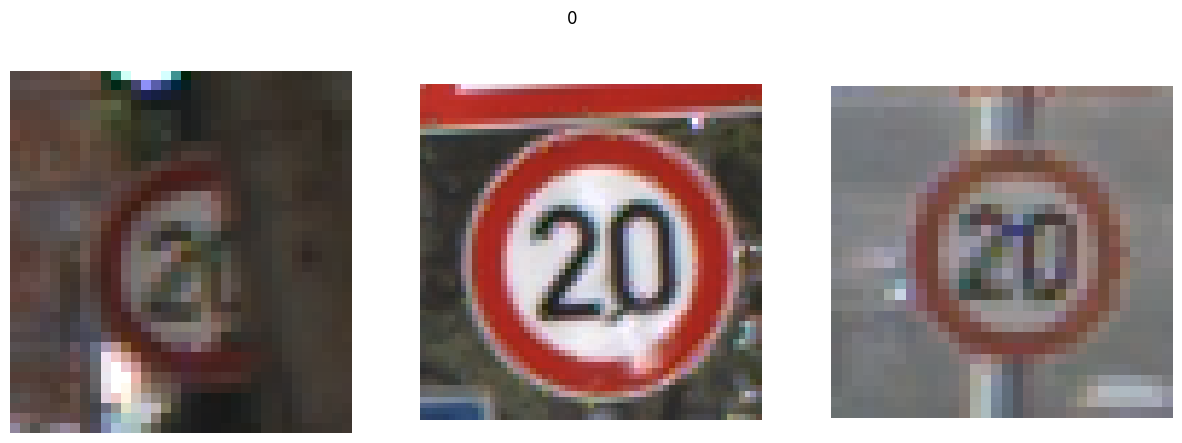

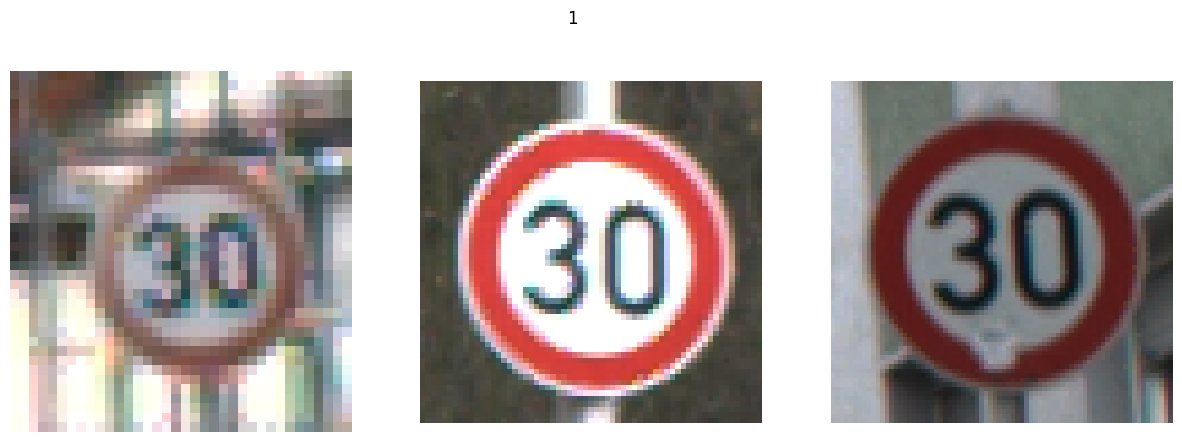

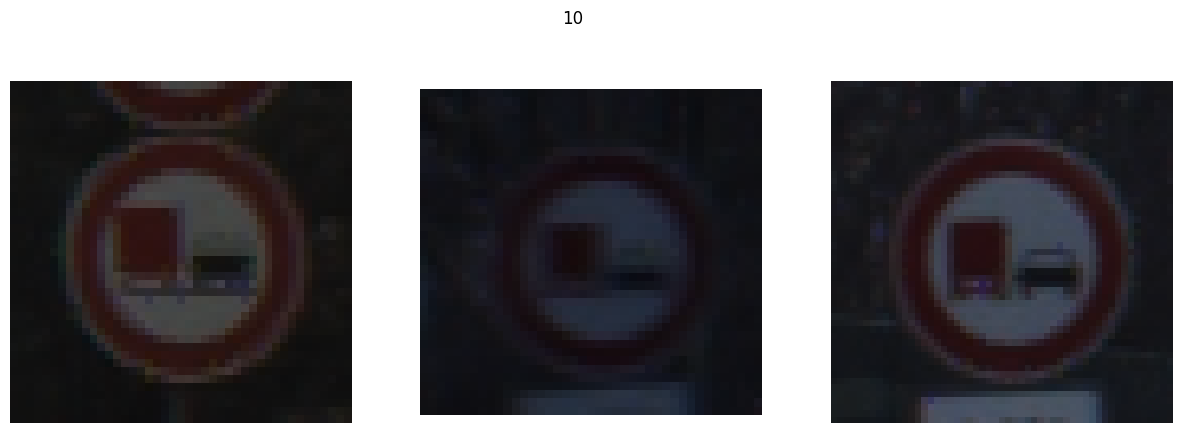

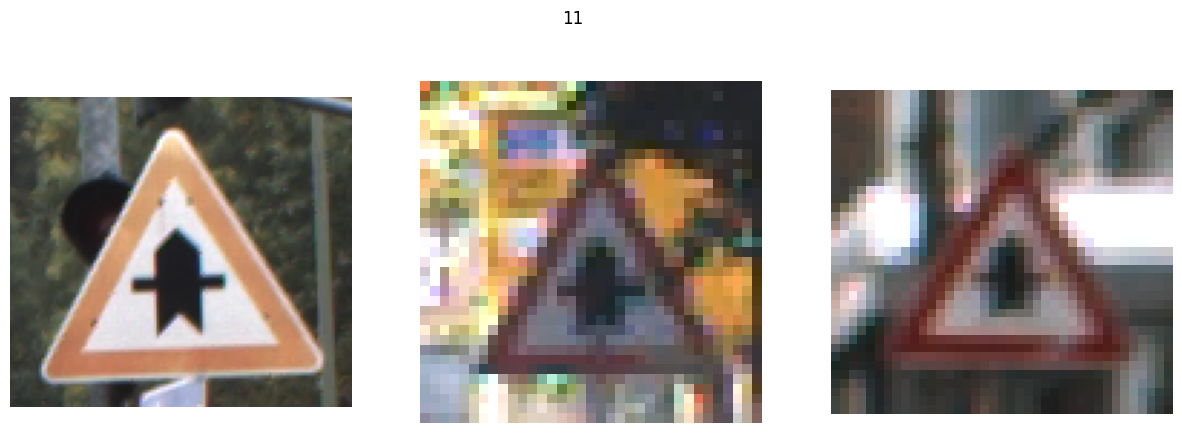

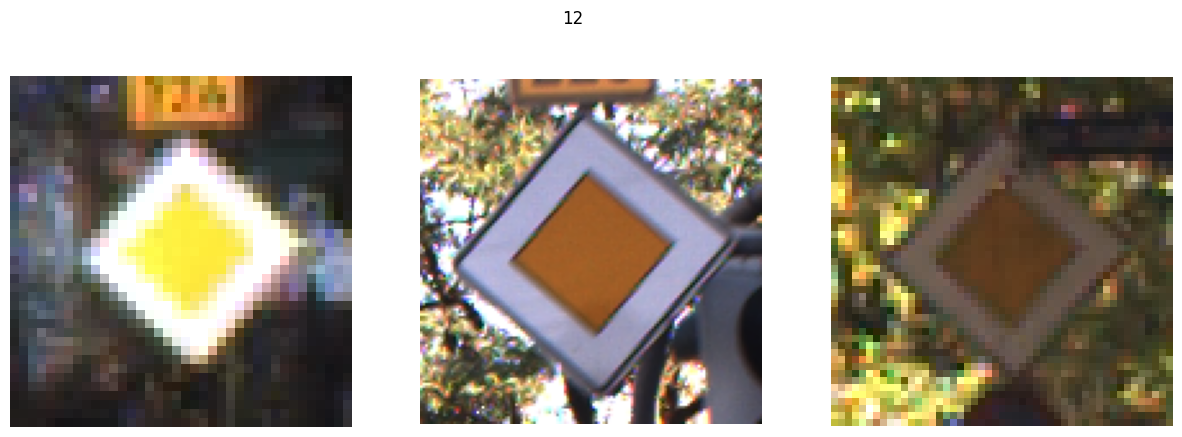

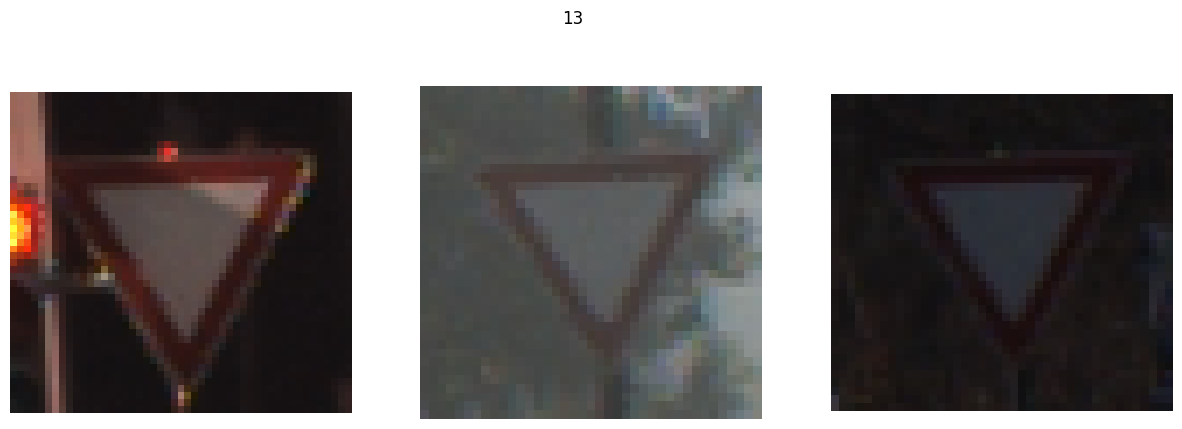

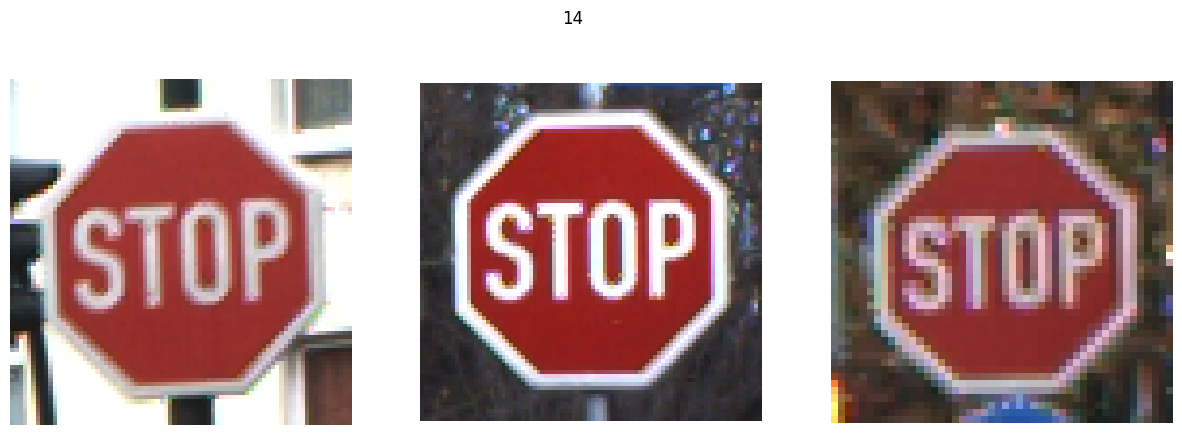

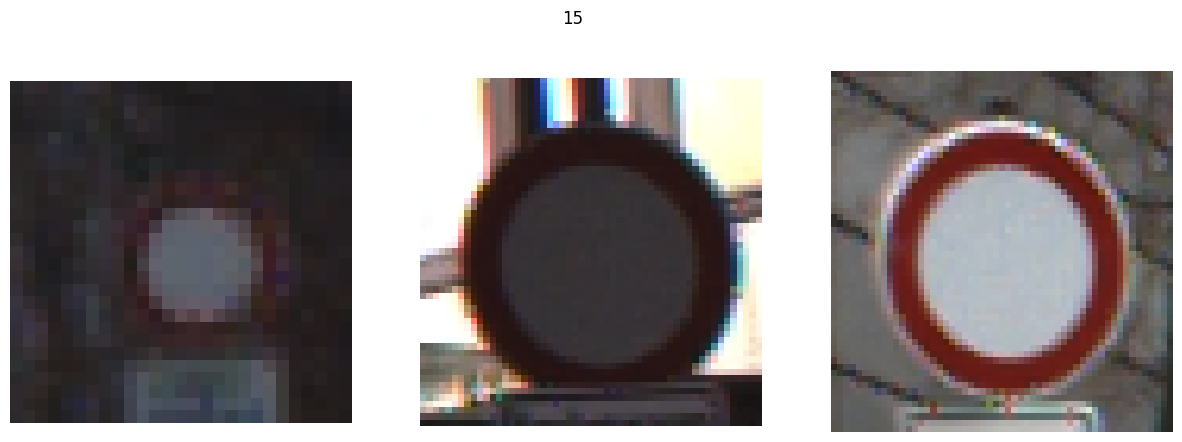

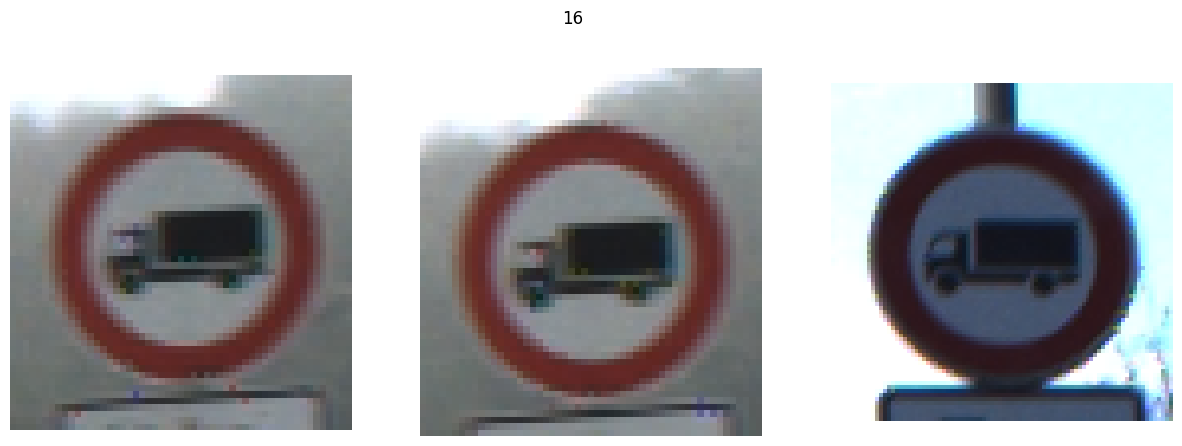

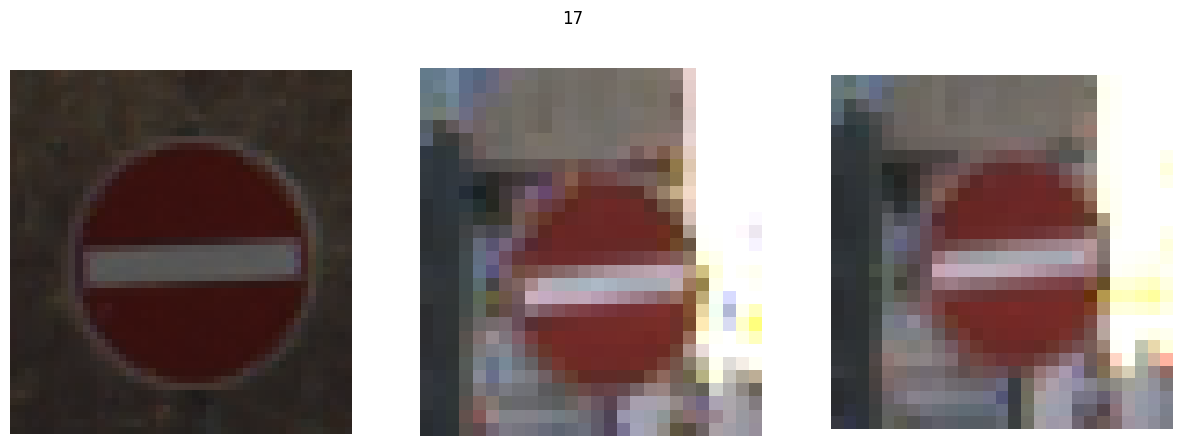

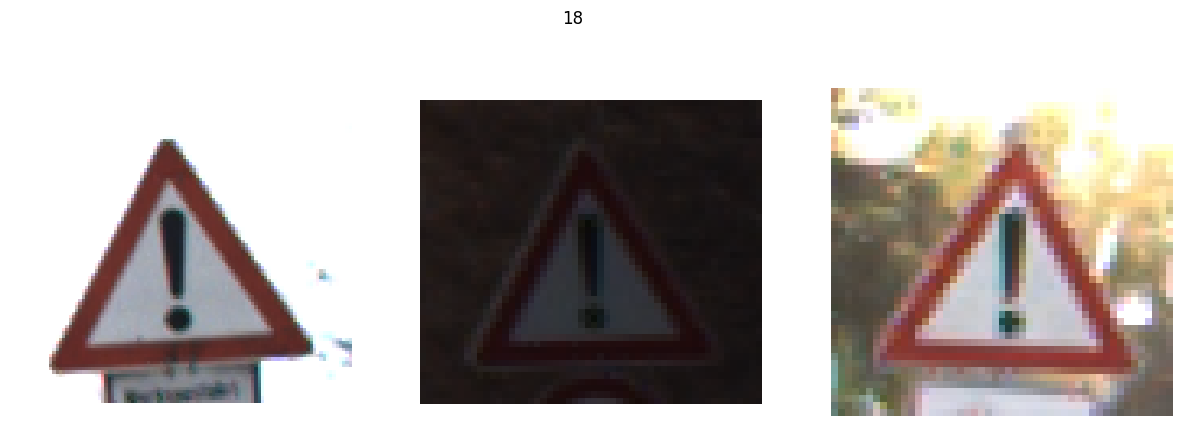

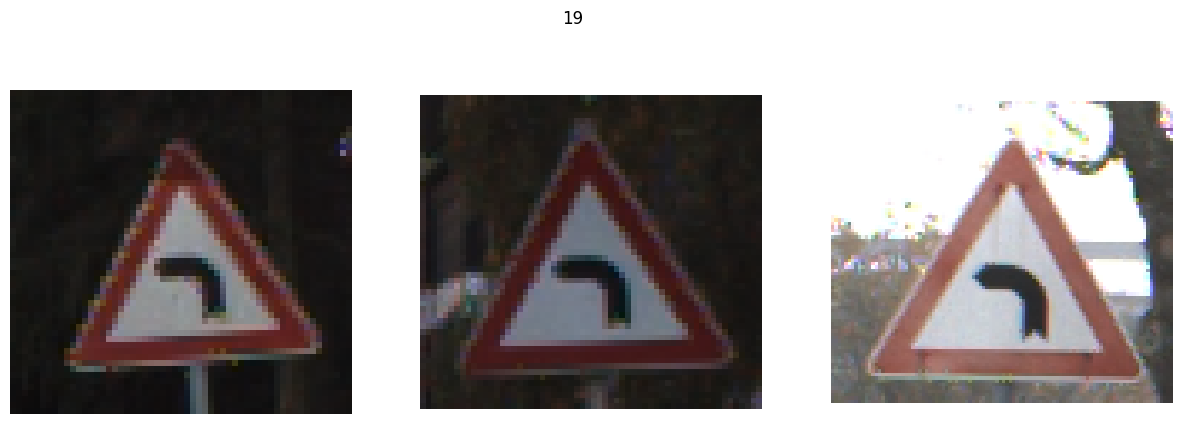

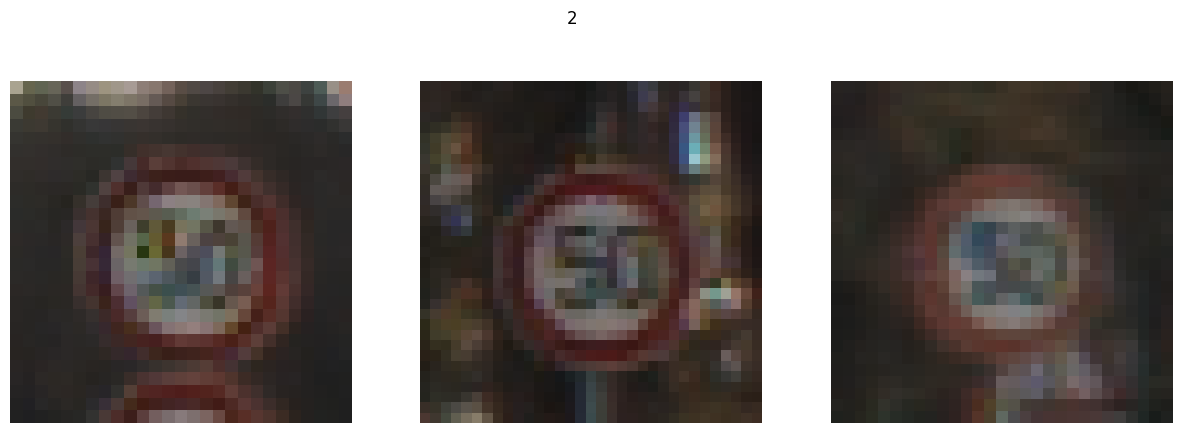

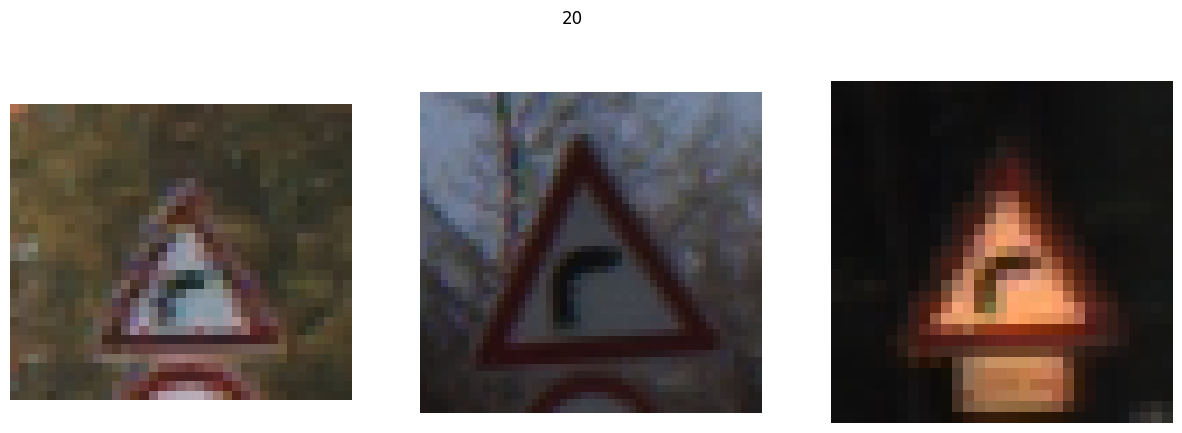

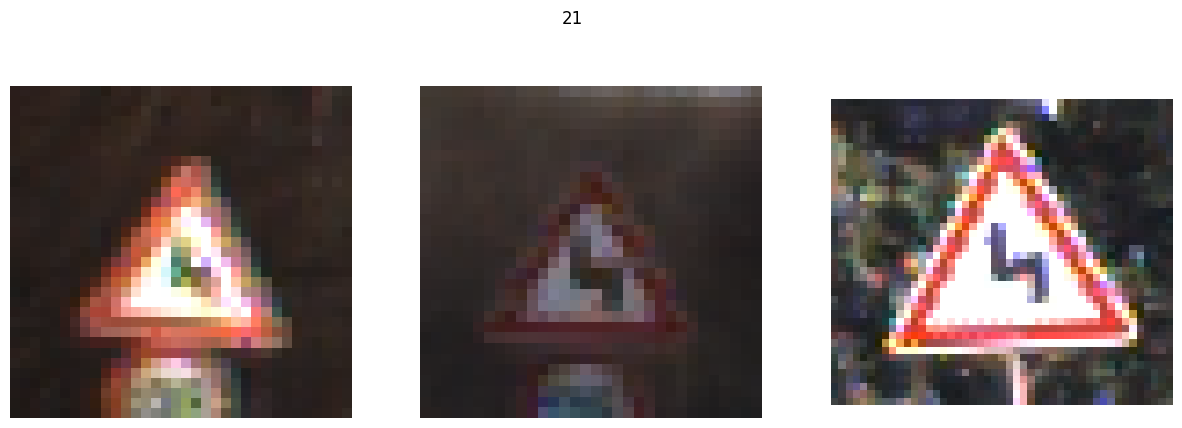

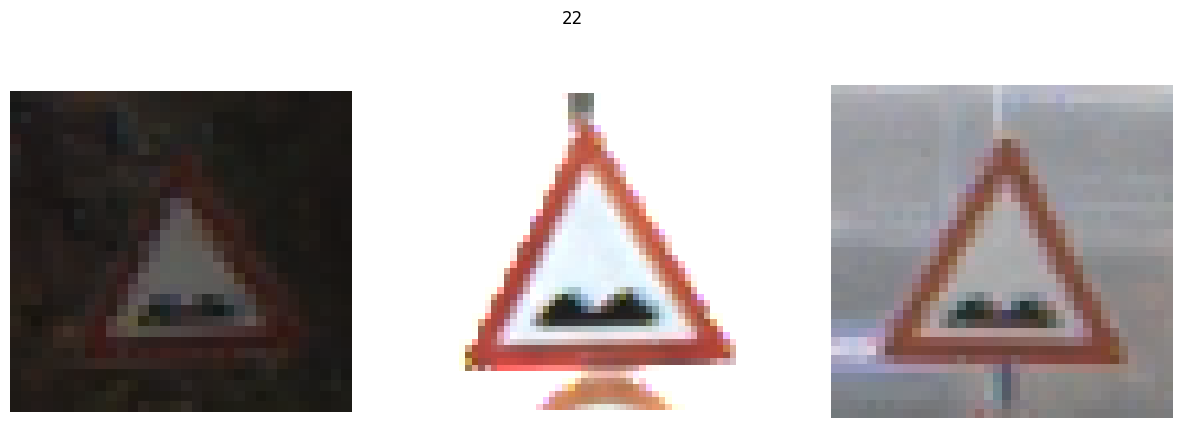

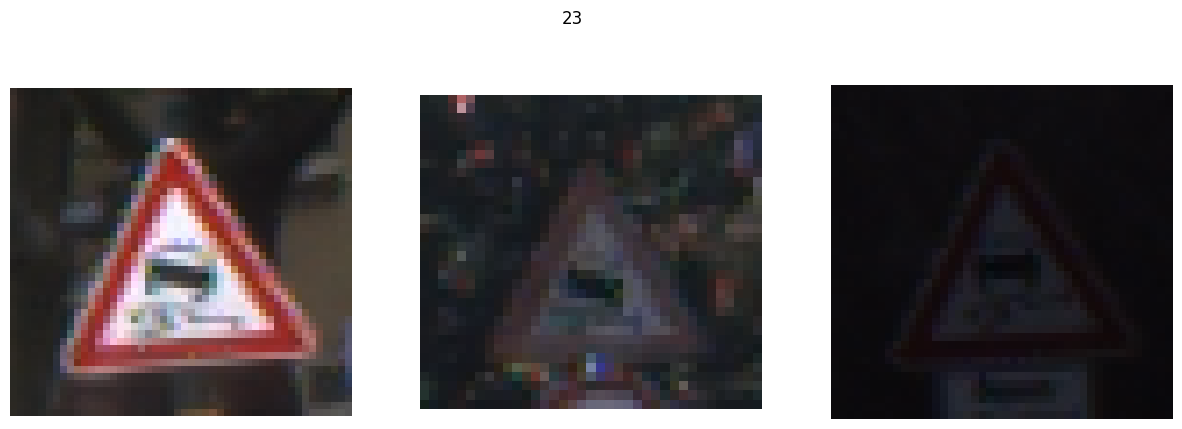

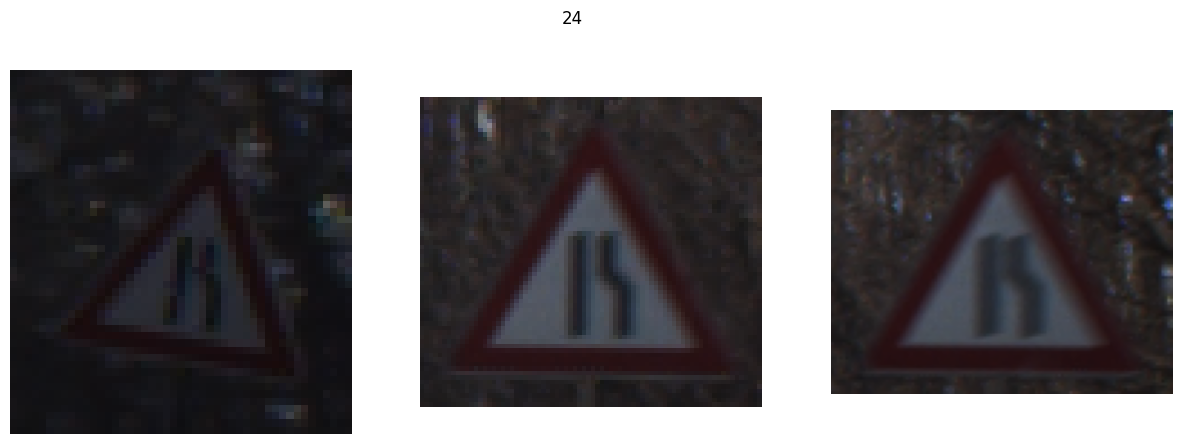

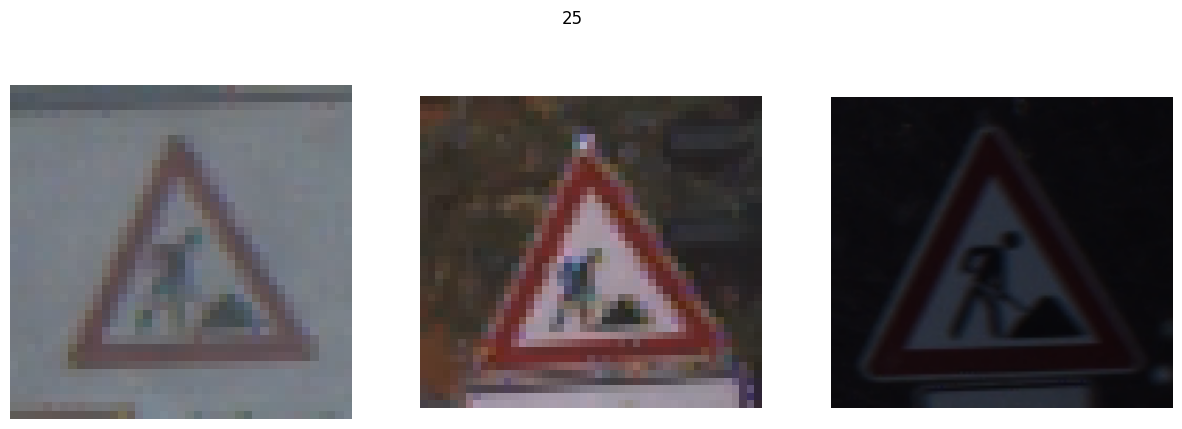

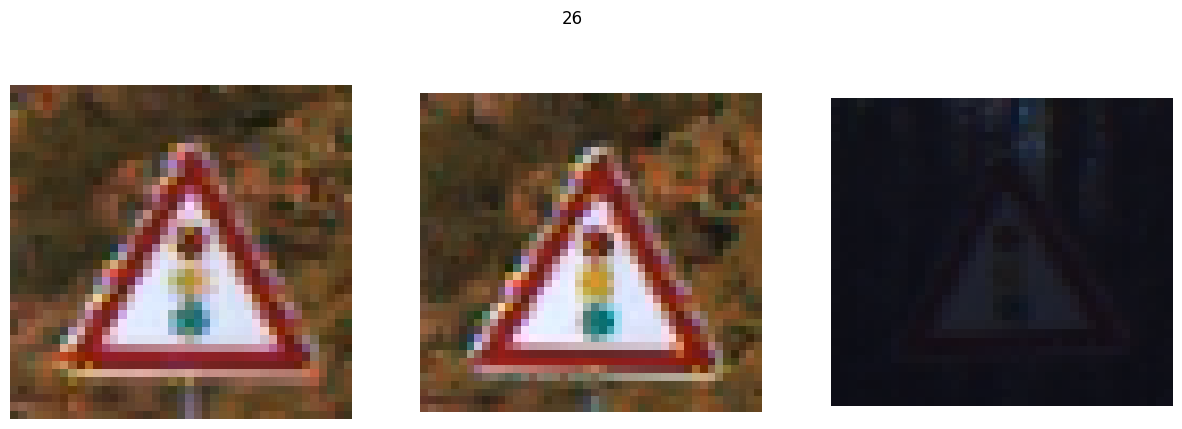

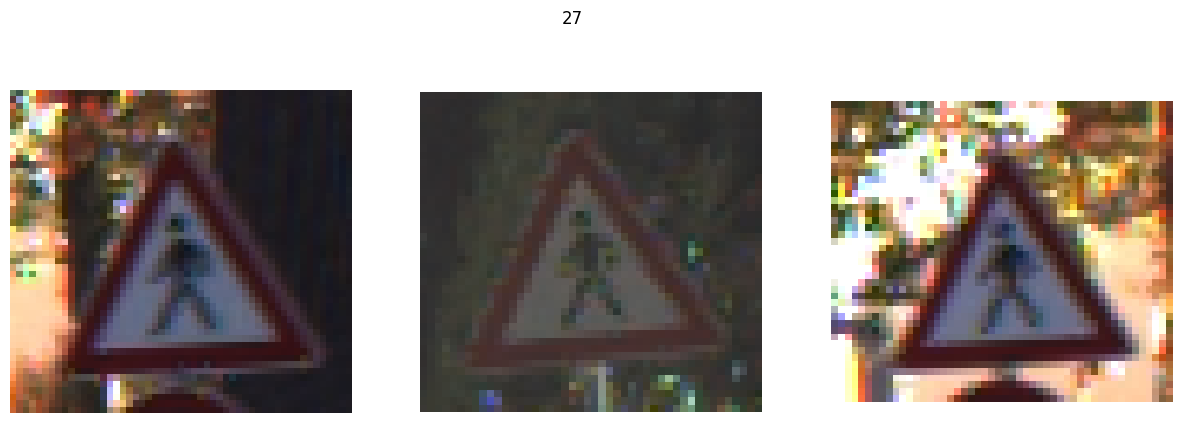

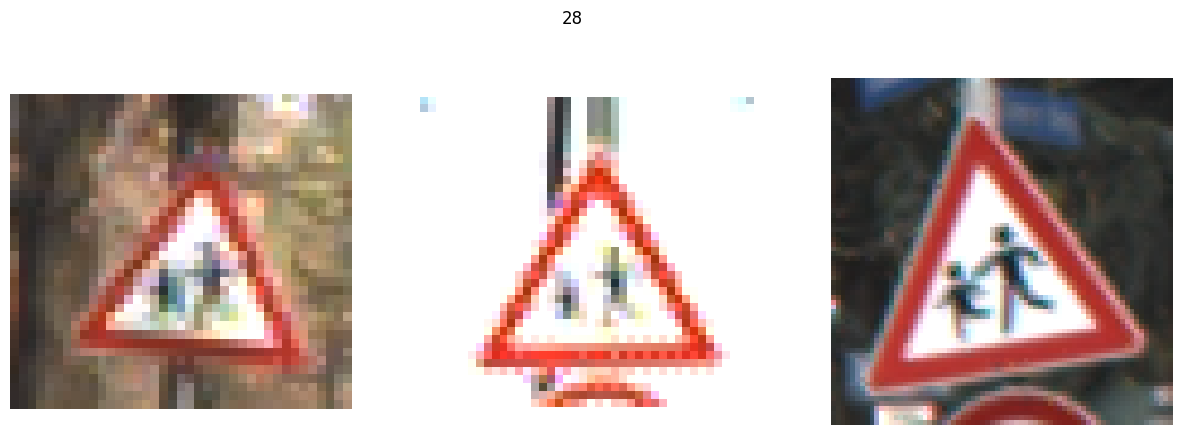

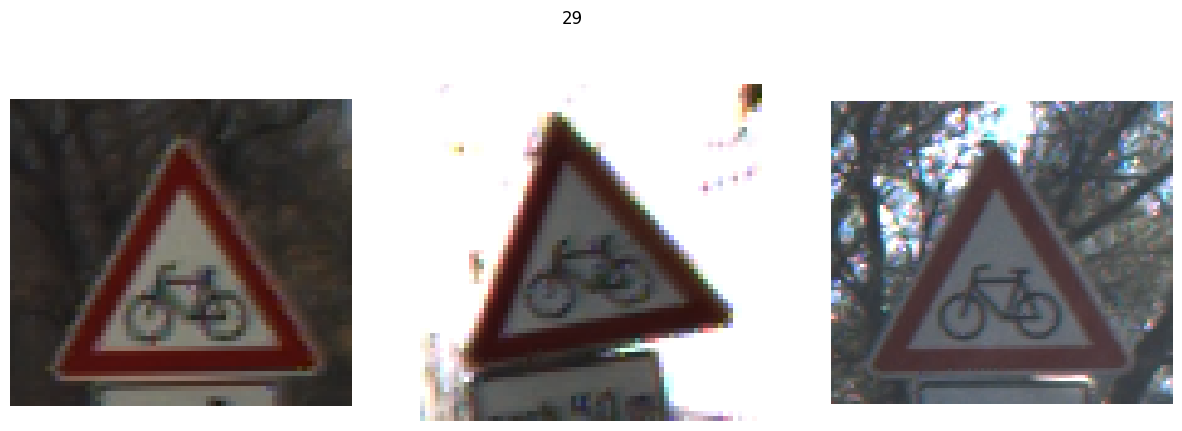

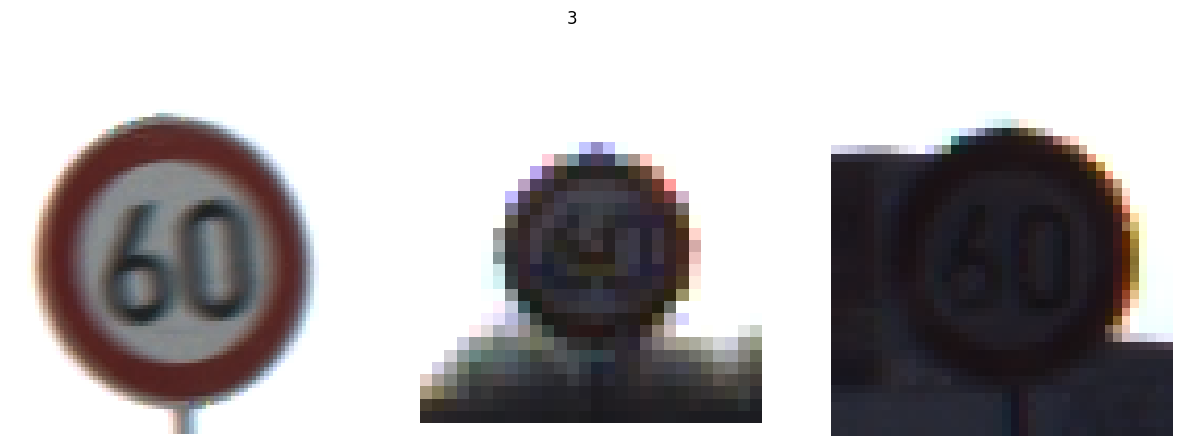

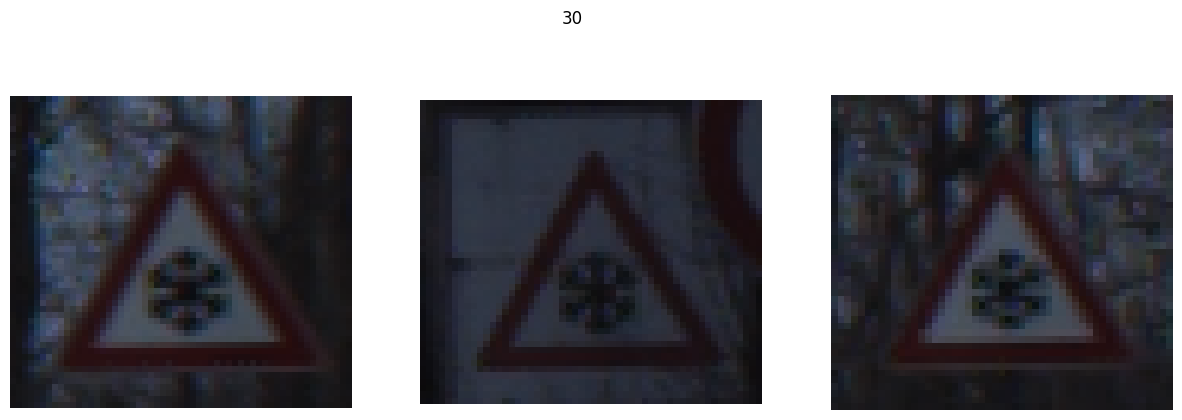

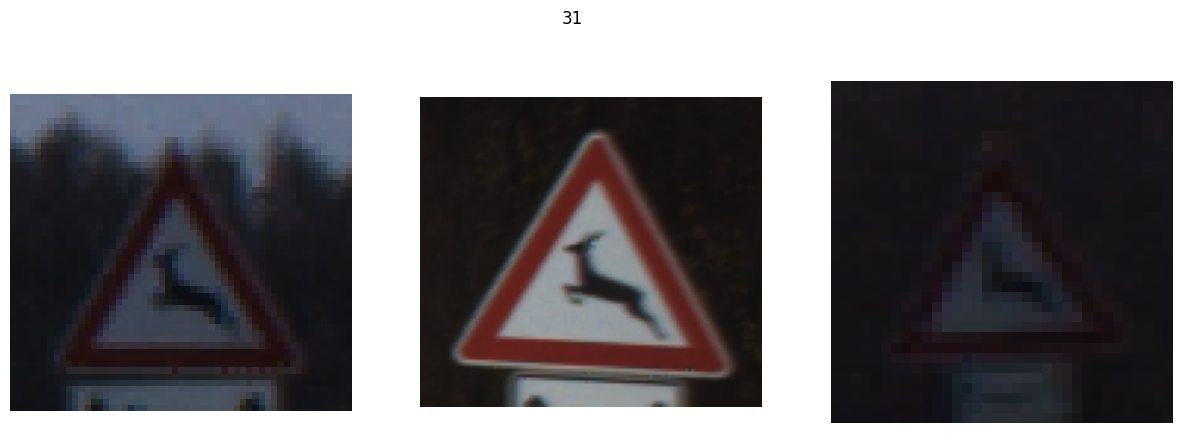

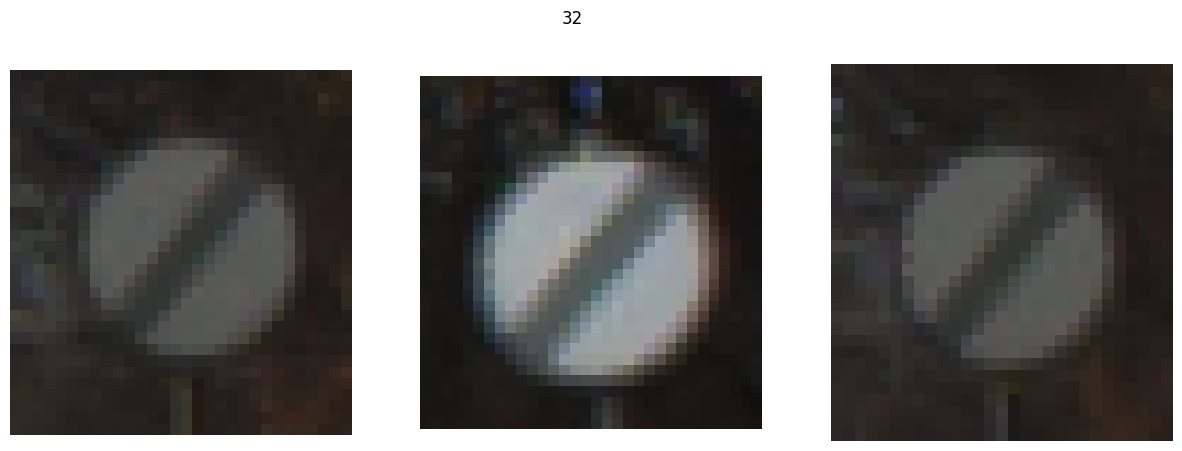

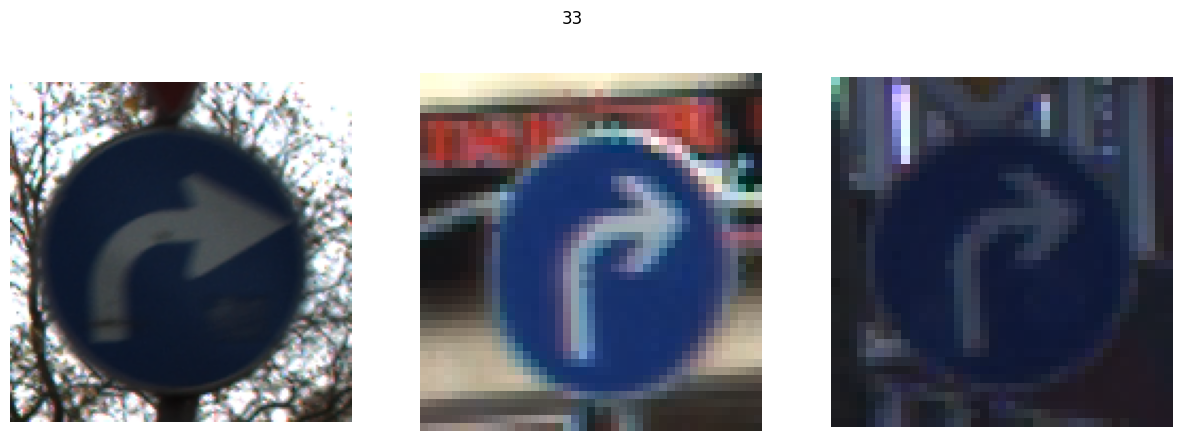

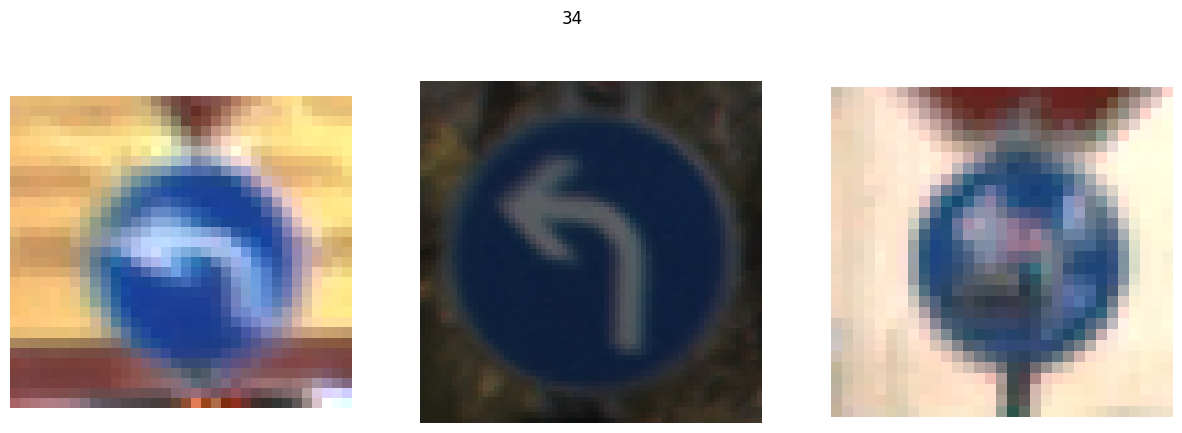

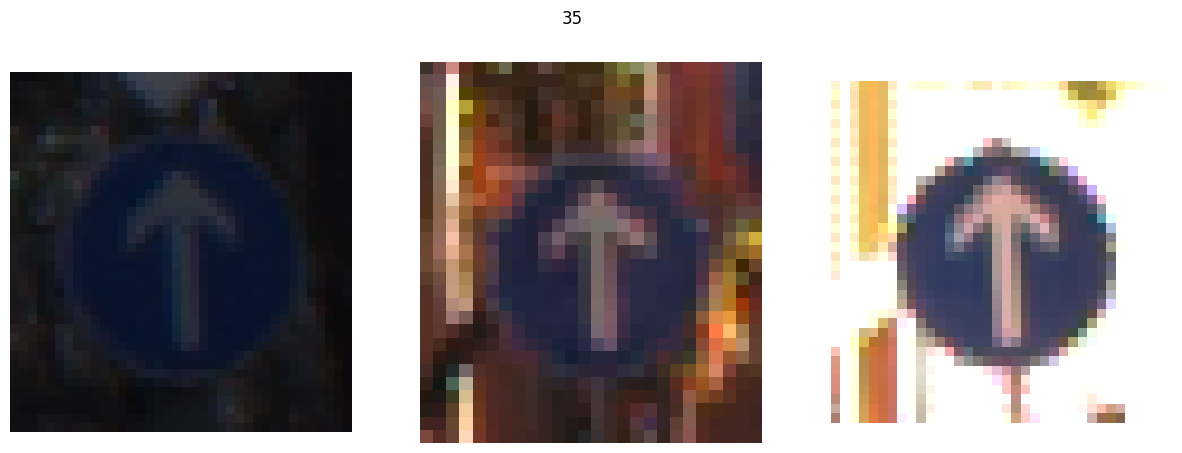

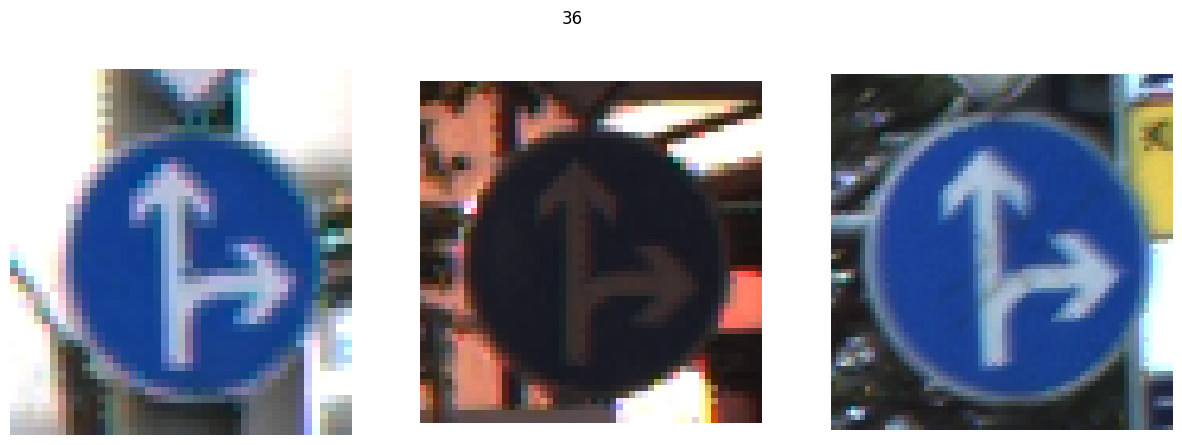

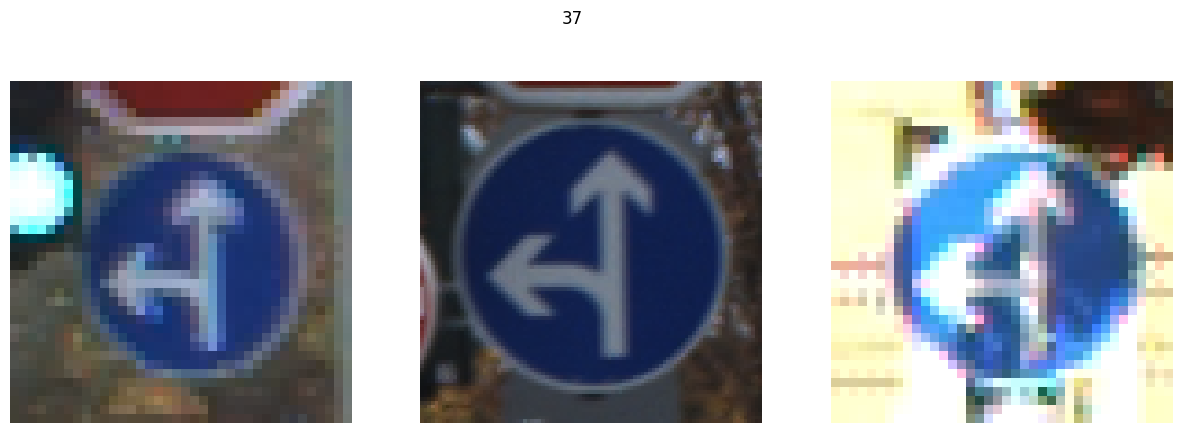

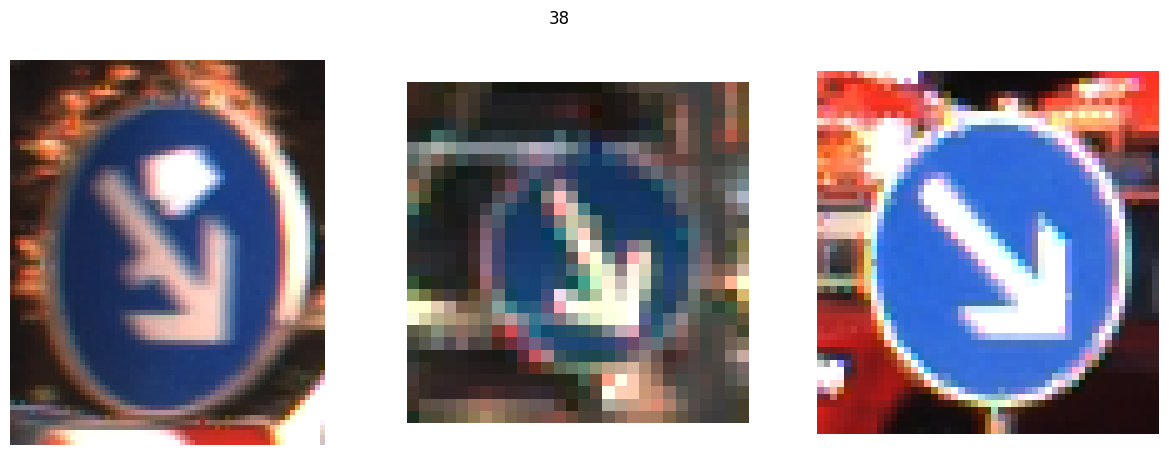

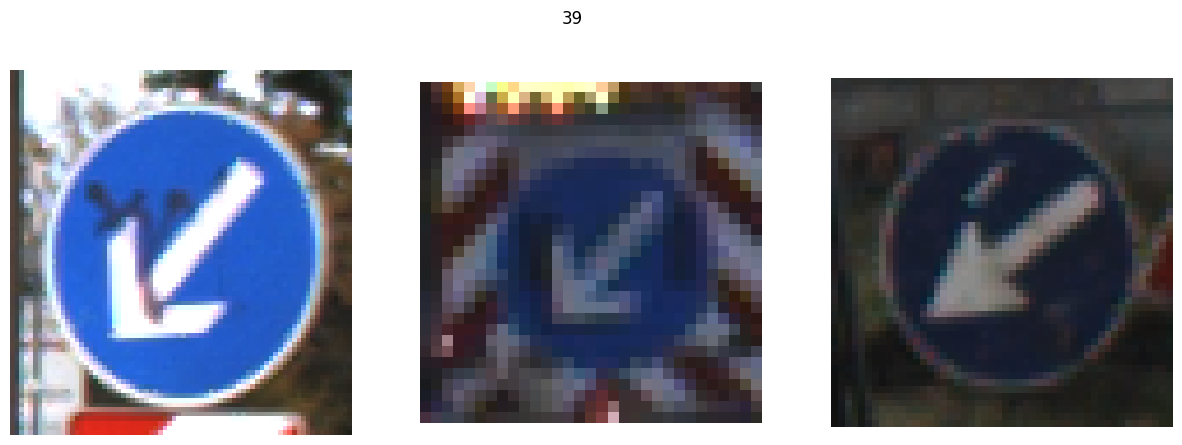

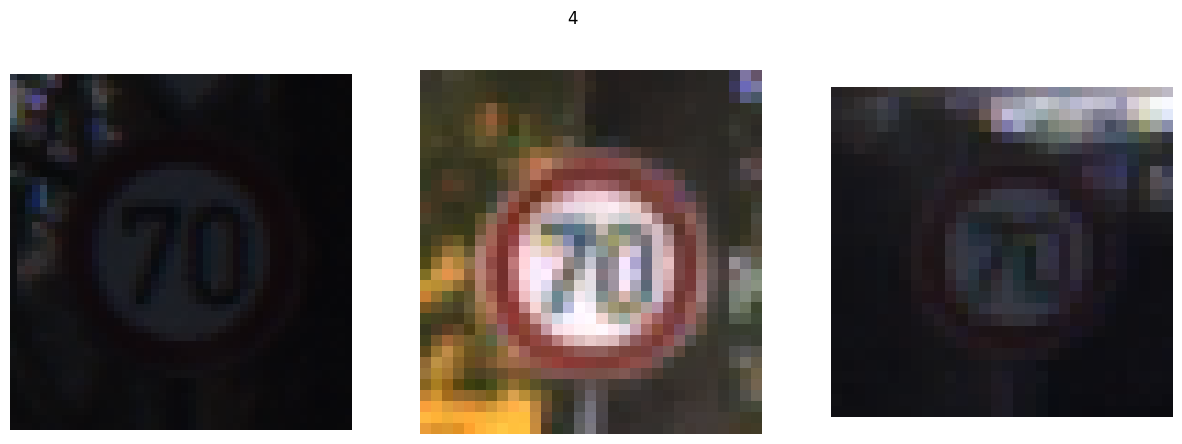

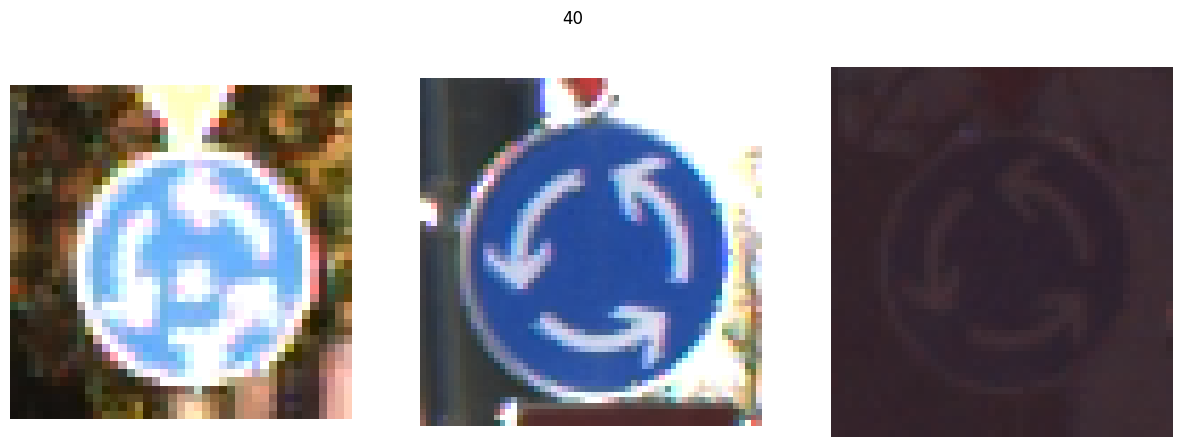

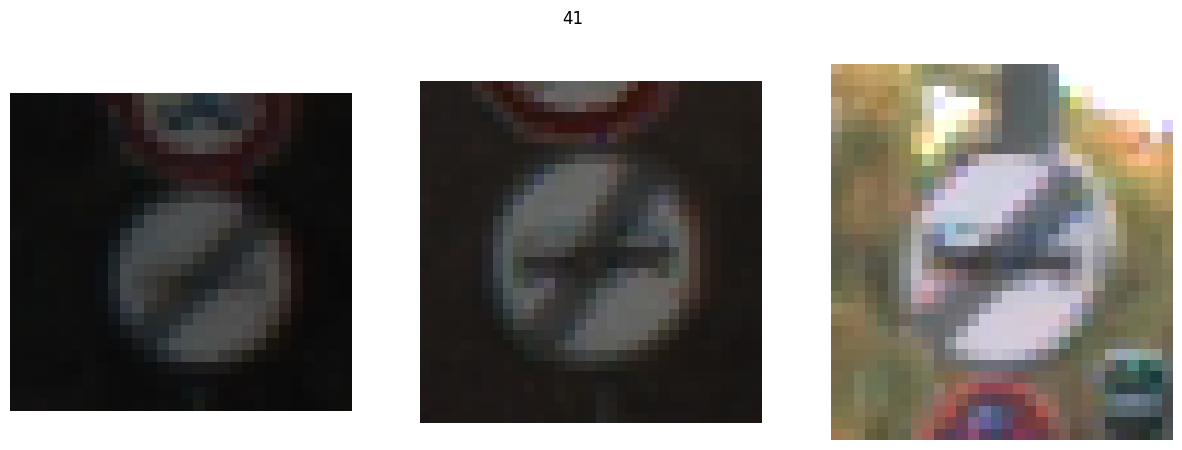

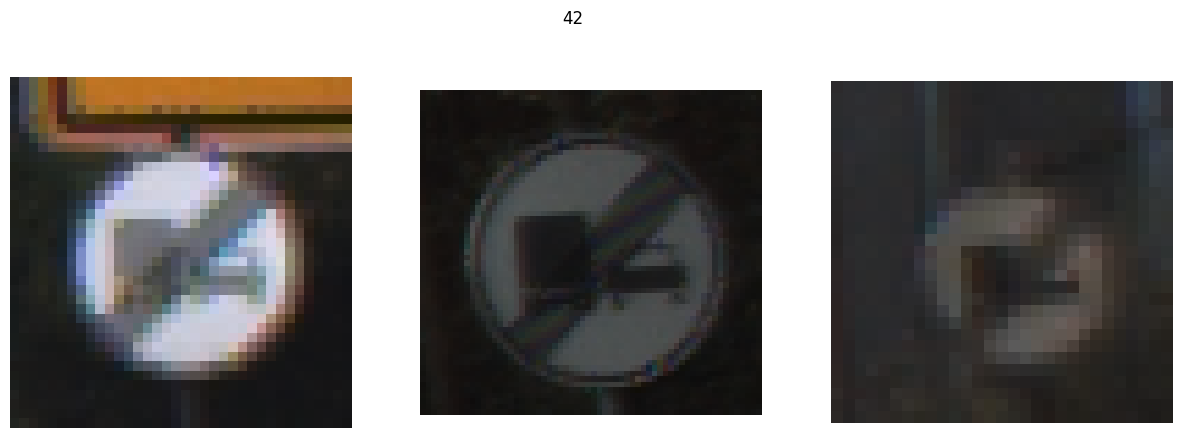

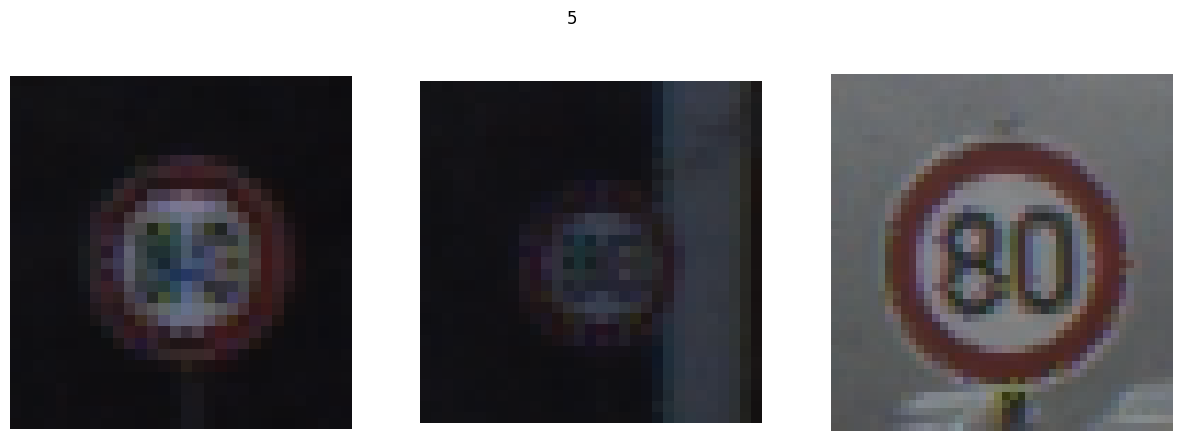

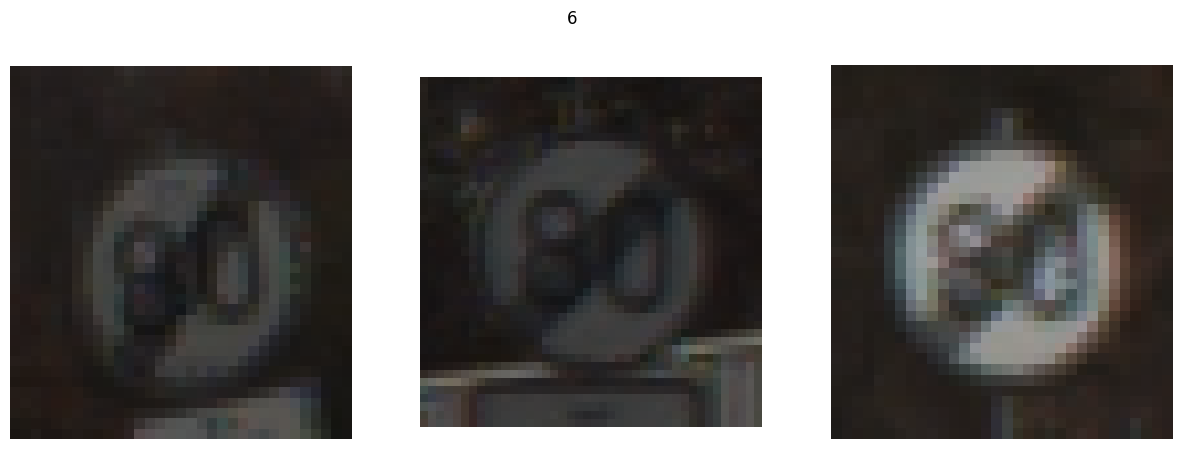

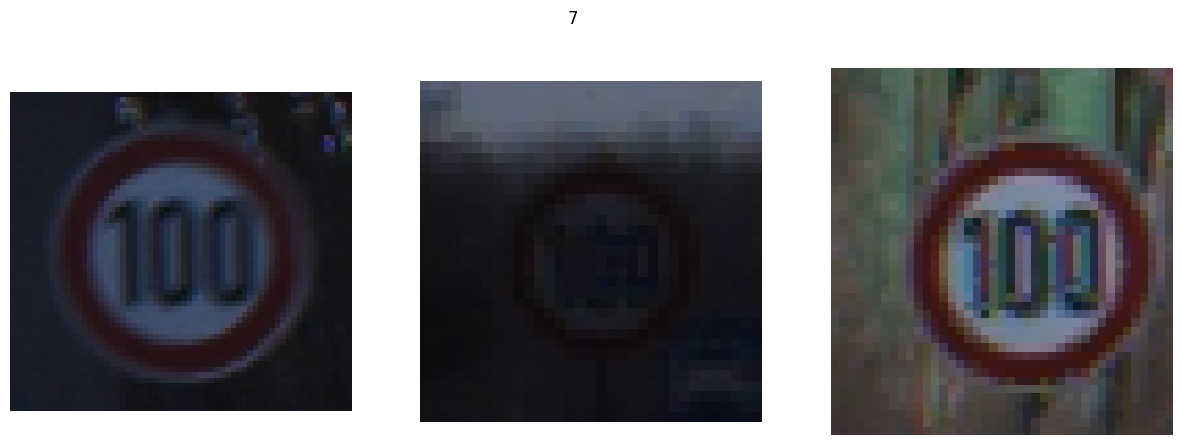

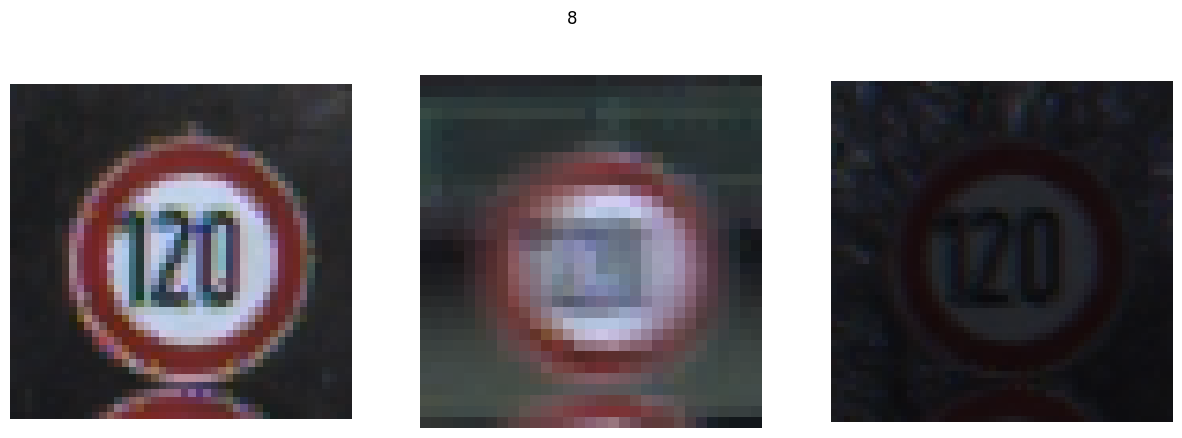

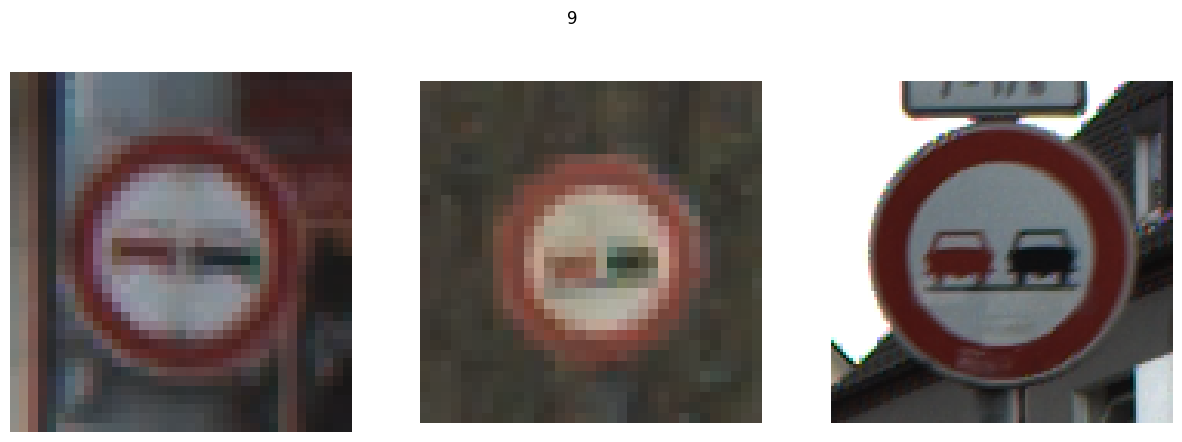

In [9]:
#Visualize Sample Images in Training Data
def plot_sample_images(directory, classes, n_samples=3):
    for cls in classes:
        image_path = os.path.join(directory, cls)
        image_files = rn.sample(os.listdir(image_path), n_samples)
        fig, axes = plt.subplots(1, n_samples, figsize=(15, 5))
        fig.suptitle(cls)
        for ax, image_file in zip(axes, image_files):
            img = Image.open(os.path.join(image_path, image_file))
            ax.imshow(img)
            ax.axis('off')
        plt.show()

plot_sample_images(train_path, train_classes)


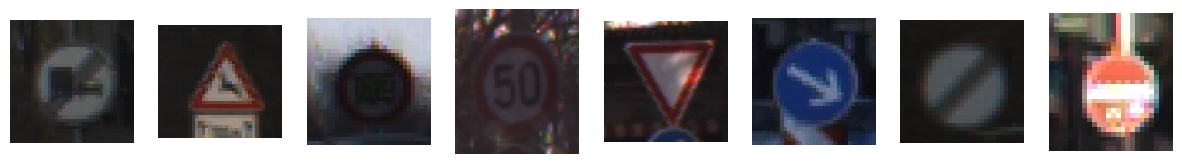

In [10]:
#Sample Images in Test Data
test_samples = rn.sample(test_images, 8) 

fig, axes = plt.subplots(1, len(test_samples), figsize=(15, 5))
for ax, image_file in zip(axes, test_samples):
    img = Image.open(os.path.join(test_path, image_file))
    ax.imshow(img)
    ax.axis('off')
plt.show()


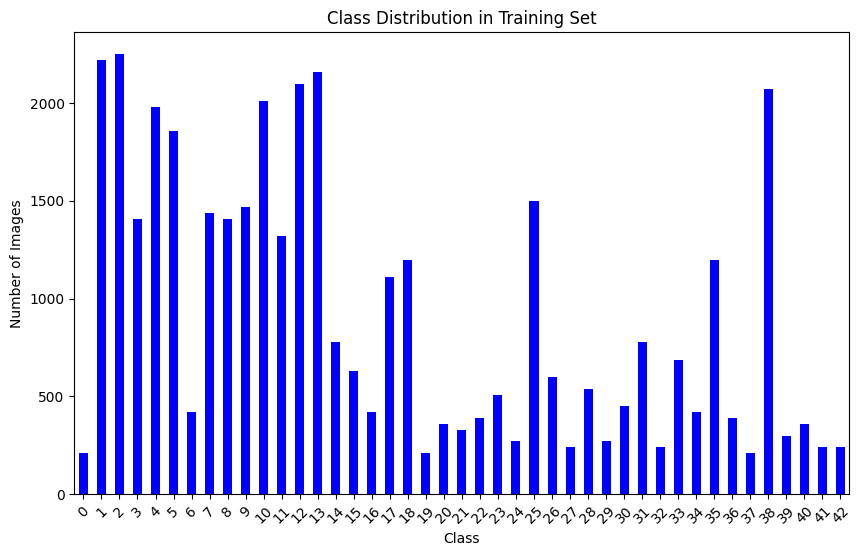

In [11]:
# List all classes in the train set
train_classes = os.listdir(train_path)

# Calculate the number of images in each class
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in train_classes}

# Sort the classes numerically based on their class names
sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: int(item[0])))

# Visualize the class distribution
class_counts_series = pd.Series(sorted_class_counts)
plt.figure(figsize=(10, 6))
class_counts_series.plot(kind='bar', color='blue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


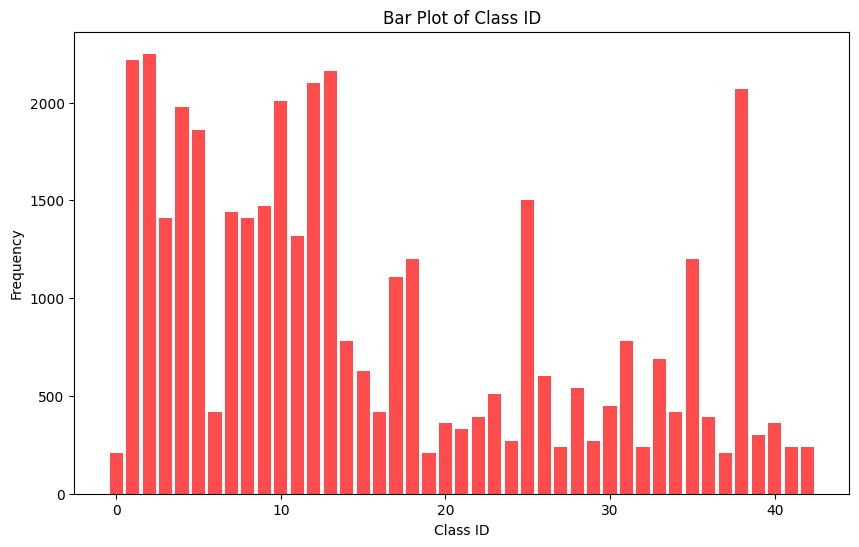

In [6]:
# number of images in each class
plt.figure(figsize=(10, 6))
counts = train['ClassId'].value_counts()
plt.bar(counts.index, counts.values, color='red', alpha=0.7)
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Bar Plot of Class ID')
plt.show()

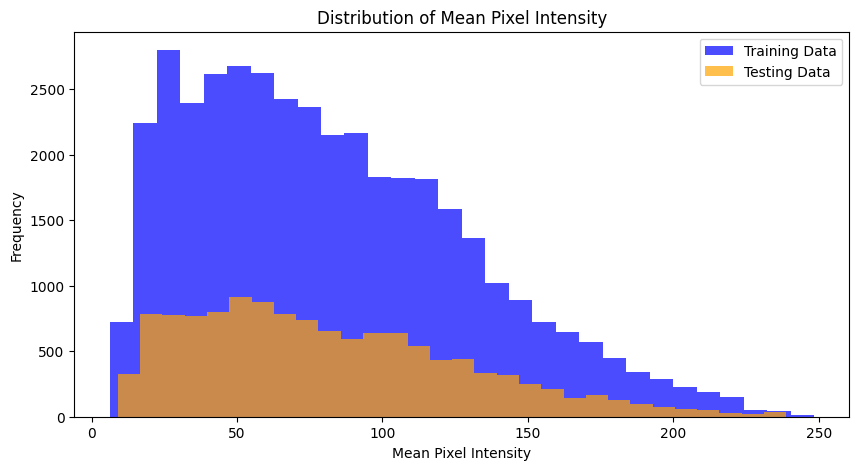

In [12]:
# Calculate mean pixel intensity for each image
train_mean_intensity = []
for cls in train_classes:
    class_path = os.path.join(train_path, cls)
    for img_name in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, img_name)).convert('L')  # Convert to grayscale
        np_img = np.array(img)
        train_mean_intensity.append(np.mean(np_img))

test_mean_intensity = [np.mean(np.array(Image.open(os.path.join(test_path, img_name)).convert('L'))) for img_name in test_images]

# Plot mean pixel intensity
plt.figure(figsize=(10, 5))
plt.hist(train_mean_intensity, bins=30, alpha=0.7, color='blue', label='Training Data')
plt.hist(test_mean_intensity, bins=30, alpha=0.7, color='orange', label='Testing Data')
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Pixel Intensity')
plt.legend()
plt.show()


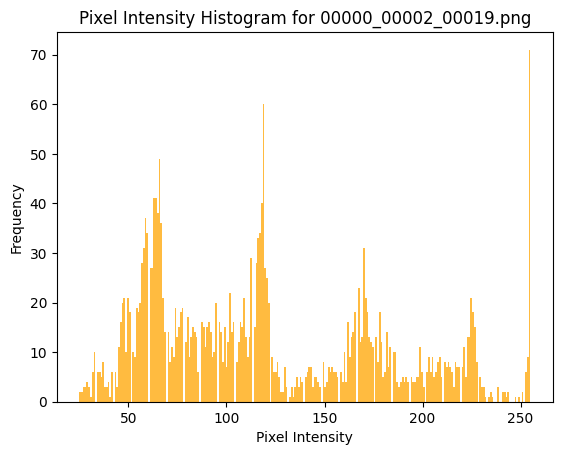

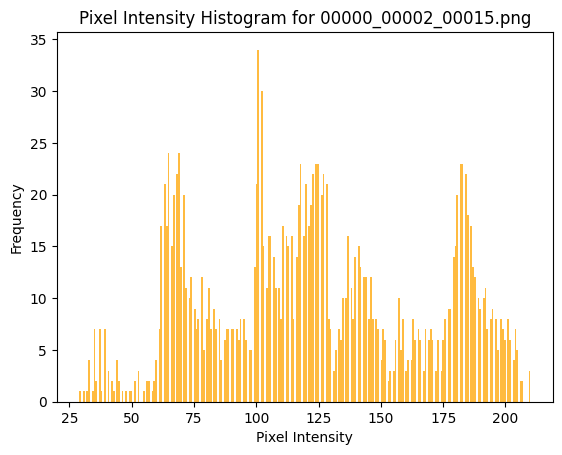

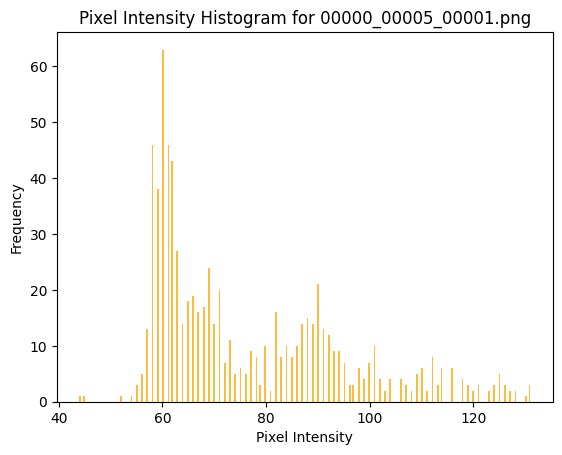

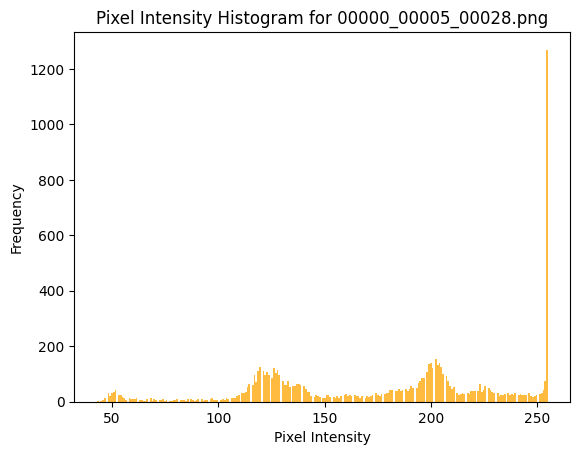

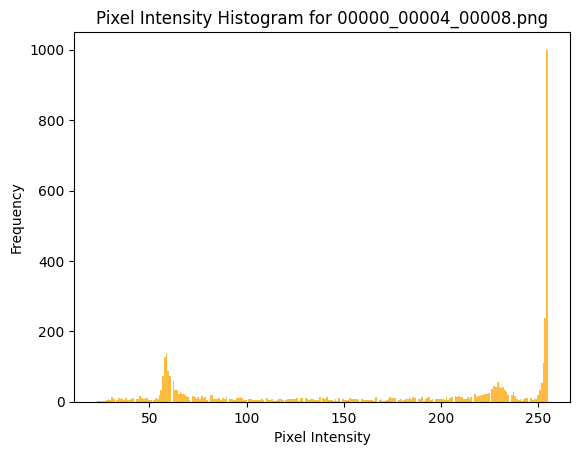

In [13]:
#Display pixel intensity histogram for a few images in a class
sample_class = train_classes[0]
sample_images = rn.sample(os.listdir(os.path.join(train_path, sample_class)), 5)

for image_name in sample_images:
    img_path = os.path.join(train_path, sample_class, image_name)
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)
    
    plt.figure()
    plt.hist(img_array.ravel(), bins=256, color='orange', alpha=0.75)
    plt.title(f'Pixel Intensity Histogram for {image_name}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()


## Label Overview

In [7]:
# define a dictionary classes that maps class IDs to their corresponding traffic sign labels
classes_labels = { 
            0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

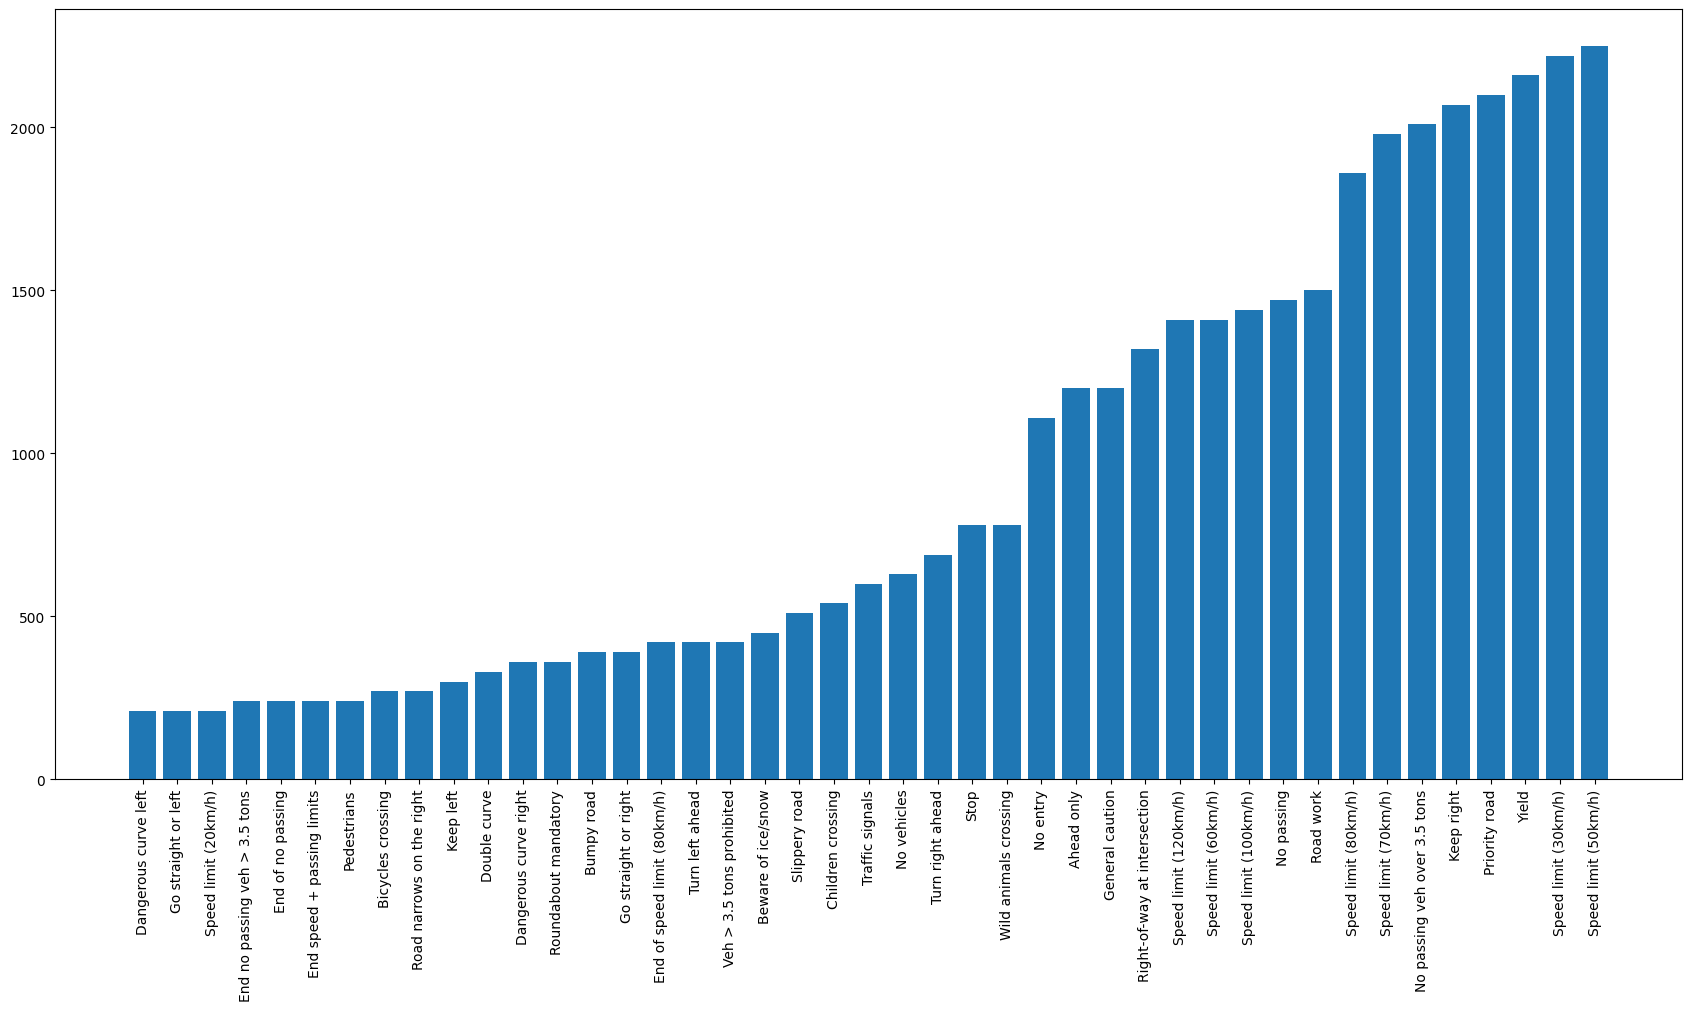

In [20]:
# visualize train dataset 
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes_labels[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

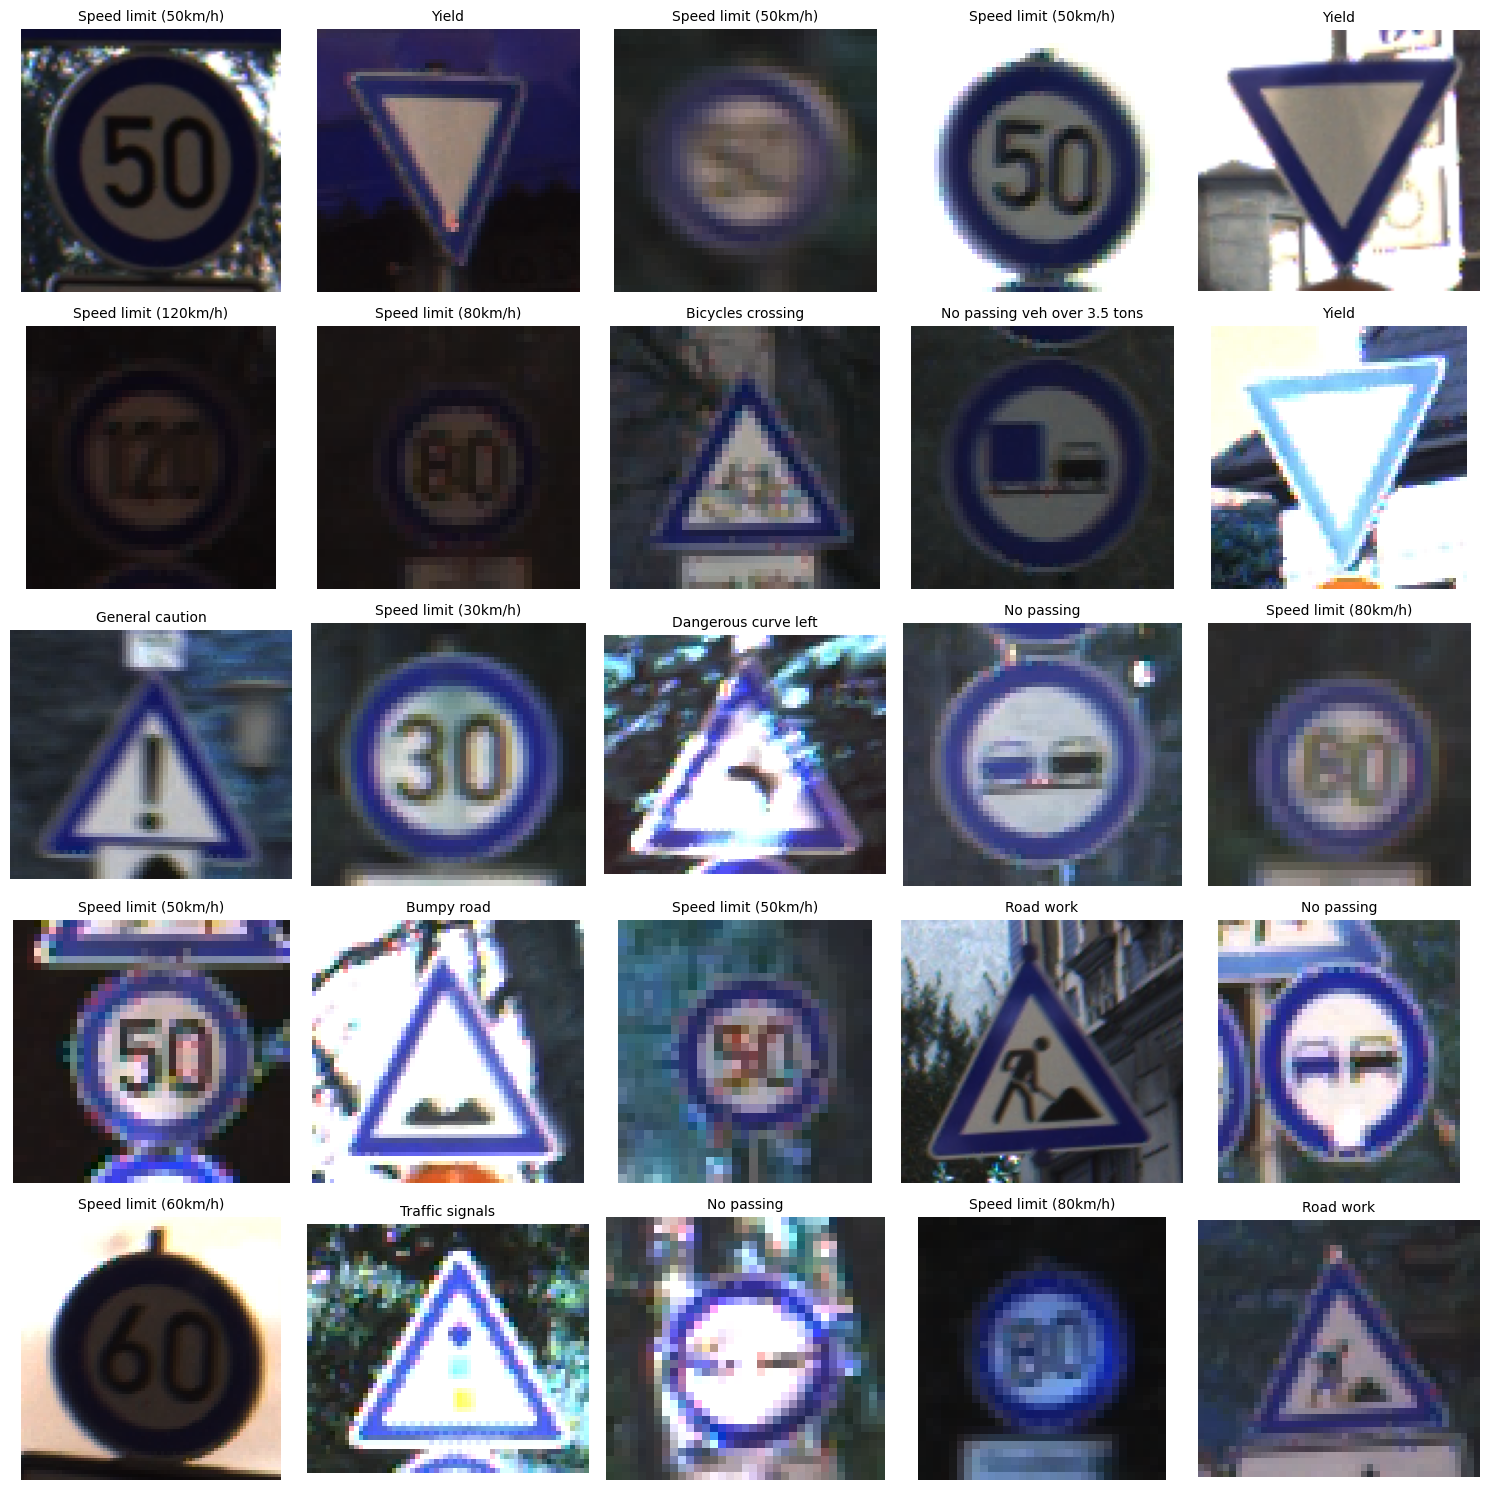

In [21]:
# visualize 25 random image from train data

# get the list of all folders in the train directory (each folder represents a class)
folders = os.listdir(train_path)

# collect all image paths and their class IDs
image_paths = []
image_labels = []
for folder in folders:
    if folder.isdigit():  # Ensure folder is a class ID (numeric)
        folder_path = os.path.join(train_path, folder)
        images = os.listdir(folder_path)
        for img in images:
            image_paths.append(os.path.join(folder_path, img))
            image_labels.append(int(folder))  # Store the class ID

# randomly select 25 image paths and their corresponding labels
random_indices = random.sample(range(len(image_paths)), 25)
random_images = [image_paths[i] for i in random_indices]
random_labels = [image_labels[i] for i in random_indices]

# plot 25 random images with labels
plt.figure(figsize=(15, 15))

for i in range(1, 26):
    img_path = random_images[i - 1]
    img_label = random_labels[i - 1]
    img = cv2.imread(img_path)
    
    # Get class label from dictionary
    class_name = classes_labels.get(img_label, 'Unknown')
    
    plt.subplot(5, 5, i)
    plt.imshow(img)
    plt.title(class_name, fontsize=10)  # Display class name as the title
    plt.axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()

# Data Preprocessing

## Check Missing Value

In [6]:
# check train data
train.isnull().any().describe()

count         8
unique        1
top       False
freq          8
dtype: object

In [7]:
# check test data
test.isnull().any().describe()

count         8
unique        1
top       False
freq          8
dtype: object

## Check Duplicate Value

In [8]:
# check duplicates value
print('Duplicate data in Train Set: ',train.duplicated().sum())
print('Duplicate data in Test Set: ',test.duplicated().sum())

Duplicate data in Train Set:  0
Duplicate data in Test Set:  0


## Reshape

In [8]:
# resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 1 # grayscale

# collect training data
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + '/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convert to grayscale
            image_fromarray = Image.fromarray(image_gray)
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array and reshaping for grayscale
image_data = np.array(image_data).reshape(-1, IMG_HEIGHT, IMG_WIDTH, channels)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 1) (39209,)


## Shuffle Training Data

In [9]:
# shuffle training data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## Split Training and Validation Set

In [10]:
# split data into train and validation set
random_seed = 42
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=random_seed, shuffle=True)

In [11]:
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 1)
X_valid.shape (11763, 30, 30, 1)
y_train.shape (27446,)
y_valid.shape (11763,)


## Normalization

In [12]:
X_train = X_train/255 
X_val = X_val/255

X_train
X_val

array([[[[0.08235294],
         [0.08627451],
         [0.10196078],
         ...,
         [0.17254902],
         [0.17647059],
         [0.18431373]],

        [[0.08627451],
         [0.09019608],
         [0.09803922],
         ...,
         [0.15686275],
         [0.18431373],
         [0.19607843]],

        [[0.09411765],
         [0.09803922],
         [0.09411765],
         ...,
         [0.18823529],
         [0.21176471],
         [0.2       ]],

        ...,

        [[0.12941176],
         [0.13333333],
         [0.11372549],
         ...,
         [0.0745098 ],
         [0.0745098 ],
         [0.07843137]],

        [[0.14509804],
         [0.14901961],
         [0.12941176],
         ...,
         [0.06666667],
         [0.07058824],
         [0.0745098 ]],

        [[0.14901961],
         [0.14117647],
         [0.11764706],
         ...,
         [0.06666667],
         [0.06666667],
         [0.07843137]]],


       [[[0.04313725],
         [0.04705882],
         [0.04

## Label Encoding

In [13]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, num_classes=NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, num_classes=NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


## Data Augmentation

In [14]:
batch_size = 32
epochs = 150

In [15]:
# creating an ImageDataGenerator object for training data with data augmentation
datagen = ImageDataGenerator(
rotation_range=20,
zoom_range=0.20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
horizontal_flip=False,
vertical_flip=False,
fill_mode="nearest")

## Preprocess Test Data

In [16]:
# Loading the test data and preprocess

test = pd.read_csv(test_path+'.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image_fromarray = Image.fromarray(image_gray)
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data).reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)  # Reshape for grayscale
X_test = X_test/255

## RandomSeed

In [17]:
import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# CNN Model

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Defining early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',   # Monitor the validation loss
    patience=5,           # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Defining the CNN model
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT,IMG_WIDTH,channels)))
model.add(MaxPool2D((2, 2)))

# 2nd convolutional layer
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D((2, 2)))

# 3rd convolutional layer
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D((2, 2)))

# flattening the layer
model.add(Flatten())

# fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# output layer
model.add(Dense(NUM_CATEGORIES, activation = 'softmax'))

# model summary
model.summary()

# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,803 (960.17 KB)

 Trainable params: 245,803 (960.17 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),  
                    epochs=epochs, 
                    validation_data=(X_val, y_val),callbacks=[early_stopping])

# save model
model.save('cnn_model.h5')

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.0635 - loss: 3.5305 - val_accuracy: 0.1806 - val_loss: 2.9855
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.2113 - loss: 2.8385 - val_accuracy: 0.5096 - val_loss: 1.5151
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.4002 - loss: 1.9532 - val_accuracy: 0.6336 - val_loss: 1.0432
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.4963 - loss: 1.5769 - val_accuracy: 0.7218 - val_loss: 0.8371
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.5784 - loss: 1.3030 - val_accuracy: 0.7921 - val_loss: 0.6273
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.6416 - loss: 1.0934 - val_accuracy: 0.8416 - val_loss: 0.4764
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.6964 - loss: 0.9567 - val_accuracy: 0.8643 - val_loss: 0.4053
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.7375 - loss: 0

# CNN Model Evaluation

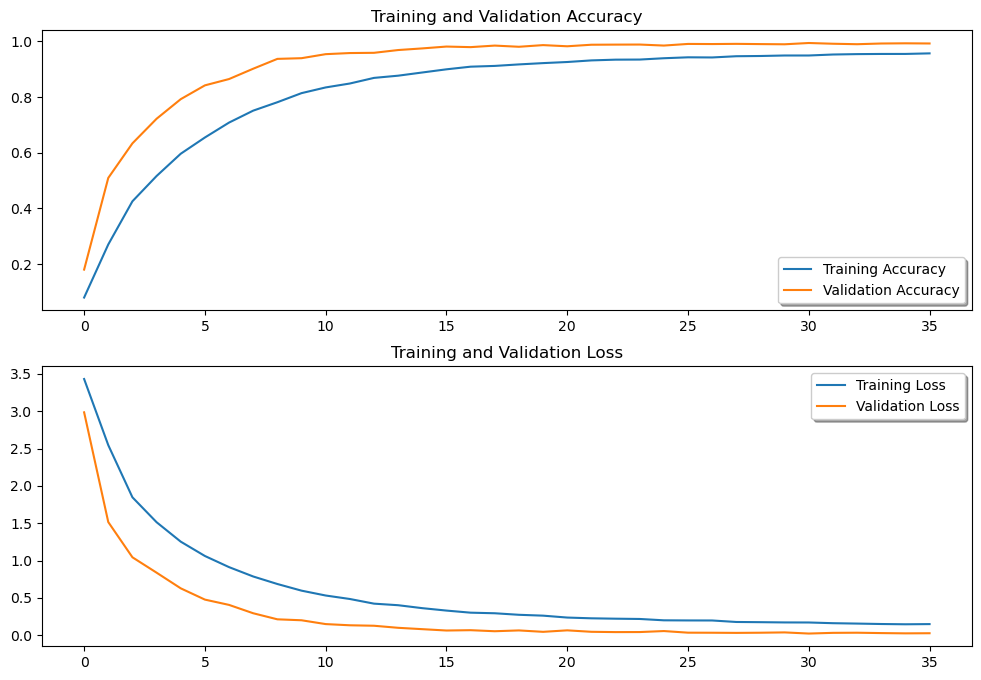

In [55]:
# plot loss and accuracy curves 
fig, ax = plt.subplots(2,1,figsize=(12,8))

ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend(loc='best',shadow=True)

ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend(loc='best',shadow=True)

plt.show()

# Accuracy Report

In [275]:
model = load_model('cnn_model.h5')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)  # Convert the predictions to class labels

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'CNN Training Loss = {train_loss:.4f}')
print(f'CNN Training Accuracy = {train_accuracy * 100:.2f}%\n')

test_loss, test_accuracy = model.evaluate(X_test, to_categorical(labels, num_classes=NUM_CATEGORIES), verbose=0)
print(f'CNN Test Loss = {test_loss:.4f}')
print(f'CNN Test Accuracy = {test_accuracy * 100:.2f}%')

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
CNN Training Loss = 0.0225
CNN Training Accuracy = 99.28%

CNN Test Loss = 0.2579
CNN Test Accuracy = 95.53%


# Classification Report

In [233]:
from sklearn.metrics import classification_report
# Use the model to predict the labels of the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)  # Convert the predictions to class labels
labels = labels.astype(int)

# Generate the classification report
report = classification_report(labels, y_pred_classes, target_names=classes_labels.values())
print(report)

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.85      0.95      0.90        60
         Speed limit (30km/h)       0.97      1.00      0.98       720
         Speed limit (50km/h)       0.95      0.99      0.97       750
         Speed limit (60km/h)       0.97      0.96      0.97       450
         Speed limit (70km/h)       0.99      0.95      0.97       660
         Speed limit (80km/h)       0.94      0.93      0.93       630
  End of speed limit (80km/h)       0.96      0.93      0.94       150
        Speed limit (100km/h)       0.99      0.89      0.94       450
        Speed limit (120km/h)       0.91      0.99      0.95       450
                   No passing       0.98      1.00      0.99       480
 No passing veh over 3.5 tons       0.99      0.99      0.99       660
 Right-of-way at intersection       0.98      0.93      0.95       420
                Priority road      

## Confusion Matrix

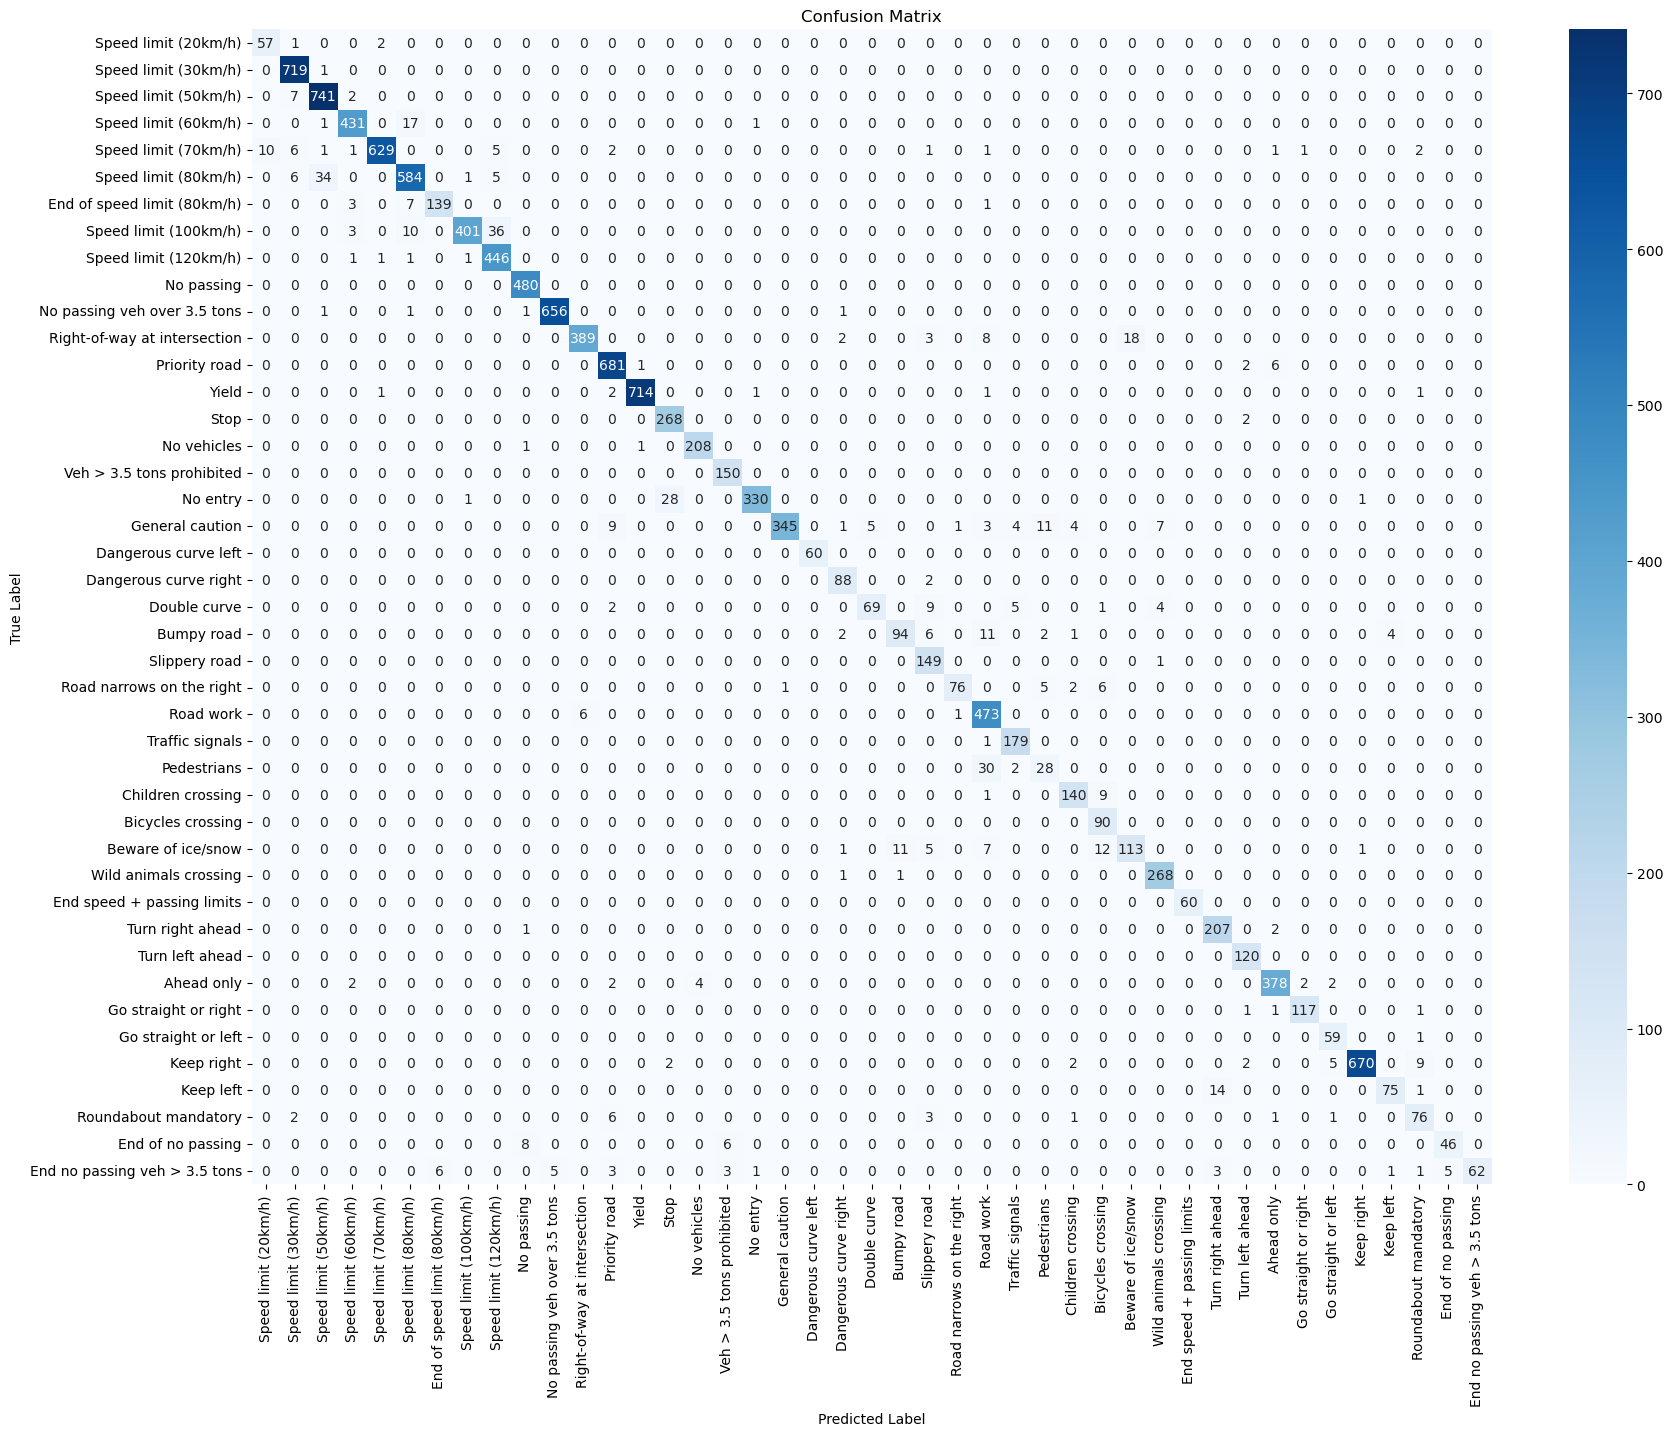

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_labels.values(), yticklabels=classes_labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Tuning CNN Model

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

def build_model(hp):
    model = Sequential()
    
    # 1st Convolutional Layer
    model.add(Conv2D(hp.Int('conv_1_filter', min_value=32, max_value=128, step=32), 
                     (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
    model.add(MaxPooling2D((2, 2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(hp.Int('conv_2_filter', min_value=64, max_value=256, step=64), 
                     (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(hp.Int('conv_3_filter', min_value=128, max_value=512, step=128), 
                     (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flattening the layers
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(NUM_CATEGORIES, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [24]:
from keras_tuner import RandomSearch

#creating randomsearch object
tuner = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, 
                        executions_per_trial=3,  # Number of times to train each model
                        directory='my_dir',
                        project_name='cnn_tuning')

# Display a summary of the search space
tuner.search_space_summary()

Search space summary
Default search space size: 6
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
conv_3_filter (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


C:\Users\emily\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Best CNN Tuned Model

In [25]:
# search best parameter
tuner.search(datagen.flow(X_train,y_train,batch_size=batch_size), 
             epochs = epochs, validation_data=(X_val,y_val),callbacks=[early_stopping])

best_cnn_hp = tuner.get_best_hyperparameters()[0]

# Display the best hyperparameters found
print(f"""
The optimal number of filters in the first layer is {best_cnn_hp.get('conv_1_filter')}.
The optimal number of filters in the second layer is {best_cnn_hp.get('conv_2_filter')}.
The optimal number of filters in the third layer is {best_cnn_hp.get('conv_3_filter')}.
The optimal number of units in the dense layer is {best_cnn_hp.get('dense_units')}.
The optimal dropout rate is {best_cnn_hp.get('dropout_rate')}.
The optimal learning rate is {best_cnn_hp.get('learning_rate')}.
""")

Trial 5 Complete [01h 23m 33s]
val_accuracy: 0.48689395065108937

Best val_accuracy So Far: 0.9957493742307028
Total elapsed time: 07h 16m 15s

The optimal number of filters in the first layer is 64.
The optimal number of filters in the second layer is 256.
The optimal number of filters in the third layer is 256.
The optimal number of units in the dense layer is 256.
The optimal dropout rate is 0.30000000000000004.
The optimal learning rate is 0.0011034007829890296.



# CNN Model with Best Parameter

In [26]:
# Build and train the model with best hyperparameter
best_cnn_model = tuner.hypermodel.build(best_cnn_hp)

hist = best_cnn_model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                         epochs=epochs,
                         validation_data=(X_val, y_val),
                         callbacks=[early_stopping])

best_cnn_model.save('tuned_cnn_model.h5')

Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 69s 78ms/step - accuracy: 0.0743 - loss: 3.4582 - val_accuracy: 0.4712 - val_loss: 1.7354
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.4242 - loss: 1.8745 - val_accuracy: 0.7758 - val_loss: 0.6767
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 54s 63ms/step - accuracy: 0.6749 - loss: 1.0322 - val_accuracy: 0.9033 - val_loss: 0.3011
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - accuracy: 0.7964 - loss: 0.6537 - val_accuracy: 0.9465 - val_loss: 0.1721
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.8501 - loss: 0.4807 - val_accuracy: 0.9713 - val_loss: 0.1021
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 63s 73ms/step - accuracy: 0.8847 - loss: 0.3817 - val_accuracy: 0.9691 - val_loss: 0.0979
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 60s 69ms/step - accuracy: 0.9055 - loss: 0.3047 - val_accuracy: 0.9761 - val_loss: 0.0785
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 52s 61ms/step - accuracy: 0.9235 - loss: 0

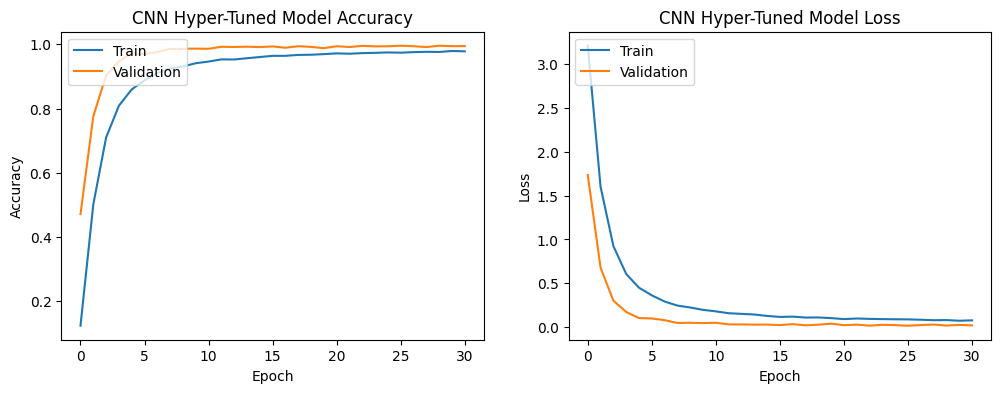

In [27]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('CNN Hyper-Tuned Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('CNN Hyper-Tuned Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Plot the accuracy and loss
plot_training_history(hist)


# Accuracy Report

In [28]:
best_cnn_model = load_model('tuned_cnn_model.h5')

# Evaluate the model on the training data
train_loss, train_accuracy = best_cnn_model.evaluate(X_train, y_train, verbose=0)
print(f'CNN Training Loss = {train_loss:.4f}')
print(f'CNN Training Accuracy = {train_accuracy * 100:.2f}%\n')

test_loss, test_accuracy = best_cnn_model.evaluate(X_test, to_categorical(labels, num_classes=NUM_CATEGORIES), verbose=0)
print(f'CNN Test Loss = {test_loss:.4f}')
print(f'CNN Test Accuracy = {test_accuracy * 100:.2f}%')

CNN Training Loss = 0.0088
CNN Training Accuracy = 99.75%

CNN Test Loss = 0.2085
CNN Test Accuracy = 96.60%


# Classification Report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(labels, y_pred_classes, target_names=list(classes_labels.values())))

                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.90      1.00      0.94        60
         Speed limit (30km/h)       0.93      0.96      0.95       720
         Speed limit (50km/h)       0.95      0.97      0.96       750
         Speed limit (60km/h)       0.88      0.98      0.93       450
         Speed limit (70km/h)       0.99      0.90      0.94       660
         Speed limit (80km/h)       0.92      0.95      0.93       630
  End of speed limit (80km/h)       0.91      0.81      0.86       150
        Speed limit (100km/h)       0.96      0.92      0.94       450
        Speed limit (120km/h)       0.90      0.93      0.92       450
                   No passing       0.87      0.99      0.93       480
 No passing veh over 3.5 tons       0.97      0.99      0.98       660
 Right-of-way at intersection       0.89      0.93      0.91       420
                Priority road       0.96      0.95      0.95       690
     

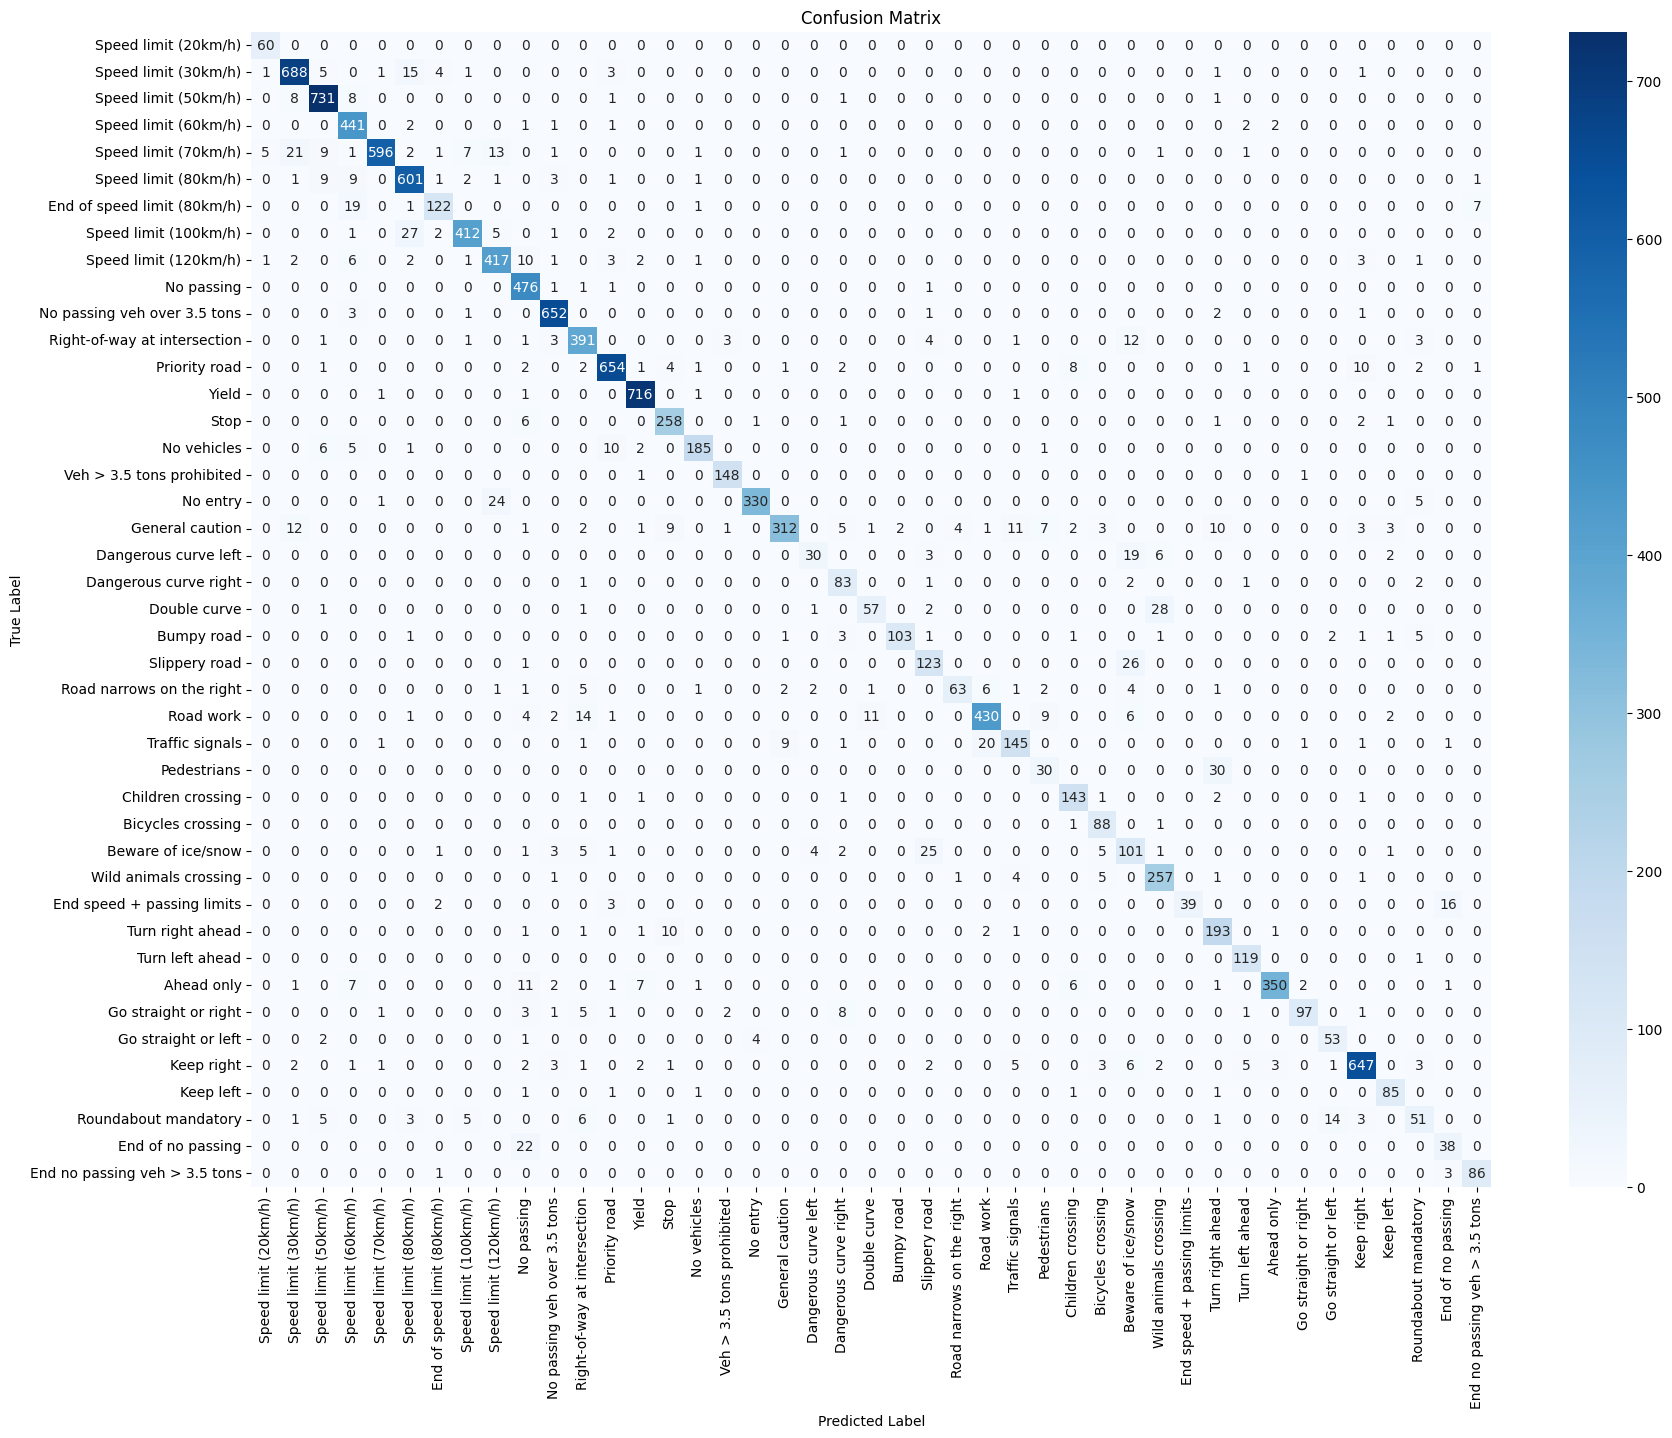

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(classes_labels.values()), yticklabels=list(classes_labels.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Prediction on Test Data

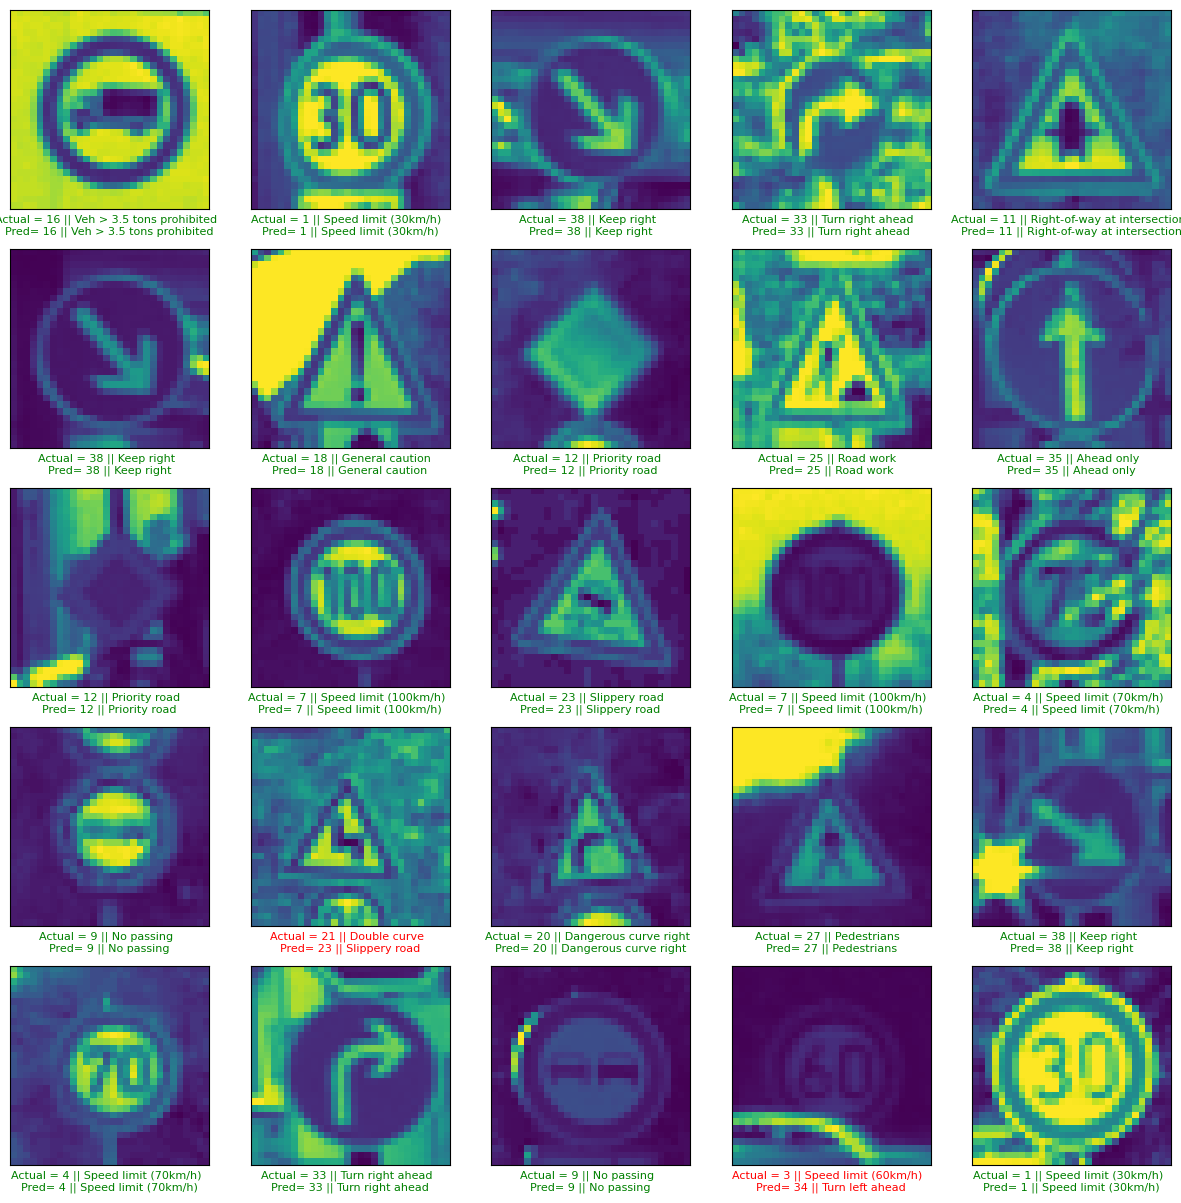

In [36]:
plt.figure(figsize = (15, 15))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = y_pred_classes[start_index + i]
    actual = labels[start_index + i]
    
    actual_label = classes_labels[actual]   # Getting actual class name
    predicted_label = classes_labels[prediction]  # Getting predicted class name
    
    # Set the color to green if the prediction is correct, red if wrong
    col = 'g' if prediction == actual else 'r'
    
    plt.xlabel('Actual = {} || {}  \nPred= {} || {}'.format(actual, actual_label, prediction, predicted_label), color = col, fontsize=8)
    plt.imshow(X_test[start_index + i])
plt.show()

# Display some error result

395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


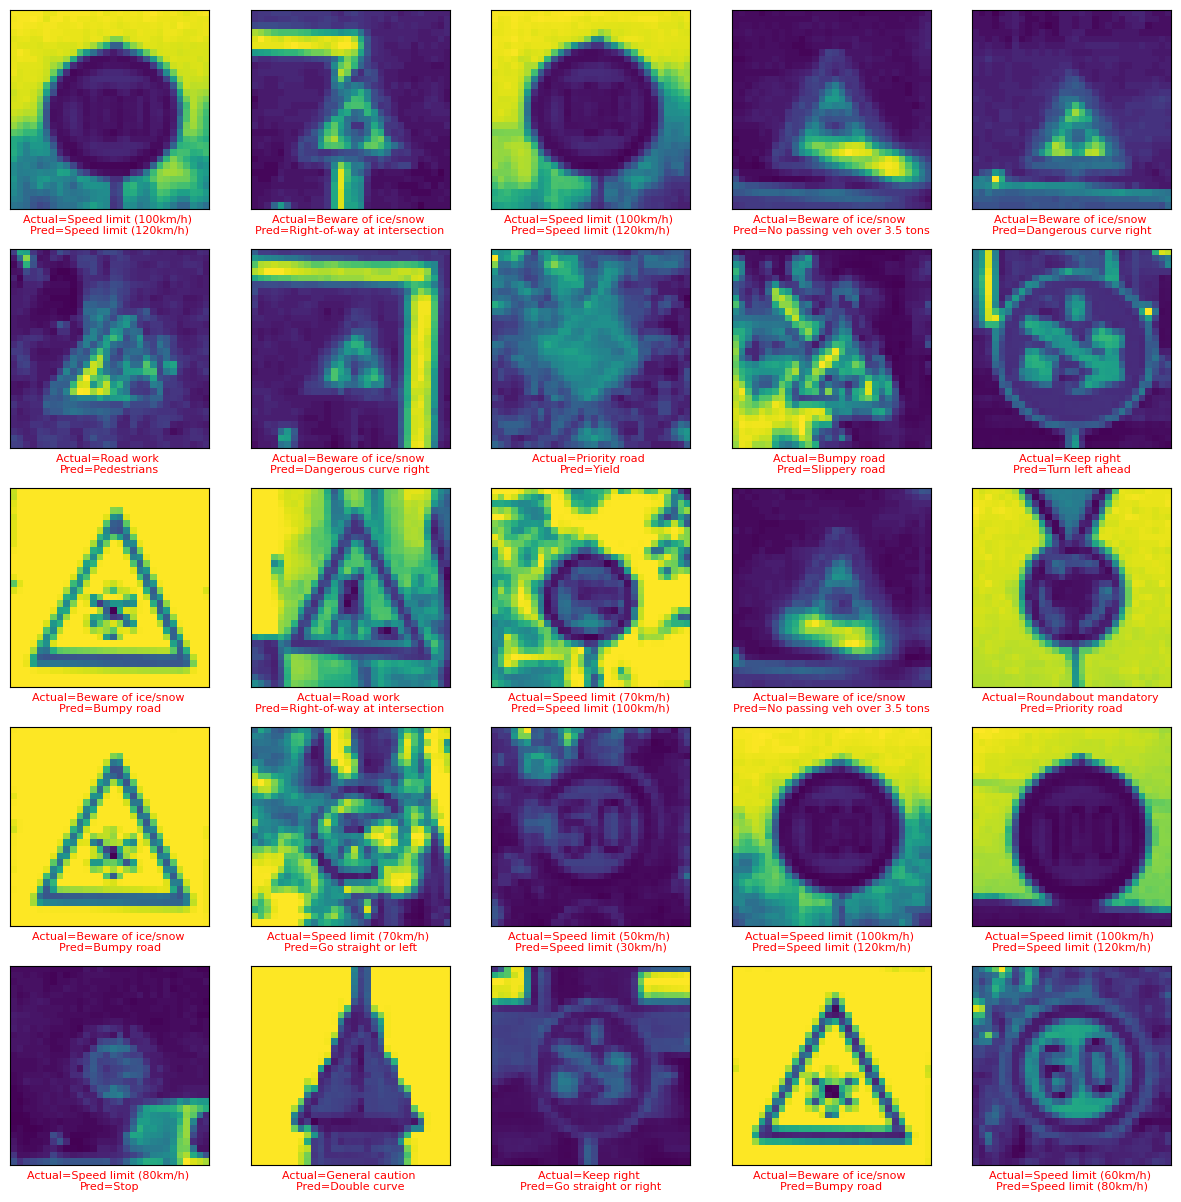

The most misclassified class is: Beware of ice/snow with 8 misclassifications.


In [37]:
import matplotlib.pyplot as plt
from collections import defaultdict
model = load_model('tuned_cnn_model.h5')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)  # Convert the predictions to class labels
labels = labels.astype(int)
# Set a counter to track the number of images shown
error_count = 0
max_errors_to_display = 25  # Set the number of incorrect images to display
# Dictionary to count misclassifications for each class
misclassifications = defaultdict(int)
plt.figure(figsize=(15, 15))
for i in range(len(y_pred_classes)):
   # Compare actual and predicted labels
   prediction = y_pred_classes[i]
   actual = labels[i]
   # If the prediction is incorrect, display the image and count the misclassification
   if prediction != actual:
       plt.subplot(5, 5, error_count + 1)
       plt.grid(False)
       plt.xticks([])
       plt.yticks([])
       # Get the actual and predicted class labels
       actual_label = classes_labels[actual]
       predicted_label = classes_labels[prediction]
       # Display the label with color red for incorrect prediction
       plt.xlabel(f'Actual={actual_label} \nPred={predicted_label}', color='r', fontsize=8)
       # Display the RGB image (remove cmap='gray')
       plt.imshow(X_test[i])  # For RGB images
       # Increment the counter for displayed errors
       error_count += 1
       # Increment the counter for misclassified classes
       misclassifications[actual_label] += 1
       # Stop after showing the maximum number of error images
       if error_count == max_errors_to_display:
           break
plt.show()
# Find and print the most misclassified class
most_misclassified_class = max(misclassifications, key=misclassifications.get)
print(f"The most misclassified class is: {most_misclassified_class} with {misclassifications[most_misclassified_class]} misclassifications.")

# RNN Model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Defining early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',   # Monitor the validation loss
    patience=5,               # Stop after 5 epochs with no improvement
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Defining the RNN model
model = Sequential()

# Adding a SimpleRNN layer
model.add(SimpleRNN(128, input_shape=(IMG_HEIGHT, IMG_WIDTH), activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Dropout for regularization

# Adding another RNN layer
model.add(SimpleRNN(128, activation='relu'))
model.add(Dropout(0.3))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Output layer
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Model summary
model.summary()

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 30, 128)        │        20,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,307 (294.17 KB)

 Trainable params: 75,307 (294.17 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Training the RNN model
history = model.fit(
    X_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping]
)

# Save the model
model.save('rnn_model.h5')

Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.0840 - loss: 3.4078 - val_accuracy: 0.3281 - val_loss: 2.2655
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3277 - loss: 2.2817 - val_accuracy: 0.5253 - val_loss: 1.5590
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.4658 - loss: 1.7602 - val_accuracy: 0.6178 - val_loss: 1.2570
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5565 - loss: 1.4723 - val_accuracy: 0.6670 - val_loss: 1.0773
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.6183 - loss: 1.2728 - val_accuracy: 0.7064 - val_loss: 0.9405
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.6628 - loss: 1.1291 - val_accuracy: 0.7395 - val_loss: 0.8428
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.7047 - loss: 0.9919 - val_accuracy: 0.7762 - val_loss: 0.7245
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7247 - loss: 0

# RNN Model Evaluation

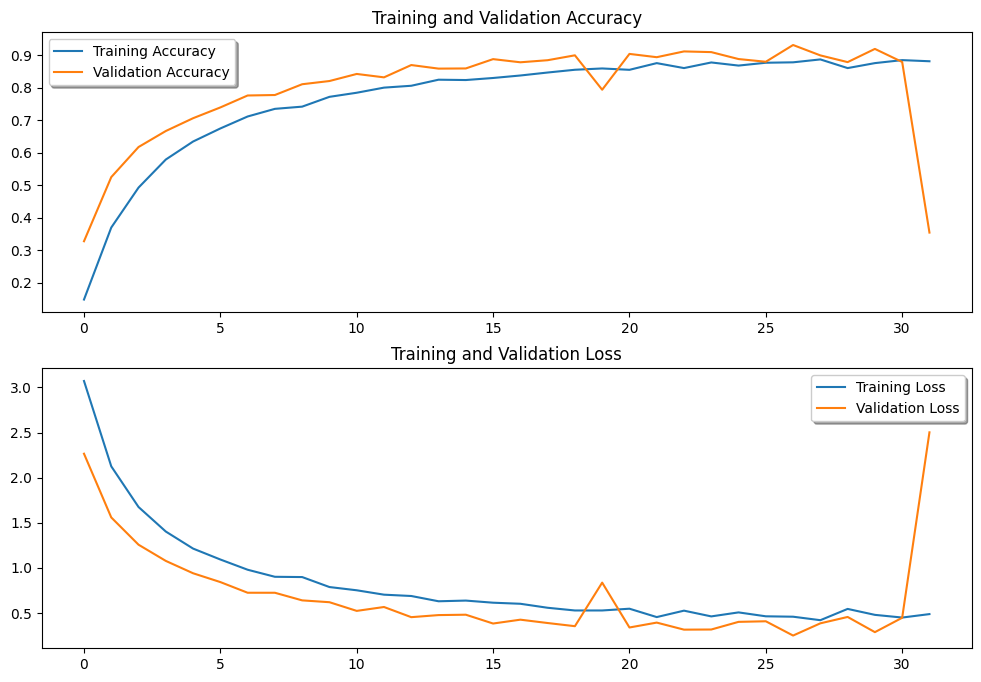

In [38]:
# Plot loss and accuracy curves
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plotting training and validation accuracy
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend(loc='best', shadow=True)

# Plotting training and validation loss
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend(loc='best', shadow=True)

# Show the plot
plt.show()

# Accuracy Report

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the saved RNN model
model = load_model('rnn_model.h5')  # Update the model name to the RNN model

# Predict class labels on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'RNN Training Loss = {train_loss:.4f}')
print(f'RNN Training Accuracy = {train_accuracy * 100:.2f}%\n')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, to_categorical(labels, num_classes=NUM_CATEGORIES), verbose=0)
print(f'RNN Test Loss = {test_loss:.4f}')
print(f'RNN Test Accuracy = {test_accuracy * 100:.2f}%')

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
RNN Training Loss = 0.1995
RNN Training Accuracy = 94.21%

RNN Test Loss = 0.7043
RNN Test Accuracy = 86.54%


# Classification Report

In [18]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Load the saved RNN model
model = load_model('rnn_model.h5')

# Use the RNN model to predict the labels of the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels

# Ensure that 'labels' is integer type
labels = labels.astype(int)

# Generate the classification report
report = classification_report(labels, y_pred_classes, target_names=classes_labels.values())
print(report)

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.71      0.70      0.71        60
         Speed limit (30km/h)       0.94      0.95      0.94       720
         Speed limit (50km/h)       0.97      0.95      0.96       750
         Speed limit (60km/h)       0.82      0.96      0.88       450
         Speed limit (70km/h)       0.96      0.88      0.92       660
         Speed limit (80km/h)       0.88      0.95      0.91       630
  End of speed limit (80km/h)       0.83      0.69      0.75       150
        Speed limit (100km/h)       0.95      0.84      0.89       450
        Speed limit (120km/h)       0.79      0.93      0.85       450
                   No passing       0.96      0.89      0.92       480
 No passing veh over 3.5 tons       0.96      0.95      0.95       660
 Right-of-way at intersection       0.89      0.85      0.87       420
                Priority road     

# Confusion Matrix

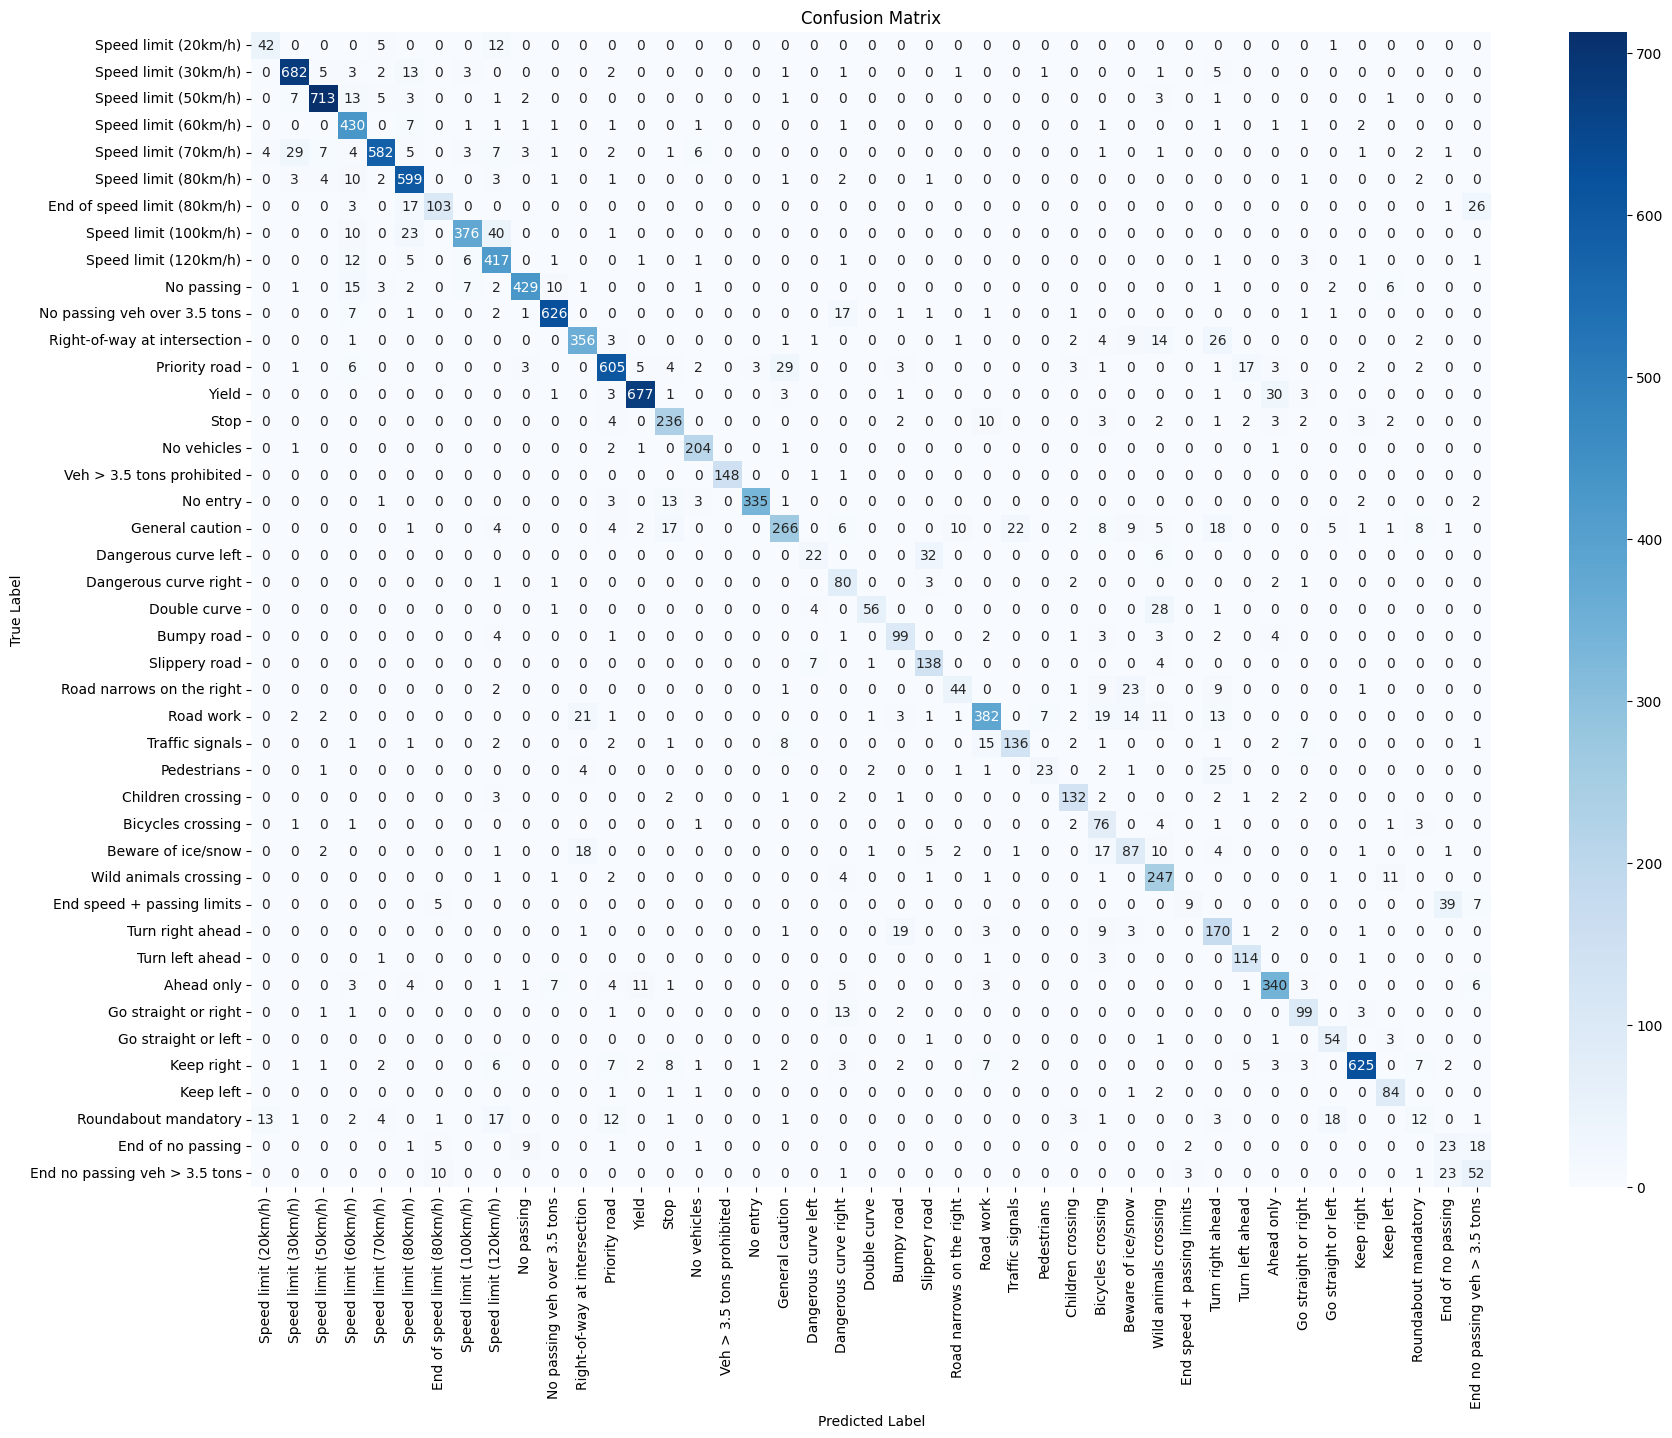

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_labels.values(), yticklabels=classes_labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Tuning for RNN Model

In [42]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import keras_tuner as kt

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

def build_model(hp):
    model = Sequential()

    # 1st RNN Layer
    model.add(SimpleRNN(hp.Int('rnn_units_1', min_value=32, max_value=128, step=32), 
                        activation='relu', return_sequences=True, input_shape=(IMG_HEIGHT, IMG_WIDTH)))
    
    # 2nd RNN Layer (optional)
    model.add(SimpleRNN(hp.Int('rnn_units_2', min_value=32, max_value=128, step=32), 
                        activation='relu', return_sequences=False))

    # Flattening the layers
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(NUM_CATEGORIES, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [43]:
from keras_tuner import RandomSearch

# Creating the RandomSearch object for RNN model
tuner = RandomSearch(build_model, 
                     objective='val_accuracy', 
                     max_trials=5, 
                     executions_per_trial=3,  # Number of times to train each model
                     directory='my_dir',
                     project_name='rnn_tuning')  # Updated project name

# Display a summary of the search space
tuner.search_space_summary()


Search space summary
Default search space size: 5
rnn_units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
rnn_units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


C:\Users\emily\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Best RNN Tuned Model

In [44]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,  # No data augmentation needed for RNN
             epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Get the best hyperparameters for the RNN
best_rnn_hp = tuner.get_best_hyperparameters()[0]

# Display the best hyperparameters found
print(f"""
The optimal number of units in the first RNN layer is {best_rnn_hp.get('rnn_units_1')}.
The optimal number of units in the second RNN layer is {best_rnn_hp.get('rnn_units_2')}.
The optimal number of units in the dense layer is {best_rnn_hp.get('dense_units')}.
The optimal dropout rate is {best_rnn_hp.get('dropout_rate')}.
The optimal learning rate is {best_rnn_hp.get('learning_rate')}.
""")

Trial 5 Complete [00h 12m 42s]
val_accuracy: 0.4139816810687383

Best val_accuracy So Far: 0.9699906508127848
Total elapsed time: 01h 15m 41s

The optimal number of units in the first RNN layer is 128.
The optimal number of units in the second RNN layer is 96.
The optimal number of units in the dense layer is 384.
The optimal dropout rate is 0.30000000000000004.
The optimal learning rate is 0.00024771570791392157.



# RNN Model with Best Parameter

In [45]:
# Build and train the RNN model with the best hyperparameters
best_rnn_model = tuner.hypermodel.build(best_rnn_hp)

# Train the model with the best hyperparameters
hist = best_rnn_model.fit(X_train, y_train,  # Direct data, no augmentation for RNN
                         epochs=epochs,
                         validation_data=(X_val, y_val),
                         callbacks=[early_stopping])

# Save the best RNN model
best_rnn_model.save('tuned_rnn_model.h5')

Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.0911 - loss: 3.3993 - val_accuracy: 0.4754 - val_loss: 1.8443
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.5042 - loss: 1.6958 - val_accuracy: 0.7149 - val_loss: 0.9899
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7090 - loss: 0.9988 - val_accuracy: 0.7878 - val_loss: 0.7178
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8013 - loss: 0.6898 - val_accuracy: 0.8527 - val_loss: 0.5121
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8497 - loss: 0.5102 - val_accuracy: 0.8751 - val_loss: 0.4472
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8850 - loss: 0.3961 - val_accuracy: 0.8960 - val_loss: 0.3534
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9017 - loss: 0.3318 - val_accuracy: 0.9263 - val_loss: 0.2601
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9214 - loss: 0

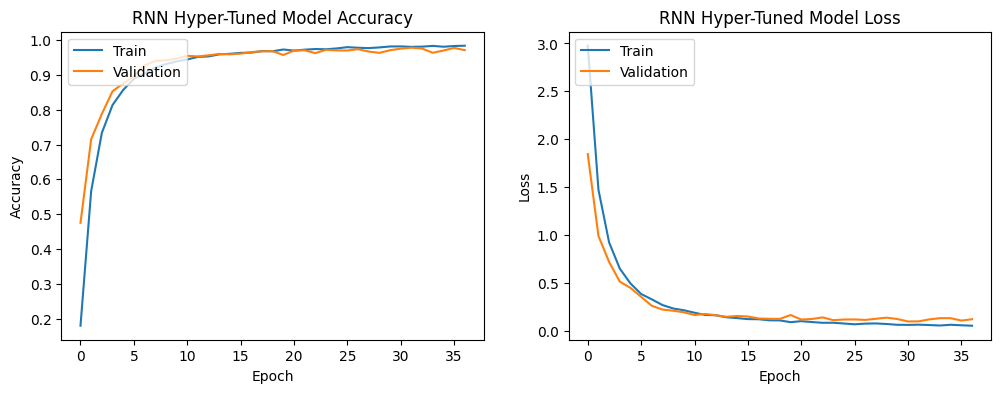

In [46]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss for RNN model
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('RNN Hyper-Tuned Model Accuracy') 
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('RNN Hyper-Tuned Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Plot the accuracy and loss for the RNN model
plot_training_history(hist)

# Accuracy Report

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load the best RNN model
best_rnn_model = load_model('tuned_rnn_model.h5')

# Evaluate the RNN model on the training data
train_loss, train_accuracy = best_rnn_model.evaluate(X_train, y_train, verbose=0)
print(f'RNN Training Loss = {train_loss:.4f}')
print(f'RNN Training Accuracy = {train_accuracy * 100:.2f}%\n')

# Evaluate the RNN model on the test data
test_loss, test_accuracy = best_rnn_model.evaluate(X_test, to_categorical(labels, num_classes=NUM_CATEGORIES), verbose=0)
print(f'RNN Test Loss = {test_loss:.4f}')
print(f'RNN Test Accuracy = {test_accuracy * 100:.2f}%')


RNN Training Loss = 0.0304
RNN Training Accuracy = 99.02%

RNN Test Loss = 0.6778
RNN Test Accuracy = 91.85%


# Classification Report

In [19]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Load the saved RNN model
model = load_model('tuned_rnn_model.h5')

# Use the RNN model to predict the labels of the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels

# Ensure that 'labels' is integer type
labels = labels.astype(int)

# Generate the classification report
report = classification_report(labels, y_pred_classes, target_names=classes_labels.values())
print(report)

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.90      1.00      0.94        60
         Speed limit (30km/h)       0.93      0.96      0.95       720
         Speed limit (50km/h)       0.95      0.97      0.96       750
         Speed limit (60km/h)       0.88      0.98      0.93       450
         Speed limit (70km/h)       0.99      0.90      0.94       660
         Speed limit (80km/h)       0.92      0.95      0.93       630
  End of speed limit (80km/h)       0.91      0.81      0.86       150
        Speed limit (100km/h)       0.96      0.92      0.94       450
        Speed limit (120km/h)       0.90      0.93      0.92       450
                   No passing       0.87      0.99      0.93       480
 No passing veh over 3.5 tons       0.97      0.99      0.98       660
 Right-of-way at intersection       0.89      0.93      0.91       420
                Priority road     

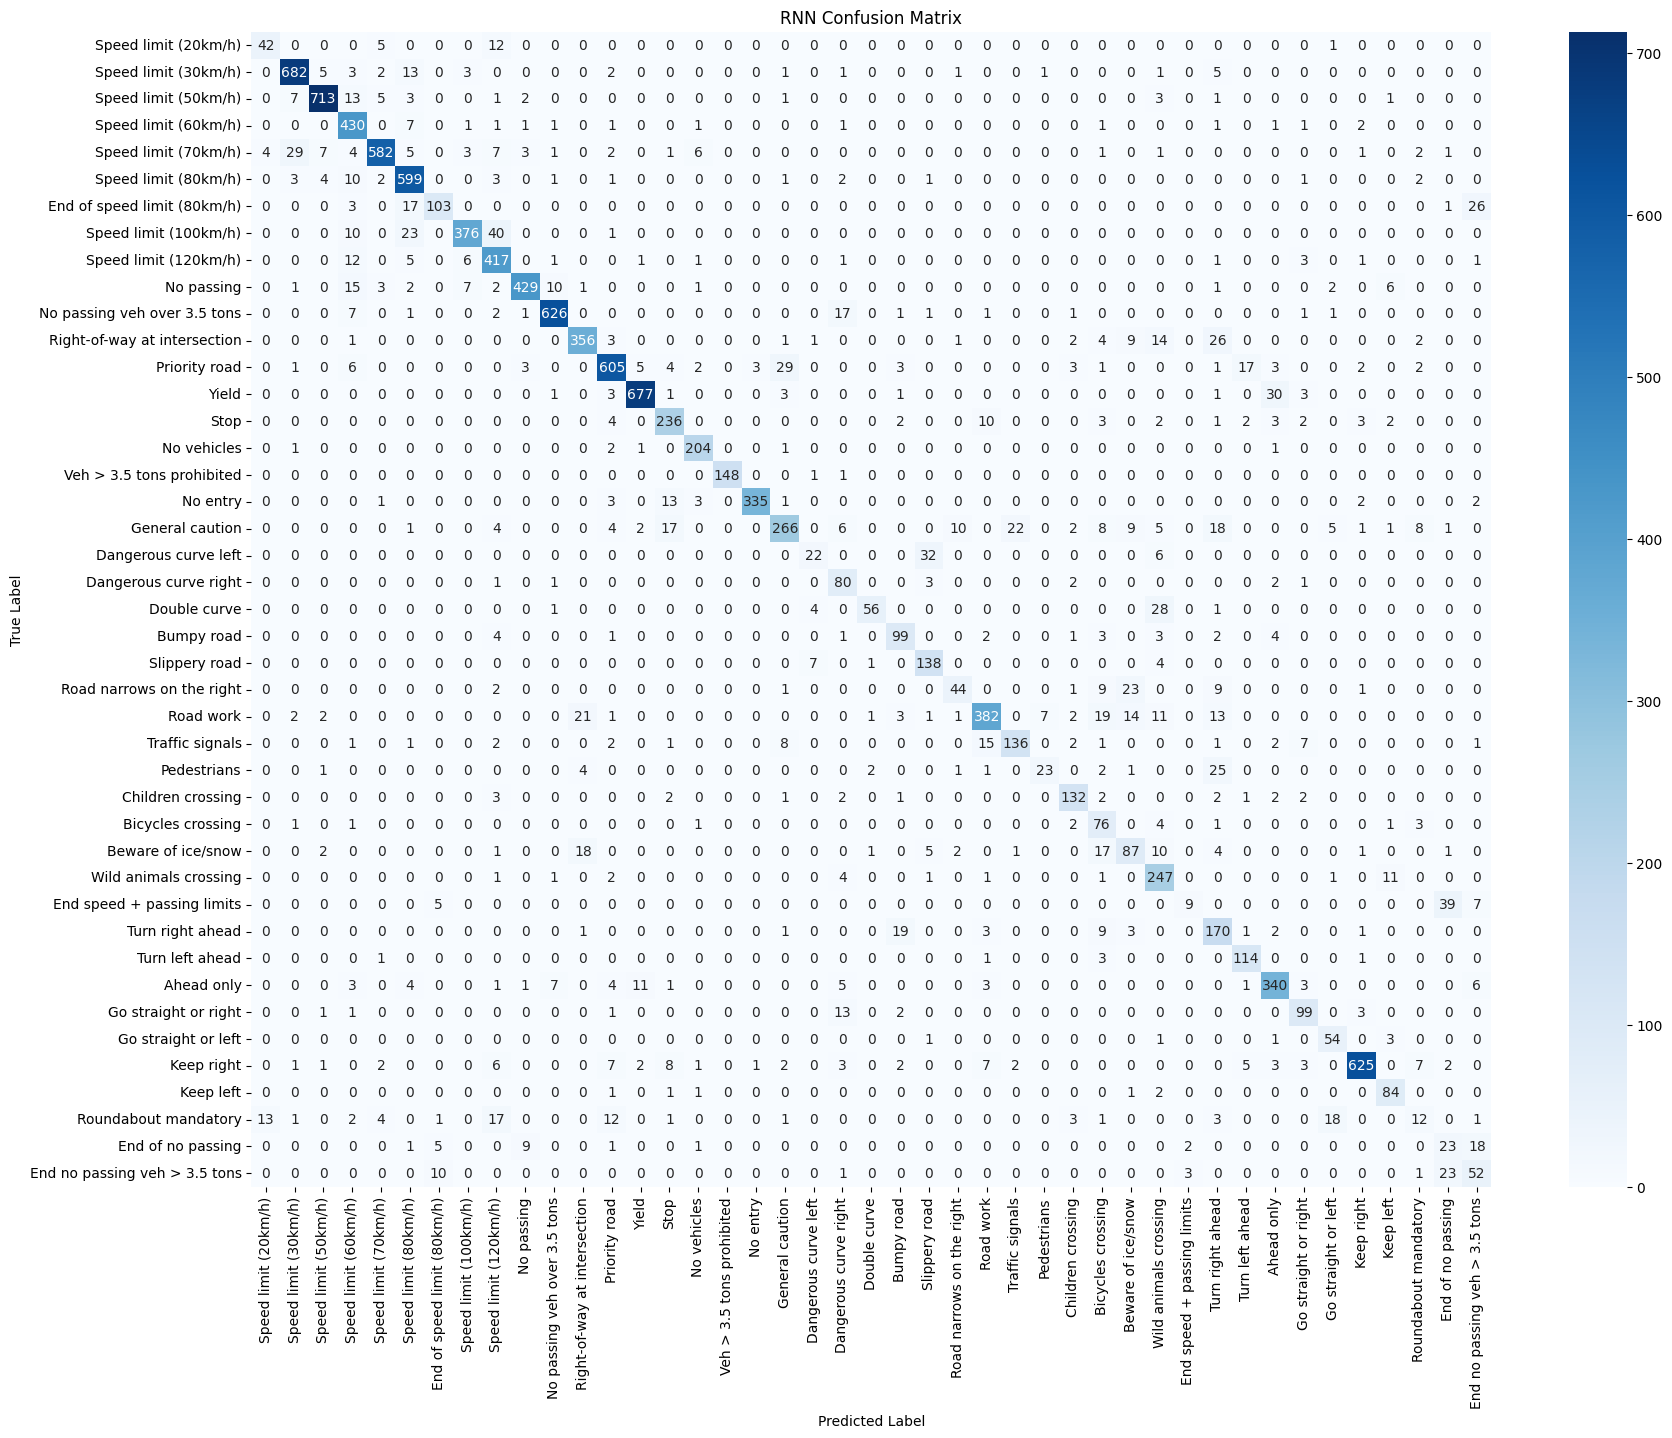

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for RNN predictions
cm = confusion_matrix(labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(classes_labels.values()), yticklabels=list(classes_labels.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RNN Confusion Matrix')  # Updated title to reflect RNN
plt.show()


# Prediction on Test Data

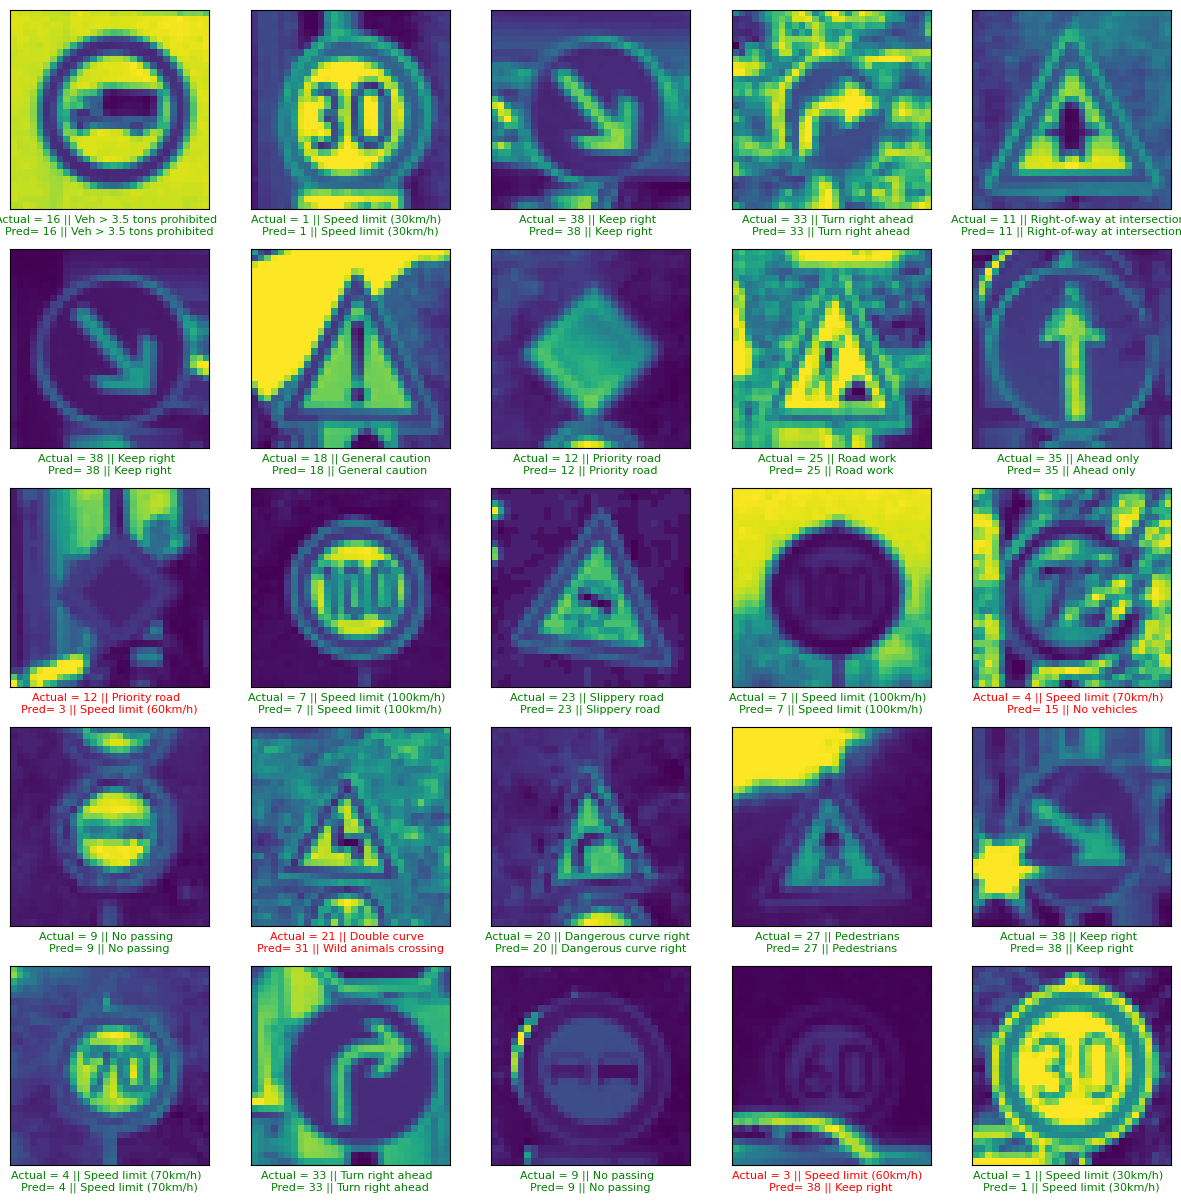

In [50]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(15, 15))

# Start index for displaying images
start_index = 0

# Loop over 25 images
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # Get the predicted and actual labels
    prediction = y_pred_classes[start_index + i]
    actual = labels[start_index + i]
    
    # Get the class names
    actual_label = classes_labels[actual]   # Actual class name
    predicted_label = classes_labels[prediction]  # Predicted class name
    
    # Set the color: green for correct prediction, red for incorrect
    col = 'g' if prediction == actual else 'r'
    
    # Display the actual vs predicted labels, color-coded by accuracy
    plt.xlabel('Actual = {} || {}  \nPred= {} || {}'.format(actual, actual_label, prediction, predicted_label), color=col, fontsize=8)
    
    # Display the image
    plt.imshow(X_test[start_index + i])

# Show the plot
plt.show()


# Display Some Error Result

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


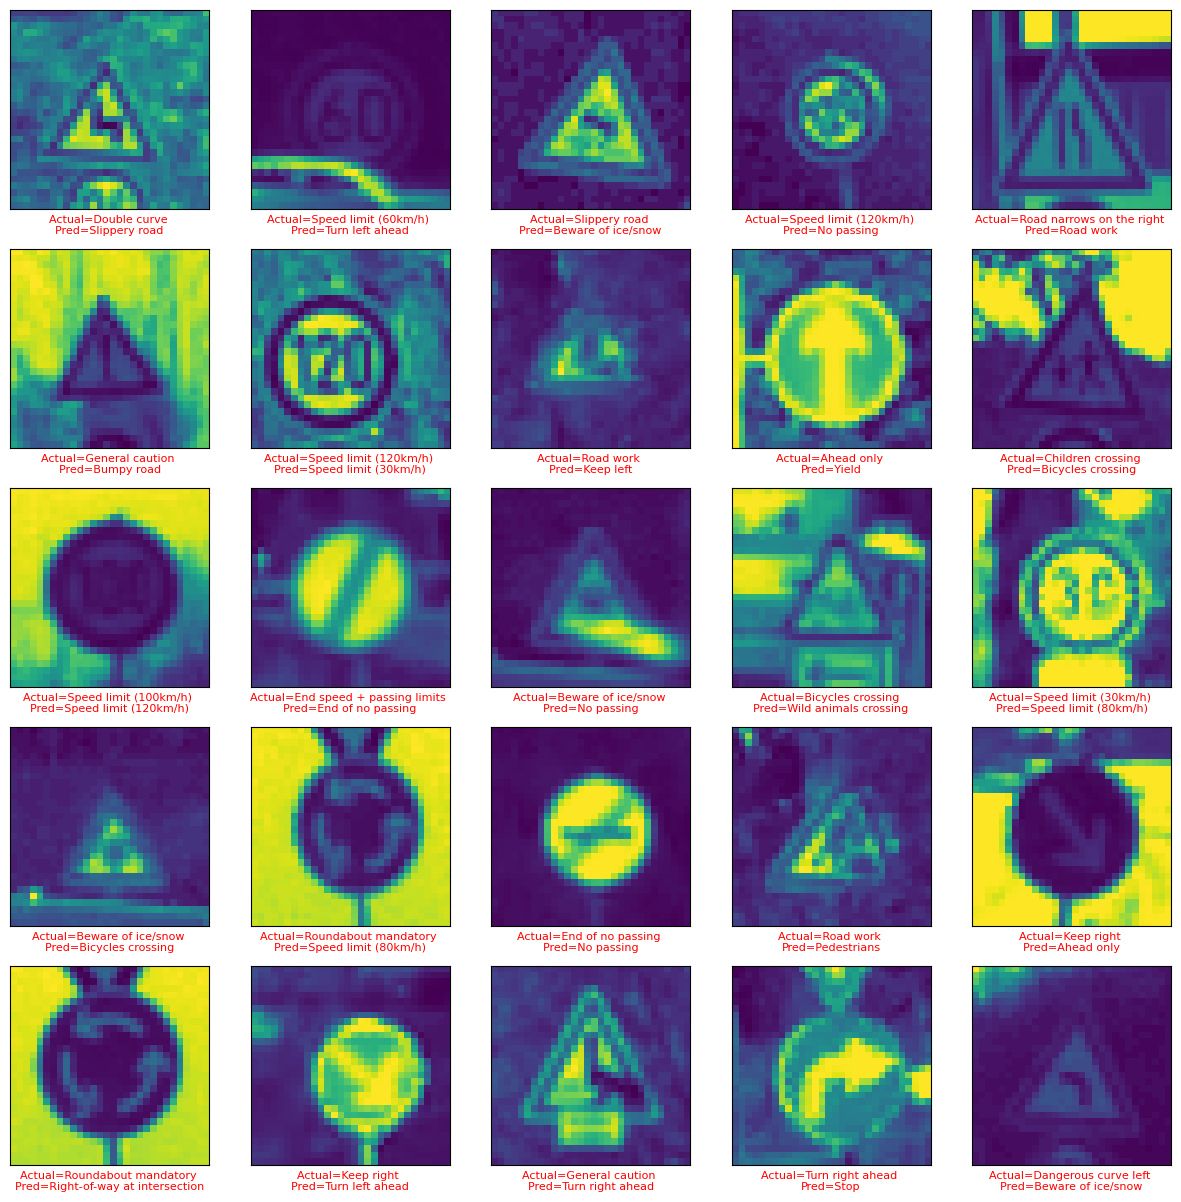

The most misclassified class is: Speed limit (120km/h) with 2 misclassifications.


In [22]:
import matplotlib.pyplot as plt
from collections import defaultdict
model = load_model('tuned_rnn_model.h5')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)  # Convert the predictions to class labels
labels = labels.astype(int)
# Set a counter to track the number of images shown
error_count = 0
max_errors_to_display = 25  # Set the number of incorrect images to display
# Dictionary to count misclassifications for each class
misclassifications = defaultdict(int)
plt.figure(figsize=(15, 15))
for i in range(len(y_pred_classes)):
   # Compare actual and predicted labels
   prediction = y_pred_classes[i]
   actual = labels[i]
   # If the prediction is incorrect, display the image and count the misclassification
   if prediction != actual:
       plt.subplot(5, 5, error_count + 1)
       plt.grid(False)
       plt.xticks([])
       plt.yticks([])
       # Get the actual and predicted class labels
       actual_label = classes_labels[actual]
       predicted_label = classes_labels[prediction]
       # Display the label with color red for incorrect prediction
       plt.xlabel(f'Actual={actual_label} \nPred={predicted_label}', color='r', fontsize=8)
       # Display the RGB image (remove cmap='gray')
       plt.imshow(X_test[i])  # For RGB images
       # Increment the counter for displayed errors
       error_count += 1
       # Increment the counter for misclassified classes
       misclassifications[actual_label] += 1
       # Stop after showing the maximum number of error images
       if error_count == max_errors_to_display:
           break
plt.show()
# Find and print the most misclassified class
most_misclassified_class = max(misclassifications, key=misclassifications.get)
print(f"The most misclassified class is: {most_misclassified_class} with {misclassifications[most_misclassified_class]} misclassifications.")

# LSTM Model

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Defining early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',   
    patience=5,              
    restore_best_weights=True 
)

# Defining the LSTM model
model = Sequential()

# Adding an LSTM layer
model.add(LSTM(128, input_shape=(IMG_HEIGHT, IMG_WIDTH), activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Dropout for regularization

# Adding another LSTM layer
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.3))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Output layer
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Model summary
model.summary()

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\emily\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        81,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,051 (918.17 KB)

 Trainable params: 235,051 (918.17 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Training the lstm model
history = model.fit(
    X_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping]
)

# Save the model
model.save('lstm_model.h5')

Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.0679 - loss: 3.5173 - val_accuracy: 0.1444 - val_loss: 3.0328
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.1942 - loss: 2.8740 - val_accuracy: 0.4026 - val_loss: 1.9905
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.3692 - loss: 2.1263 - val_accuracy: 0.5268 - val_loss: 1.4552
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.4881 - loss: 1.6670 - val_accuracy: 0.6244 - val_loss: 1.1713
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.5618 - loss: 1.3940 - val_accuracy: 0.7014 - val_loss: 0.9494
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.6319 - loss: 1.1513 - val_accuracy: 0.7264 - val_loss: 0.8627
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.7005 - loss: 0.9575 - val_accuracy: 0.8000 - val_loss: 0.6329
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.7504 - loss: 0

# LSTM Model Evaluation

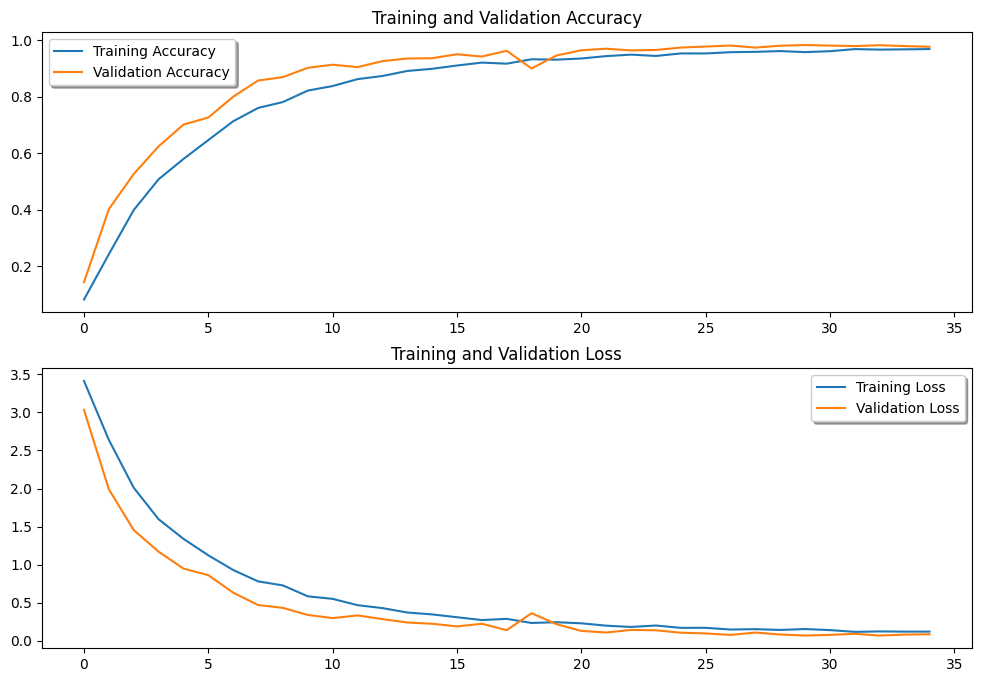

In [45]:
# plot loss and accuracy curves 
fig, ax = plt.subplots(2,1,figsize=(12,8))

ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend(loc='best',shadow=True)

ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend(loc='best',shadow=True)

plt.show()

# Accuracy Report

In [46]:
model = load_model('lstm_model.h5')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)  # Convert the predictions to class labels

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'LSTM Training Loss = {train_loss:.4f}')
print(f'LSTM Training Accuracy = {train_accuracy * 100:.2f}%\n')

test_loss, test_accuracy = model.evaluate(X_test, to_categorical(labels, num_classes=NUM_CATEGORIES), verbose=0)
print(f'LSTM Test Loss = {test_loss:.4f}')
print(f'LSTM Test Accuracy = {test_accuracy * 100:.2f}%')

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step
LSTM Training Loss = 0.0430
LSTM Training Accuracy = 98.75%

LSTM Test Loss = 0.5044
LSTM Test Accuracy = 91.40%


# Classification Report

In [20]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Load the saved LSTM model
model = load_model('lstm_model.h5')

# Use the LSTM model to predict the labels of the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels

# Ensure that 'labels' is integer type
labels = labels.astype(int)

# Generate the classification report
report = classification_report(labels, y_pred_classes, target_names=classes_labels.values())
print(report)

395/395 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step
                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.98      0.77      0.86        60
         Speed limit (30km/h)       0.94      0.96      0.95       720
         Speed limit (50km/h)       0.95      0.98      0.96       750
         Speed limit (60km/h)       0.88      0.98      0.93       450
         Speed limit (70km/h)       0.99      0.90      0.94       660
         Speed limit (80km/h)       0.92      0.94      0.93       630
  End of speed limit (80km/h)       0.97      0.77      0.86       150
        Speed limit (100km/h)       0.95      0.92      0.93       450
        Speed limit (120km/h)       0.82      0.98      0.89       450
                   No passing       0.97      0.95      0.96       480
 No passing veh over 3.5 tons       0.99      0.99      0.99       660
 Right-of-way at intersection       0.92      0.88      0.90       420
                Priority road    

# Confusion Matrix

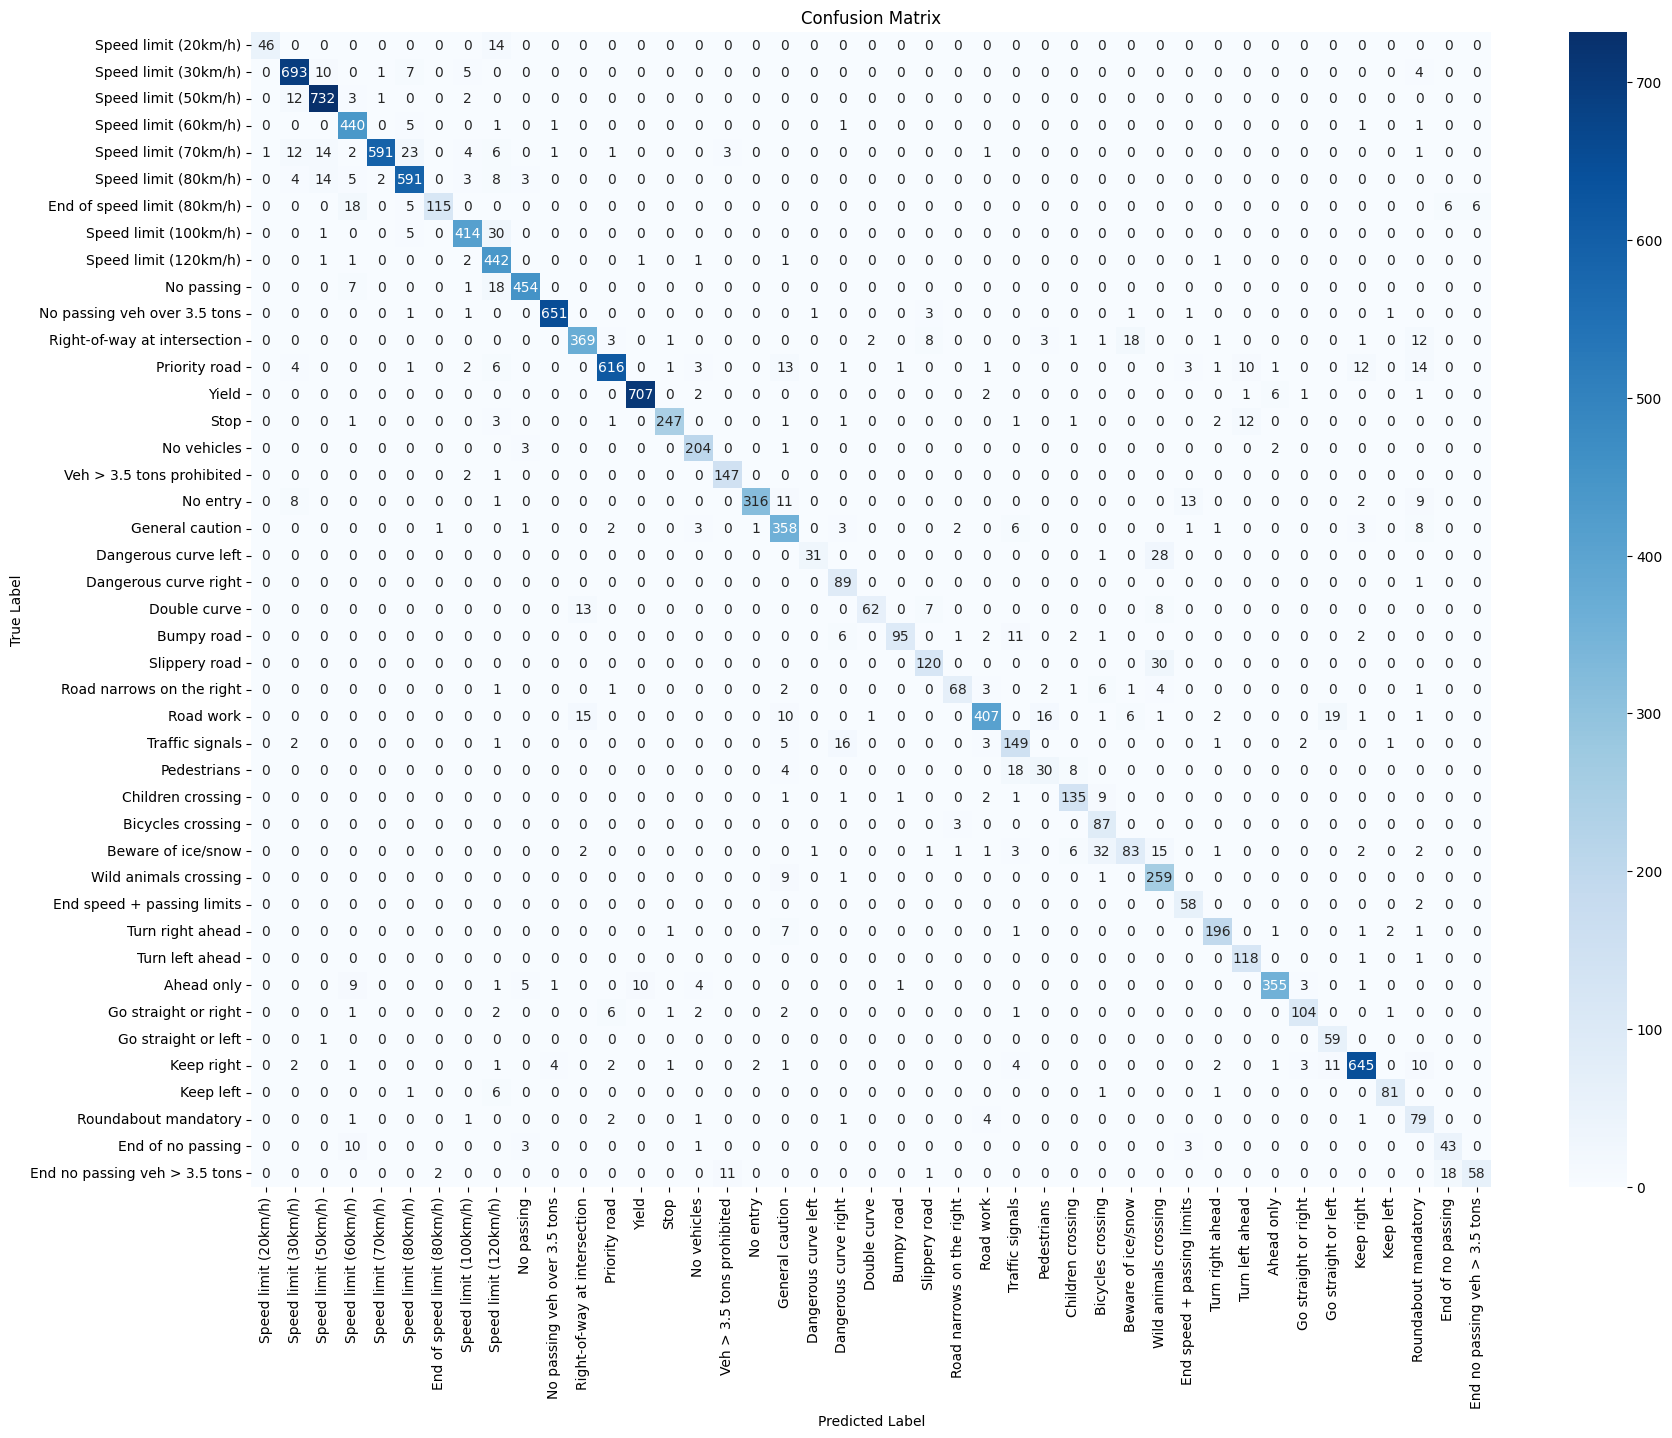

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_labels.values(), yticklabels=classes_labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Tuning for LSTM Model

In [49]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Function to build an LSTM model with hyperparameter tuning
def build_model(hp):
    model = Sequential()
    
    # 1st LSTM Layer
    model.add(LSTM(units=hp.Int('lstm_1_units', min_value=64, max_value=256, step=64), 
                   return_sequences=True, 
                   activation='relu', 
                   input_shape=(IMG_HEIGHT, IMG_WIDTH)))
    model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.2, max_value=0.5, step=0.1)))
    
    # 2nd LSTM Layer
    model.add(LSTM(units=hp.Int('lstm_2_units', min_value=64, max_value=256, step=64), 
                   return_sequences=False, 
                   activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Flatten the output before passing to dense layers
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(units=hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate_3', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(NUM_CATEGORIES, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [50]:
from keras_tuner import RandomSearch

# Creating random search object for LSTM
tuner = RandomSearch(
    build_model,                # This should be your LSTM build_model function
    objective='val_accuracy',    # The goal is to maximize validation accuracy
    max_trials=5,                # Number of different hyperparameter combinations to try
    executions_per_trial=3,      # Number of times to train each model
    directory='my_dir',          # Directory to save the results
    project_name='lstm_tuning'   # Updated to reflect LSTM tuning
)

# Display a summary of the search space
tuner.search_space_summary()

Search space summary
Default search space size: 7
lstm_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
dropout_rate_1 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
lstm_2_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
dropout_rate_2 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
dropout_rate_3 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


C:\Users\emily\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Best LSTM Tuned Model

In [51]:
# Search for the best parameters using the LSTM model
tuner.search(X_train, y_train, 
             epochs=epochs, 
             validation_data=(X_val, y_val), 
             callbacks=[early_stopping])

# Get the best hyperparameters from the search
best_lstm_hp = tuner.get_best_hyperparameters()[0]

# Display the best hyperparameters found for the LSTM model
print(f"""
The optimal number of units in the first LSTM layer is {best_lstm_hp.get('lstm_1_units')}.
The optimal number of units in the second LSTM layer is {best_lstm_hp.get('lstm_2_units')}.
The optimal number of units in the dense layer is {best_lstm_hp.get('dense_units')}.
The optimal dropout rate for the first LSTM layer is {best_lstm_hp.get('dropout_rate_1')}.
The optimal dropout rate for the second LSTM layer is {best_lstm_hp.get('dropout_rate_2')}.
The optimal dropout rate for the dense layer is {best_lstm_hp.get('dropout_rate_3')}.
The optimal learning rate is {best_lstm_hp.get('learning_rate')}.
""")

Trial 5 Complete [00h 25m 19s]
val_accuracy: 0.7942134936650594

Best val_accuracy So Far: 0.9843293825785319
Total elapsed time: 05h 16m 18s

The optimal number of units in the first LSTM layer is 192.
The optimal number of units in the second LSTM layer is 256.
The optimal number of units in the dense layer is 128.
The optimal dropout rate for the first LSTM layer is 0.30000000000000004.
The optimal dropout rate for the second LSTM layer is 0.2.
The optimal dropout rate for the dense layer is 0.4.
The optimal learning rate is 0.0007948724966896242.



# LSTM Model with Best Parameter

In [52]:
# Build and train the LSTM model with the best hyperparameters
best_lstm_model = tuner.hypermodel.build(best_lstm_hp)

# Train the model with the best hyperparameters
hist = best_lstm_model.fit(X_train, y_train, 
                           batch_size=batch_size,
                           epochs=epochs,
                           validation_data=(X_val, y_val),
                           callbacks=[early_stopping])

# Save the trained LSTM model
best_lstm_model.save('tuned_lstm_model.h5')


Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - accuracy: 0.0656 - loss: 3.5134 - val_accuracy: 0.1460 - val_loss: 3.0203
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 94s 110ms/step - accuracy: 0.2028 - loss: 2.8601 - val_accuracy: 0.4603 - val_loss: 1.8322
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 118s 138ms/step - accuracy: 0.4081 - loss: 1.9626 - val_accuracy: 0.5644 - val_loss: 1.3568
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 106s 124ms/step - accuracy: 0.5469 - loss: 1.4627 - val_accuracy: 0.6081 - val_loss: 1.1923
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.6706 - loss: 1.0597 - val_accuracy: 0.7545 - val_loss: 0.7485
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 76s 89ms/step - accuracy: 0.7595 - loss: 0.7859 - val_accuracy: 0.8332 - val_loss: 0.5522
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 88s 102ms/step - accuracy: 0.7931 - loss: 0.6757 - val_accuracy: 0.8902 - val_loss: 0.3584
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 75s 88ms/step - accuracy: 0.8445 - l

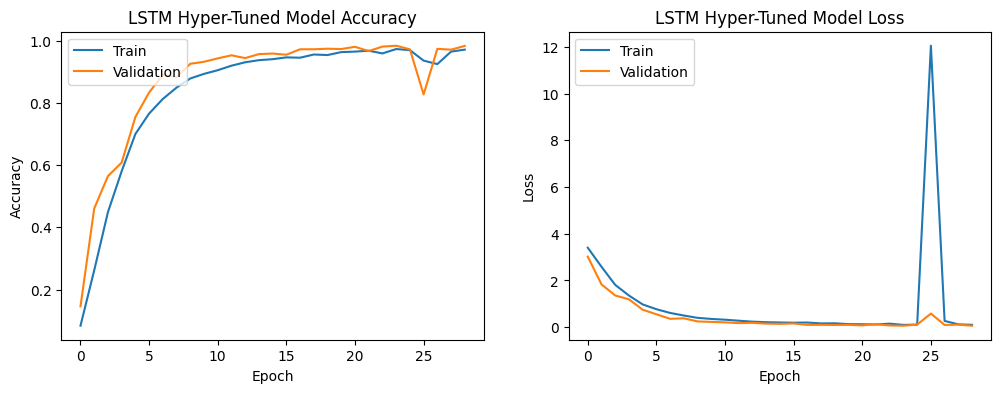

In [53]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss for LSTM model
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('LSTM Hyper-Tuned Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('LSTM Hyper-Tuned Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Display the plots
    plt.show()

# Plot the accuracy and loss for the LSTM model
plot_training_history(hist)

# Accuracy Report

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load the saved LSTM model
best_lstm_model = load_model('tuned_lstm_model.h5')

# Evaluate the model on the training data
train_loss, train_accuracy = best_lstm_model.evaluate(X_train, y_train, verbose=0)
print(f'LSTM Training Loss = {train_loss:.4f}')
print(f'LSTM Training Accuracy = {train_accuracy * 100:.2f}%\n')

# Evaluate the model on the test data
test_loss, test_accuracy = best_lstm_model.evaluate(X_test, to_categorical(labels, num_classes=NUM_CATEGORIES), verbose=0)
print(f'LSTM Test Loss = {test_loss:.4f}')
print(f'LSTM Test Accuracy = {test_accuracy * 100:.2f}%')

LSTM Training Loss = 2.6423
LSTM Training Accuracy = 98.96%

LSTM Test Loss = 0.6160
LSTM Test Accuracy = 90.04%


# Classification Report

In [21]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Load the saved LSTM model
model = load_model('tuned_lstm_model.h5')

# Use the LSTM model to predict the labels of the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels

# Ensure that 'labels' is integer type
labels = labels.astype(int)

# Generate the classification report
report = classification_report(labels, y_pred_classes, target_names=classes_labels.values())
print(report)

395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step
                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.95      0.97      0.96        60
         Speed limit (30km/h)       0.94      0.98      0.96       720
         Speed limit (50km/h)       0.96      0.97      0.97       750
         Speed limit (60km/h)       0.86      0.94      0.90       450
         Speed limit (70km/h)       0.99      0.90      0.94       660
         Speed limit (80km/h)       0.87      0.96      0.91       630
  End of speed limit (80km/h)       1.00      0.79      0.88       150
        Speed limit (100km/h)       0.90      0.88      0.89       450
        Speed limit (120km/h)       0.81      0.91      0.86       450
                   No passing       0.96      0.83      0.89       480
 No passing veh over 3.5 tons       0.97      0.98      0.98       660
 Right-of-way at intersection       0.92      0.90      0.91       420
                Priority road    

# Confusion Matrix

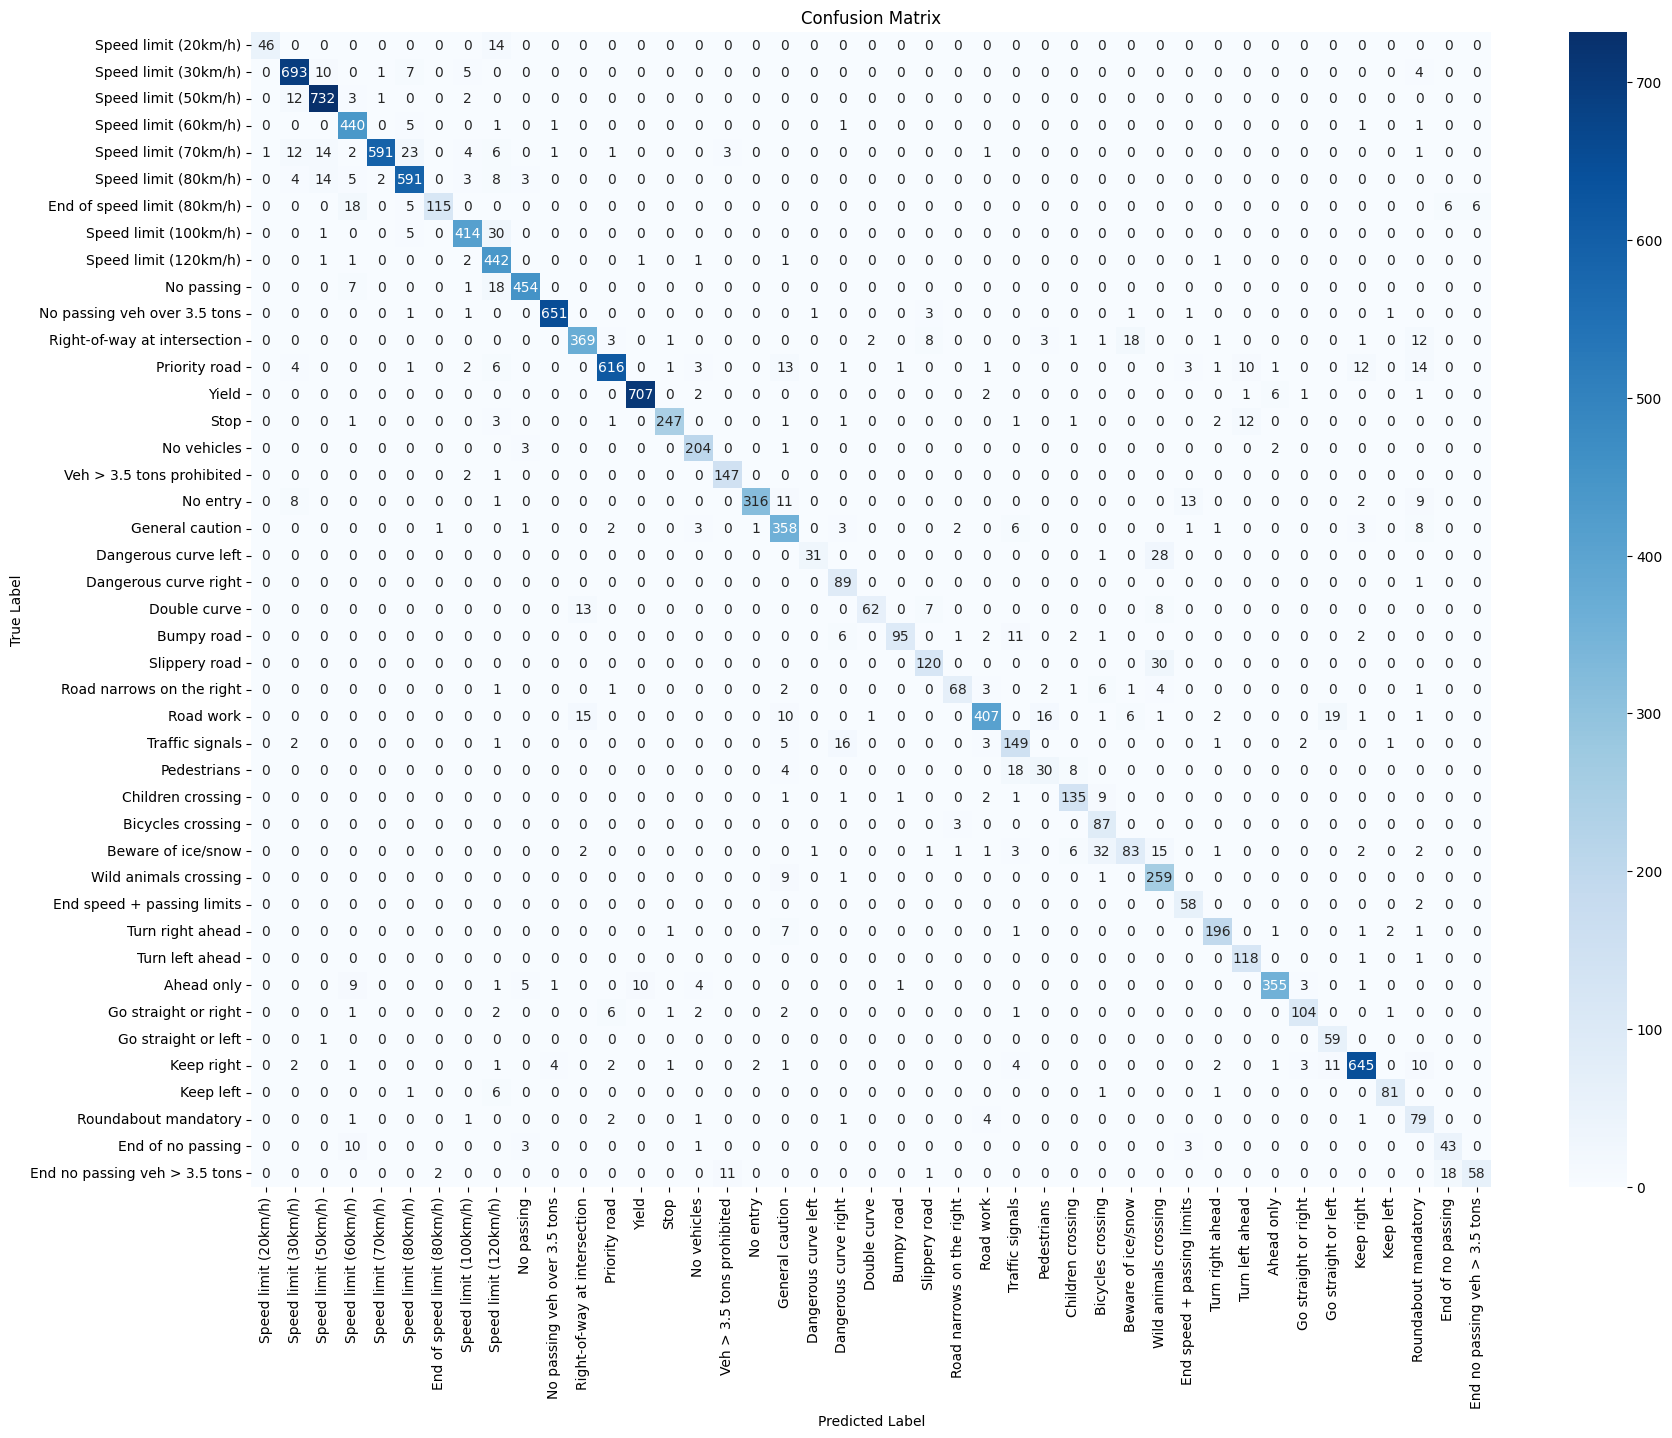

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(classes_labels.values()), yticklabels=list(classes_labels.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Prediction on Test Data

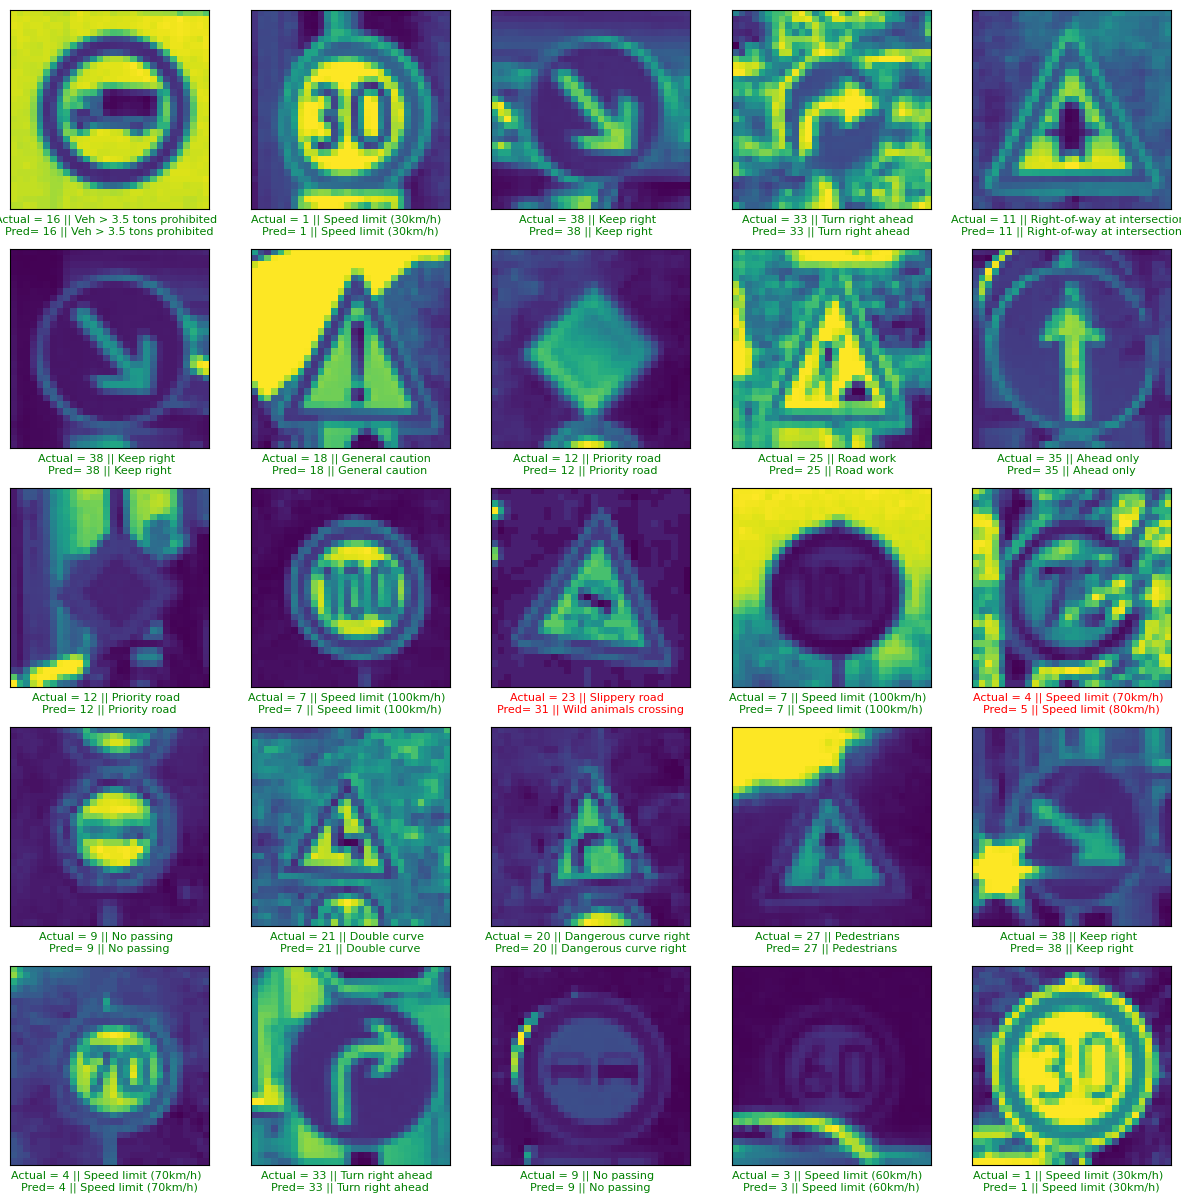

In [57]:
plt.figure(figsize = (15, 15))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = y_pred_classes[start_index + i]
    actual = labels[start_index + i]
    
    actual_label = classes_labels[actual]   # Getting actual class name
    predicted_label = classes_labels[prediction]  # Getting predicted class name
    
    # Set the color to green if the prediction is correct, red if wrong
    col = 'g' if prediction == actual else 'r'
    
    plt.xlabel('Actual = {} || {}  \nPred= {} || {}'.format(actual, actual_label, prediction, predicted_label), color = col, fontsize=8)
    plt.imshow(X_test[start_index + i])
plt.show()

# Display Some Error Results

395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step


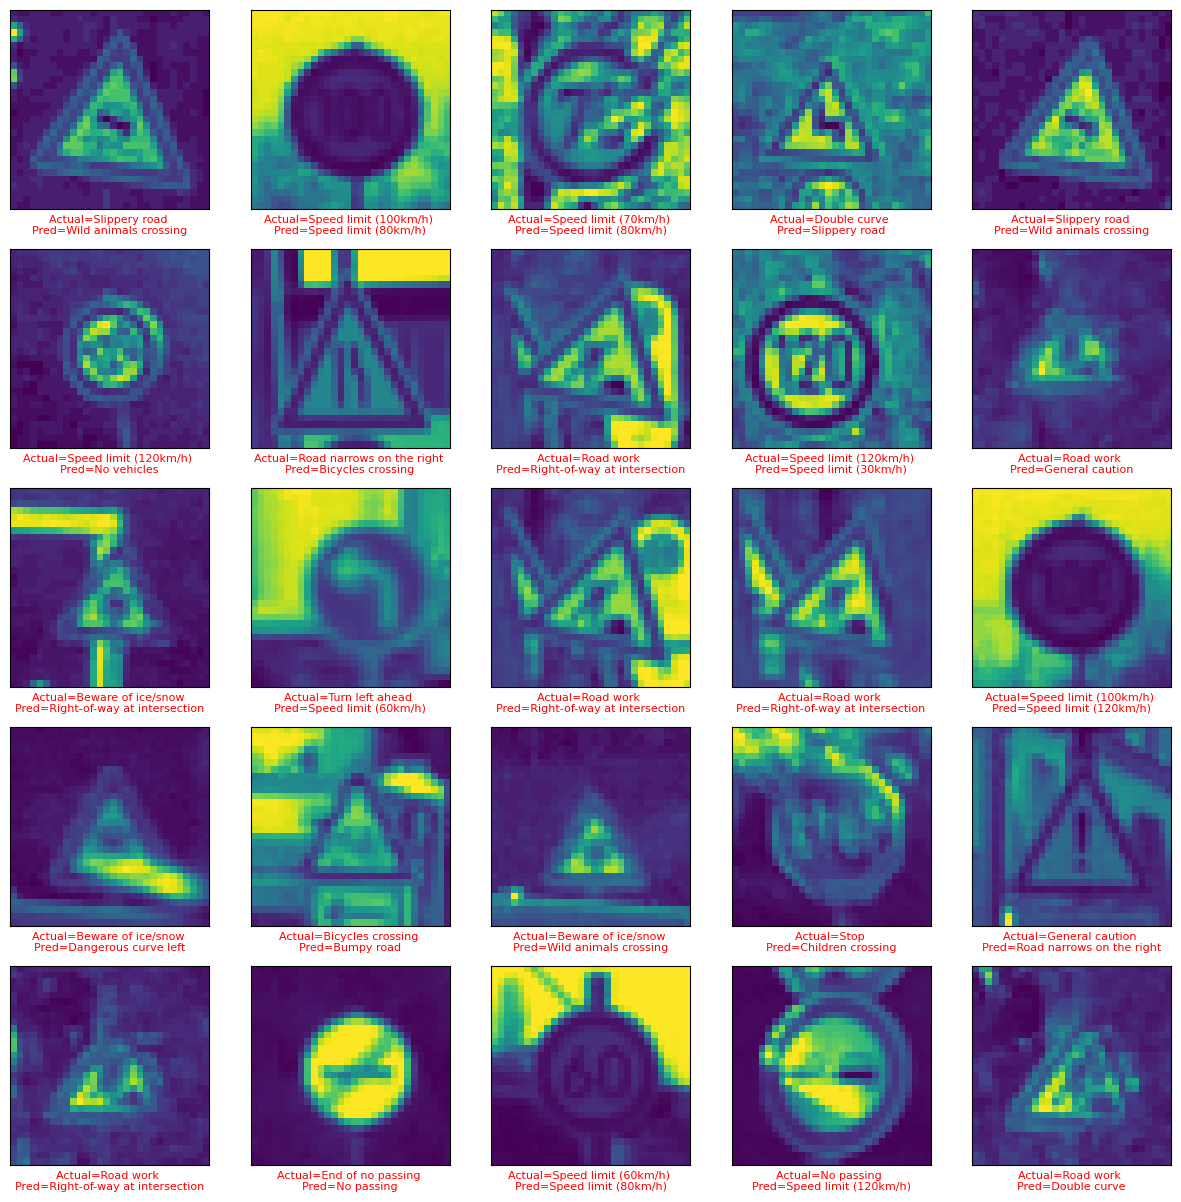

The most misclassified class is: Road work with 6 misclassifications.


In [58]:
import matplotlib.pyplot as plt
from collections import defaultdict
model = load_model('tuned_lstm_model.h5')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)  # Convert the predictions to class labels
labels = labels.astype(int)
# Set a counter to track the number of images shown
error_count = 0
max_errors_to_display = 25  # Set the number of incorrect images to display
# Dictionary to count misclassifications for each class
misclassifications = defaultdict(int)
plt.figure(figsize=(15, 15))
for i in range(len(y_pred_classes)):
   # Compare actual and predicted labels
   prediction = y_pred_classes[i]
   actual = labels[i]
   # If the prediction is incorrect, display the image and count the misclassification
   if prediction != actual:
       plt.subplot(5, 5, error_count + 1)
       plt.grid(False)
       plt.xticks([])
       plt.yticks([])
       # Get the actual and predicted class labels
       actual_label = classes_labels[actual]
       predicted_label = classes_labels[prediction]
       # Display the label with color red for incorrect prediction
       plt.xlabel(f'Actual={actual_label} \nPred={predicted_label}', color='r', fontsize=8)
       # Display the RGB image (remove cmap='gray')
       plt.imshow(X_test[i])  # For RGB images
       # Increment the counter for displayed errors
       error_count += 1
       # Increment the counter for misclassified classes
       misclassifications[actual_label] += 1
       # Stop after showing the maximum number of error images
       if error_count == max_errors_to_display:
           break
plt.show()
# Find and print the most misclassified class
most_misclassified_class = max(misclassifications, key=misclassifications.get)
print(f"The most misclassified class is: {most_misclassified_class} with {misclassifications[most_misclassified_class]} misclassifications.")